In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def count_oranges(img,counter):
    #Open a simple image
    m=cv2.imread(img)
    img_HSV = cv2.cvtColor(m, cv2.COLOR_BGR2HSV)
    #skin color range for hsv color space 
    HSV_mask = cv2.inRange(img_HSV, (0, 80, 20), (25, 255, 255)) 
    target = cv2.bitwise_and(m,m, mask=HSV_mask)
    counter+=1
    cv2.imwrite('segmentedoutregion'+str(counter)+'.jpg',target)
    plt.imshow(cv2.cvtColor(m, cv2.COLOR_BGR2RGB))
    plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
    contours,hierarchy  = cv2.findContours(cv2.cvtColor(target, cv2.COLOR_BGR2GRAY), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    counter+=1
    
        
    bounding_boxes = []
    threshold = 75
    ar=[]
    
    
    imgwithbox = m.copy()
    for c in contours:
        area = cv2.contourArea(c)
        if area >threshold:
            [x,y,w,h]=cv2.boundingRect(c)
            bounding_boxes.append([x,y,w,h])
            print([x,y,w,h])
            area_rect=w*h
            print(area_rect)
            ar.append(area_rect)
            cv2.rectangle(imgwithbox,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.imwrite('orangeswithboundingboxes'+str(counter)+'.jpg',imgwithbox)
    try:
        plt.imshow(imgwithbox)
        print("Yay")
    except:
        print("Nah")
    print(len(bounding_boxes))
    print(ar)
    total_area=sum(ar)
    print(total_area)
    avg_rect=0
    try:
        avg_rect= total_area/len(bounding_boxes)
    except:
        print("Nah")
    print(avg_rect)
    q=np.asarray(ar)
    print(q)
    no_of_oranges = q/avg_rect
    print(no_of_oranges)
    O_MIN = np.array([0, 80, 20], np.uint8)
    O_MAX = np.array([25, 255, 255], np.uint8)

    dst = cv2.inRange(imgwithbox, O_MIN, O_MAX)
    orange_pixel = cv2.countNonZero(dst)
    print('The number of orange pixels is: ' + str(orange_pixel))

    cv2.rectangle(m,(107,470),(107+64,470+30),(0,255,0),2)
    plt.imshow(m)

    cv2.rectangle(m,(558,385),(558+11,385+15),(0,255,0),2)
    plt.imshow(m)
    cv2.rectangle(m,(781,622),(781+14,622+15),(0,255,0),2)
    plt.imshow(m)
    return counter

Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 0
[250, 282, 17, 17]
289
[297, 276, 22, 17]
374
[60, 261, 26, 26]
676
[375, 260, 16, 29]
464
[95, 249, 14, 11]
154
[396, 244, 13, 17]
221
[57, 243, 13, 13]
169
[291, 222, 17, 11]
187
[52, 213, 12, 19]
228
[417, 209, 19, 13]
247
[166, 206, 23, 21]
483
[111, 200, 13, 11]
143
[337, 195, 22, 14]
308
[442, 190, 20, 22]
440
[44, 182, 21, 21]
441
[441, 166, 20, 13]
260
[22, 166, 16, 18]
288
[148, 165, 12, 11]
132
[107, 159, 11, 22]
242
[412, 155, 11, 15]
165
[348, 134, 16, 10]
160
[392, 123, 42, 34]
1428
[219, 122, 10, 14]
140
[103, 121, 46, 48]
2208
[188, 107, 21, 16]
336
[333, 105, 10, 13]
130
[226, 103, 12, 11]
132
[141, 86, 21, 11]
231
[38, 82, 47, 31]
1457
[101, 76, 38, 24]
912
[64, 70, 15, 13]
195
[266, 69, 36, 23]
828
[392, 62, 26, 14]
364
[324, 53, 12, 11]
132
[219, 32, 11, 11]
121
[87, 7, 26, 25]
650
[65, 0, 16, 12]
192
[19, 0, 29, 36]
1044
Yay
38
[289, 374, 676, 464, 154, 221, 169, 187, 228, 247, 483, 143, 308, 440, 441, 260, 28

289
[81, 125, 14, 21]
294
[443, 102, 15, 11]
165
[254, 92, 136, 142]
19312
[213, 62, 78, 48]
3744
[428, 48, 17, 16]
272
[348, 23, 20, 22]
440
[300, 0, 55, 11]
605
[244, 0, 48, 44]
2112
Yay
19
[8190, 252, 204, 667, 224, 783, 165, 198, 600, 2565, 289, 294, 165, 19312, 3744, 272, 440, 605, 2112]
41081
2162
[ 8190   252   204   667   224   783   165   198   600  2565   289   294
   165 19312  3744   272   440   605  2112]
[3 0 0 0 0 0 0 0 0 1 0 0 0 8 1 0 0 0 0]
The number of orange pixels is: 1918
[133, 303, 26, 12]
312
[404, 281, 13, 18]
234
[100, 267, 27, 26]
702
[319, 265, 18, 18]
324
[273, 260, 16, 13]
208
[428, 246, 34, 26]
884
[400, 233, 22, 19]
418
[154, 219, 43, 42]
1806
[242, 212, 40, 40]
1600
[204, 212, 24, 23]
552
[300, 203, 25, 22]
550
[367, 194, 50, 22]
1100
[273, 187, 25, 26]
650
[162, 172, 13, 16]
208
[344, 168, 28, 24]
672
[392, 154, 26, 22]
572
[94, 146, 42, 34]
1428
[240, 143, 26, 24]
624
[149, 143, 21, 18]
378
[256, 122, 23, 18]
414
[25, 116, 40, 27]
1080
[293, 100, 87, 

[171, 288, 17, 28]
476
[8, 271, 46, 30]
1380
[243, 267, 112, 49]
5488
[69, 264, 110, 52]
5720
[54, 228, 27, 38]
1026
[352, 102, 91, 87]
7917
[40, 70, 434, 246]
106764
[96, 4, 14, 33]
462
[73, 0, 20, 32]
640
Yay
9
[476, 1380, 5488, 5720, 1026, 7917, 106764, 462, 640]
129873
14430
[   476   1380   5488   5720   1026   7917 106764    462    640]
[0 0 0 0 0 0 7 0 0]
The number of orange pixels is: 43156
[27, 403, 16, 12]
192
[231, 370, 14, 15]
210
[384, 363, 25, 14]
350
[51, 288, 23, 33]
759
[294, 277, 13, 11]
143
[192, 274, 14, 15]
210
[419, 267, 13, 13]
169
[298, 212, 16, 20]
320
[422, 211, 16, 16]
256
[452, 192, 12, 11]
132
[416, 169, 16, 17]
272
[161, 160, 31, 20]
620
[240, 149, 16, 15]
240
[425, 139, 13, 11]
143
[380, 126, 15, 12]
180
[356, 126, 17, 18]
306
[224, 102, 16, 17]
272
[170, 88, 22, 15]
330
[326, 34, 25, 19]
475
[231, 34, 15, 14]
210
Yay
20
[192, 210, 350, 759, 143, 210, 169, 320, 256, 132, 272, 620, 240, 143, 180, 306, 272, 330, 475, 210]
5789
289
[192 210 350 759 143 210 

[82, 450, 13, 14]
182
[16, 449, 22, 25]
550
[70, 415, 22, 24]
528
[81, 364, 38, 44]
1672
[0, 345, 12, 32]
384
[384, 296, 59, 34]
2006
[165, 291, 214, 158]
33812
[429, 267, 21, 19]
399
[320, 256, 97, 75]
7275
[91, 236, 86, 88]
7568
[81, 235, 15, 20]
300
[10, 203, 67, 118]
7906
[314, 176, 22, 29]
638
[386, 150, 78, 75]
5850
[49, 68, 130, 141]
18330
[163, 61, 18, 17]
306
[241, 59, 54, 52]
2808
Yay
17
[182, 550, 528, 1672, 384, 2006, 33812, 399, 7275, 7568, 300, 7906, 638, 5850, 18330, 306, 2808]
90514
5324
[  182   550   528  1672   384  2006 33812   399  7275  7568   300  7906
   638  5850 18330   306  2808]
[0 0 0 0 0 0 6 0 1 1 0 1 0 1 3 0 0]
The number of orange pixels is: 8259
[337, 449, 31, 25]
775
[16, 441, 58, 33]
1914
[96, 432, 34, 34]
1156
[261, 327, 43, 31]
1333
[14, 245, 116, 158]
18328
[131, 214, 109, 113]
12317
[0, 197, 21, 23]
483
[285, 98, 111, 166]
18426
[124, 45, 53, 90]
4770
[181, 40, 35, 61]
2135
[180, 32, 20, 38]
760
Yay
11
[775, 1914, 1156, 1333, 18328, 12317, 483, 18

Yay
33
[289, 357, 650, 464, 154, 204, 169, 176, 216, 216, 420, 143, 308, 440, 400, 288, 132, 231, 160, 1312, 2115, 132, 220, 1457, 864, 165, 782, 312, 132, 121, 650, 180, 1008]
14867
450
[ 289  357  650  464  154  204  169  176  216  216  420  143  308  440  400
  288  132  231  160 1312 2115  132  220 1457  864  165  782  312  132  121
  650  180 1008]
[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 4 0 0 3 1 0 1 0 0 0 1 0 2]
The number of orange pixels is: 107
[57, 460, 12, 11]
132
[54, 447, 14, 10]
140
[87, 445, 21, 13]
273
[449, 410, 15, 14]
210
[26, 401, 18, 16]
288
[231, 370, 14, 16]
224
[313, 364, 11, 15]
165
[384, 360, 25, 17]
425
[461, 341, 13, 17]
221
[7, 339, 12, 13]
156
[370, 318, 14, 13]
182
[88, 313, 13, 11]
143
[51, 286, 23, 35]
805
[355, 277, 11, 16]
176
[294, 276, 13, 12]
156
[192, 274, 14, 15]
210
[418, 266, 14, 14]
196
[78, 263, 10, 12]
120
[140, 227, 12, 11]
132
[297, 212, 18, 20]
360
[421, 211, 17, 16]
272
[451, 191, 13, 12]
156
[416, 168, 16, 18]
288
[161, 158, 31, 22]
6

[86, 376, 213, 234]
49842
[127, 556, 135, 18]
2430
[160, 421, 26, 8]
208
[234, 417, 23, 11]
253
[396, 316, 11, 19]
209
[127, 307, 23, 14]
322
[214, 301, 32, 26]
832
[451, 288, 23, 22]
506
[180, 286, 36, 36]
1296
[0, 265, 23, 45]
1035
[336, 259, 16, 20]
320
[392, 256, 16, 8]
128
[256, 248, 36, 43]
1548
[153, 233, 26, 23]
598
[409, 218, 65, 44]
2860
[430, 223, 15, 21]
315
[202, 82, 19, 20]
380
Yay
17
[49842, 2430, 208, 253, 209, 322, 832, 506, 1296, 1035, 320, 128, 1548, 598, 2860, 315, 380]
63082
3710
[49842  2430   208   253   209   322   832   506  1296  1035   320   128
  1548   598  2860   315   380]
[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
The number of orange pixels is: 1132
[59, 414, 257, 314]
80698
[79, 472, 56, 23]
1288
[383, 349, 46, 63]
2898
[199, 347, 26, 46]
1196
[261, 262, 24, 18]
432
[257, 237, 171, 167]
28557
[400, 219, 16, 13]
208
[208, 191, 58, 53]
3074
[146, 151, 36, 20]
720
[148, 133, 29, 14]
406
[102, 65, 66, 67]
4422
Yay
11
[80698, 1288, 2898, 1196, 432

Yay
21
[306, 140, 399, 4536, 144, 2400, 210, 567, 1232, 132, 480, 195, 5100, 156, 2378, 240, 5183, 384, 2240, 198, 425]
27045
1287
[ 306  140  399 4536  144 2400  210  567 1232  132  480  195 5100  156 2378
  240 5183  384 2240  198  425]
[0 0 0 3 0 1 0 0 0 0 0 0 3 0 1 0 4 0 1 0 0]
The number of orange pixels is: 1382
[81, 204, 37, 52]
1924
[134, 194, 99, 110]
10890
[303, 166, 97, 101]
9797
[0, 146, 73, 99]
7227
[54, 112, 60, 80]
4800
[402, 74, 58, 62]
3596
[83, 50, 120, 114]
13680
[22, 28, 40, 35]
1400
[0, 4, 14, 22]
308
[29, 0, 124, 59]
7316
Yay
10
[1924, 10890, 9797, 7227, 4800, 3596, 13680, 1400, 308, 7316]
60938
6093
[ 1924 10890  9797  7227  4800  3596 13680  1400   308  7316]
[0 1 1 1 0 0 2 0 0 1]
The number of orange pixels is: 19156
[407, 298, 11, 17]
187
[217, 254, 18, 19]
342
[235, 242, 19, 19]
361
[271, 237, 29, 20]
580
[161, 218, 21, 17]
357
[195, 203, 11, 17]
187
[379, 199, 22, 39]
858
[334, 193, 14, 11]
154
[265, 170, 45, 43]
1935
[318, 156, 12, 15]
180
[160, 155, 13, 13

[175, 565, 24, 34]
816
[452, 547, 19, 24]
456
[412, 547, 60, 162]
9720
[146, 536, 29, 22]
638
[382, 523, 17, 19]
323
[443, 507, 28, 35]
980
[407, 485, 38, 23]
874
[343, 455, 10, 23]
230
[122, 439, 208, 271]
56368
[239, 618, 89, 35]
3115
[286, 438, 44, 26]
1144
[255, 438, 29, 25]
725
[310, 425, 29, 36]
1044
[256, 419, 54, 15]
810
[397, 379, 37, 82]
3034
[383, 376, 7, 21]
147
[190, 355, 82, 56]
4592
[104, 335, 8, 18]
144
[75, 335, 14, 37]
518
[165, 331, 32, 40]
1280
[329, 326, 45, 37]
1665
[104, 285, 27, 78]
2106
[339, 242, 32, 39]
1248
[147, 233, 50, 47]
2350
[258, 215, 37, 36]
1332
[209, 203, 42, 38]
1596
[217, 181, 20, 16]
320
Yay
27
[816, 456, 9720, 638, 323, 980, 874, 230, 56368, 3115, 1144, 725, 1044, 810, 3034, 147, 4592, 144, 518, 1280, 1665, 2106, 1248, 2350, 1332, 1596, 320]
97575
3613
[  816   456  9720   638   323   980   874   230 56368  3115  1144   725
  1044   810  3034   147  4592   144   518  1280  1665  2106  1248  2350
  1332  1596   320]
[ 0  0  2  0  0  0  0  0 15  

Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 0
[0, 436, 18, 36]
648
[452, 432, 22, 22]
484
[0, 406, 23, 29]
667
[0, 351, 28, 53]
1484
[463, 242, 11, 16]
176
[0, 109, 474, 466]
220884
[239, 482, 22, 19]
418
[288, 479, 15, 12]
180
[275, 479, 14, 14]
196
[212, 479, 31, 26]
806
[234, 367, 17, 16]
272
[305, 94, 15, 18]
270
Yay
12
[648, 484, 667, 1484, 176, 220884, 418, 180, 196, 806, 272, 270]
226485
18873
[   648    484    667   1484    176 220884    418    180    196    806
    272    270]
[ 0  0  0  0  0 11  0  0  0  0  0  0]
The number of orange pixels is: 11767
Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 0
[592, 698, 15, 11]
165
[762, 684, 16, 15]
240
[322, 667, 17, 17]
289
[632, 653, 15, 18]
270
[583, 651, 14, 16]
224
[359, 640, 23, 20]
460
[3, 618, 21, 16]
336
[757, 616, 19, 17]
323
[34, 608, 14, 13]
182
[166, 602, 18, 16]
288
[386, 599, 38, 22]
836
[569, 596, 21, 17]
357
[362, 595, 19, 24]
456
[246, 570, 26, 22]
572
[421, 569, 16, 12]
192
[794, 557, 21, 24]
504


[214, 307, 19, 8]
152
[171, 298, 29, 17]
493
[162, 267, 18, 14]
252
[417, 265, 42, 27]
1134
[202, 261, 27, 18]
486
[165, 241, 23, 21]
483
[9, 235, 63, 70]
4410
[238, 230, 71, 74]
5254
[31, 226, 125, 89]
11125
[85, 295, 16, 14]
224
[234, 223, 8, 18]
144
[96, 212, 42, 35]
1470
[204, 210, 24, 33]
792
[0, 203, 19, 20]
380
[444, 192, 23, 26]
598
[103, 157, 37, 48]
1776
[421, 148, 49, 39]
1911
[48, 144, 40, 27]
1080
[213, 143, 17, 11]
187
[234, 137, 25, 25]
625
[0, 133, 26, 36]
936
[0, 114, 16, 18]
288
[407, 93, 22, 20]
440
[259, 81, 156, 234]
36504
[291, 165, 24, 28]
672
[80, 74, 12, 16]
192
[194, 71, 33, 21]
693
[96, 68, 144, 154]
22176
[339, 64, 15, 23]
345
[289, 56, 42, 37]
1554
[368, 54, 16, 13]
208
[395, 52, 28, 29]
812
[0, 51, 44, 64]
2816
[126, 48, 13, 19]
247
[96, 47, 29, 17]
493
[363, 21, 14, 23]
322
[121, 6, 27, 22]
594
[409, 0, 42, 42]
1764
Yay
38
[152, 493, 252, 1134, 486, 483, 4410, 5254, 11125, 224, 144, 1470, 792, 380, 598, 1776, 1911, 1080, 187, 625, 936, 288, 440, 36504, 67

The number of orange pixels is: 8759
[81, 204, 37, 52]
1924
[134, 194, 99, 110]
10890
[303, 166, 97, 101]
9797
[0, 147, 73, 98]
7154
[54, 112, 60, 79]
4740
[402, 74, 58, 62]
3596
[92, 50, 111, 114]
12654
[26, 28, 36, 34]
1224
[110, 13, 31, 15]
465
[0, 4, 14, 21]
294
[29, 0, 77, 58]
4466
Yay
11
[1924, 10890, 9797, 7154, 4740, 3596, 12654, 1224, 465, 294, 4466]
57204
5200
[ 1924 10890  9797  7154  4740  3596 12654  1224   465   294  4466]
[0 2 1 1 0 0 2 0 0 0 0]
The number of orange pixels is: 18543
[58, 415, 259, 313]
81067
[222, 489, 20, 9]
180
[271, 481, 33, 9]
297
[236, 480, 20, 15]
300
[72, 472, 63, 23]
1449
[383, 349, 48, 62]
2976
[199, 347, 26, 46]
1196
[258, 262, 26, 18]
468
[258, 237, 170, 167]
28390
[399, 220, 18, 12]
216
[209, 191, 57, 53]
3021
[152, 153, 30, 17]
510
[147, 131, 30, 16]
480
[101, 66, 67, 66]
4422
Yay
14
[81067, 180, 297, 300, 1449, 2976, 1196, 468, 28390, 216, 3021, 510, 480, 4422]
124972
8926
[81067   180   297   300  1449  2976  1196   468 28390   216  3021  

Yay
17
[49842, 2430, 208, 253, 209, 322, 832, 506, 1296, 1035, 320, 128, 1548, 598, 2860, 315, 380]
63082
3710
[49842  2430   208   253   209   322   832   506  1296  1035   320   128
  1548   598  2860   315   380]
[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
The number of orange pixels is: 1132
[180, 328, 27, 27]
729
[98, 311, 10, 18]
180
[99, 289, 57, 66]
3762
[396, 284, 58, 33]
1914
[156, 276, 24, 25]
600
[135, 255, 34, 28]
952
[97, 255, 19, 20]
380
[355, 246, 34, 62]
2108
[77, 246, 13, 18]
234
[402, 243, 32, 31]
992
[304, 234, 43, 109]
4687
[97, 233, 36, 28]
1008
[186, 227, 25, 20]
500
[48, 226, 20, 34]
680
[383, 216, 17, 12]
204
[96, 213, 10, 21]
210
[79, 202, 15, 17]
255
[294, 178, 16, 19]
304
[402, 177, 13, 15]
195
[320, 176, 32, 28]
896
[232, 162, 66, 100]
6600
[358, 141, 23, 41]
943
[165, 122, 13, 18]
234
[301, 121, 27, 25]
675
[412, 110, 38, 32]
1216
[177, 103, 52, 35]
1820
[321, 92, 37, 37]
1369
[104, 86, 12, 15]
180
[460, 79, 14, 18]
252
[156, 76, 14, 15]
210
[218,

[296, 330, 12, 13]
156
[261, 247, 18, 17]
306
[288, 209, 14, 13]
182
[118, 200, 11, 13]
143
[274, 172, 12, 14]
168
[244, 140, 16, 13]
208
[185, 133, 12, 11]
132
Yay
7
[156, 306, 182, 143, 168, 208, 132]
1295
185
[156 306 182 143 168 208 132]
[0 1 0 0 0 1 0]
The number of orange pixels is: 0
[312, 406, 30, 15]
450
[68, 346, 28, 15]
420
[174, 285, 43, 18]
774
[372, 245, 17, 16]
272
[225, 198, 15, 10]
150
[111, 176, 24, 25]
600
Yay
6
[450, 420, 774, 272, 150, 600]
2666
444
[450 420 774 272 150 600]
[1 0 1 0 0 1]
The number of orange pixels is: 145
[820, 716, 15, 16]
240
[501, 644, 13, 13]
169
[338, 631, 18, 16]
288
[275, 538, 17, 14]
238
[720, 512, 12, 11]
132
[340, 511, 14, 15]
210
[368, 345, 14, 11]
154
[498, 286, 11, 14]
154
[384, 256, 16, 10]
160
[522, 232, 16, 11]
176
[465, 204, 15, 12]
180
Yay
11
[240, 169, 288, 238, 132, 210, 154, 154, 160, 176, 180]
2101
191
[240 169 288 238 132 210 154 154 160 176 180]
[1 0 1 1 0 1 0 0 0 0 0]
The number of orange pixels is: 0
[177, 610, 60, 22]
1

[819, 713, 21, 20]
420
[744, 702, 18, 14]
252
[500, 641, 17, 18]
306
[336, 630, 21, 18]
378
[308, 626, 15, 12]
180
[429, 617, 14, 10]
140
[325, 595, 17, 14]
238
[724, 556, 17, 17]
289
[168, 542, 16, 13]
208
[274, 536, 18, 17]
306
[200, 530, 16, 10]
160
[339, 508, 20, 19]
380
[717, 507, 16, 17]
272
[732, 396, 17, 10]
170
[656, 367, 13, 10]
130
[364, 345, 18, 12]
216
[638, 286, 16, 14]
224
[498, 283, 13, 18]
234
[384, 254, 20, 14]
280
[520, 231, 19, 14]
266
[367, 219, 17, 15]
255
[463, 204, 20, 13]
260
Yay
22
[420, 252, 306, 378, 180, 140, 238, 289, 208, 306, 160, 380, 272, 170, 130, 216, 224, 234, 280, 266, 255, 260]
5564
252
[420 252 306 378 180 140 238 289 208 306 160 380 272 170 130 216 224 234
 280 266 255 260]
[1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1]
The number of orange pixels is: 0
[11, 348, 18, 7]
126
[211, 344, 32, 11]
352
[69, 343, 22, 12]
264
[29, 338, 16, 14]
224
[144, 329, 27, 26]
702
[426, 327, 48, 28]
1344
[263, 324, 16, 13]
208
[68, 316, 18, 20]
360
[205, 315, 12, 1

[325, 335, 14, 10]
140
[392, 265, 17, 14]
238
[79, 217, 66, 58]
3828
[215, 207, 52, 36]
1872
[456, 184, 16, 21]
336
[421, 169, 38, 24]
912
[375, 151, 14, 18]
252
[62, 143, 79, 56]
4424
[405, 80, 38, 51]
1938
[122, 79, 67, 66]
4422
[295, 47, 58, 29]
1682
Yay
11
[140, 238, 3828, 1872, 336, 912, 252, 4424, 1938, 4422, 1682]
20044
1822
[ 140  238 3828 1872  336  912  252 4424 1938 4422 1682]
[0 0 2 1 0 0 0 2 1 2 0]
The number of orange pixels is: 2594
[300, 298, 20, 17]
340
[311, 274, 35, 21]
735
[136, 273, 27, 26]
702
[252, 258, 34, 35]
1190
[124, 218, 28, 27]
756
[336, 208, 61, 57]
3477
[333, 207, 32, 12]
384
[263, 207, 38, 41]
1558
[176, 196, 88, 86]
7568
[295, 180, 40, 34]
1360
[116, 179, 45, 37]
1665
[364, 178, 20, 23]
460
[266, 163, 28, 34]
952
[68, 160, 19, 19]
361
[300, 127, 26, 28]
728
[248, 70, 36, 33]
1188
[211, 59, 14, 12]
168
[32, 50, 69, 88]
6072
[104, 24, 164, 183]
30012
[222, 143, 21, 8]
168
[180, 129, 18, 13]
234
[284, 0, 52, 23]
1196
[115, 0, 139, 43]
5977
[46, 0, 50, 25]

[122, 213, 12, 16]
192
[61, 208, 14, 17]
238
[310, 206, 16, 21]
336
[26, 204, 34, 27]
918
[81, 199, 40, 45]
1800
[160, 196, 60, 42]
2520
[234, 192, 60, 31]
1860
[418, 190, 32, 16]
512
[299, 183, 19, 21]
399
[245, 176, 38, 25]
950
[112, 168, 24, 21]
504
[80, 166, 32, 33]
1056
[198, 161, 25, 20]
500
[0, 146, 11, 16]
176
[351, 138, 18, 25]
450
[146, 138, 38, 36]
1368
[288, 134, 12, 19]
228
[78, 130, 12, 16]
192
[337, 124, 16, 16]
256
[123, 118, 45, 27]
1215
[317, 117, 18, 20]
360
[15, 112, 45, 57]
2565
[425, 107, 25, 31]
775
[180, 106, 80, 49]
3920
[104, 94, 17, 19]
323
[348, 83, 20, 16]
320
[65, 82, 16, 14]
224
[285, 79, 15, 15]
225
[219, 79, 11, 19]
209
[381, 76, 19, 38]
722
[114, 76, 30, 18]
540
[57, 71, 12, 15]
180
[249, 63, 22, 18]
396
[134, 62, 50, 51]
2550
[399, 60, 51, 31]
1581
[212, 47, 19, 33]
627
[188, 47, 26, 31]
806
[392, 44, 18, 22]
396
[165, 43, 18, 20]
360
[118, 40, 16, 14]
224
[34, 33, 22, 26]
572
[231, 28, 24, 18]
432
[414, 21, 20, 29]
580
[285, 3, 17, 18]
306
[182, 3, 1

The number of orange pixels is: 2794
[161, 277, 121, 94]
11374
[183, 267, 25, 26]
650
[230, 257, 17, 17]
289
[112, 221, 70, 64]
4480
[17, 212, 91, 74]
6734
[244, 211, 24, 43]
1032
[285, 188, 111, 104]
11544
[335, 229, 26, 21]
546
[351, 195, 24, 38]
912
[221, 176, 9, 29]
261
[322, 159, 25, 15]
375
[320, 141, 17, 21]
357
[131, 138, 86, 80]
6880
[373, 135, 89, 76]
6764
[229, 128, 89, 120]
10680
[285, 125, 25, 15]
375
Yay
16
[11374, 650, 289, 4480, 6734, 1032, 11544, 546, 912, 261, 375, 357, 6880, 6764, 10680, 375]
63253
3953
[11374   650   289  4480  6734  1032 11544   546   912   261   375   357
  6880  6764 10680   375]
[2 0 0 1 1 0 2 0 0 0 0 0 1 1 2 0]
The number of orange pixels is: 12993
[63, 324, 20, 29]
580
[114, 292, 39, 48]
1872
[130, 240, 15, 40]
600
[158, 220, 57, 51]
2907
[99, 214, 27, 68]
1836
[0, 208, 13, 11]
143
[112, 185, 29, 45]
1305
[0, 183, 8, 21]
168
[336, 166, 71, 53]
3763
[130, 163, 31, 39]
1209
[236, 139, 202, 214]
43228
[307, 6, 46, 35]
1610
[364, 0, 20, 36]
720
[3

[350, 0, 34, 29]
986
Yay
27
[532, 1254, 1820, 684, 322, 550, 722, 494, 20992, 3078, 4234, 4087, 2914, 868, 1184, 207, 192, 1368, 705, 2627, 612, 180, 2268, 480, 1968, 690, 986]
56018
2074
[  532  1254  1820   684   322   550   722   494 20992  3078  4234  4087
  2914   868  1184   207   192  1368   705  2627   612   180  2268   480
  1968   690   986]
[ 0  0  0  0  0  0  0  0 10  1  2  1  1  0  0  0  0  0  0  1  0  0  1  0  0
  0  0]
The number of orange pixels is: 5274
[50, 466, 17, 8]
136
[15, 464, 16, 10]
160
[145, 344, 295, 130]
38350
[290, 397, 12, 15]
180
[441, 304, 20, 16]
320
[370, 271, 43, 37]
1591
[274, 239, 51, 48]
2448
[0, 229, 248, 207]
51336
[121, 335, 24, 13]
312
[416, 220, 53, 42]
2226
[92, 210, 25, 28]
700
[293, 201, 99, 68]
6732
[258, 199, 20, 23]
460
[305, 188, 15, 16]
240
[464, 155, 10, 21]
210
[168, 153, 25, 15]
375
[118, 151, 19, 32]
608
[5, 113, 26, 23]
598
[66, 96, 13, 14]
182
[146, 94, 21, 22]
462
[116, 72, 26, 13]
338
[293, 51, 18, 17]
306
[444, 0, 30, 16]
480

[238, 400, 23, 30]
690
[0, 394, 25, 44]
1100
[58, 364, 21, 20]
420
[213, 361, 35, 38]
1330
[92, 357, 20, 17]
340
[280, 352, 24, 22]
528
[186, 352, 18, 17]
306
[368, 332, 16, 18]
288
[351, 326, 20, 38]
760
[263, 320, 17, 24]
408
[440, 313, 11, 15]
165
[458, 308, 16, 20]
320
[156, 308, 17, 18]
306
[201, 290, 18, 12]
216
[384, 278, 16, 16]
256
[442, 277, 32, 31]
992
[56, 274, 15, 13]
195
[159, 266, 14, 15]
210
[328, 264, 39, 50]
1950
[288, 256, 18, 16]
288
[107, 256, 18, 21]
378
[427, 225, 17, 19]
323
[0, 220, 30, 22]
660
[135, 217, 47, 45]
2115
[197, 214, 22, 19]
418
[65, 214, 61, 41]
2501
[224, 209, 32, 19]
608
[376, 204, 12, 15]
180
[391, 200, 12, 16]
192
[264, 188, 50, 50]
2500
[62, 180, 18, 26]
468
[132, 177, 14, 13]
182
[245, 160, 19, 17]
323
[200, 159, 48, 33]
1584
[160, 154, 37, 34]
1258
[285, 149, 19, 16]
304
[27, 140, 25, 27]
675
[274, 129, 14, 12]
168
[221, 117, 35, 39]
1365
[312, 111, 15, 20]
300
[442, 101, 32, 23]
736
[278, 89, 15, 13]
195
[392, 75, 22, 21]
462
[406, 64, 25, 

[81, 204, 38, 52]
1976
[134, 194, 99, 110]
10890
[303, 166, 97, 101]
9797
[0, 146, 73, 99]
7227
[53, 112, 62, 80]
4960
[401, 73, 59, 63]
3717
[81, 50, 122, 115]
14030
[128, 55, 49, 36]
1764
[424, 48, 17, 21]
357
[20, 27, 42, 36]
1512
[0, 4, 14, 22]
308
[29, 0, 129, 59]
7611
Yay
12
[1976, 10890, 9797, 7227, 4960, 3717, 14030, 1764, 357, 1512, 308, 7611]
64149
5345
[ 1976 10890  9797  7227  4960  3717 14030  1764   357  1512   308  7611]
[0 2 1 1 0 0 2 0 0 0 0 1]
The number of orange pixels is: 19875
[300, 298, 20, 17]
340
[311, 274, 35, 21]
735
[136, 273, 27, 26]
702
[252, 258, 34, 35]
1190
[124, 218, 28, 27]
756
[336, 208, 61, 57]
3477
[333, 207, 32, 12]
384
[263, 207, 38, 41]
1558
[176, 196, 88, 86]
7568
[295, 180, 40, 34]
1360
[116, 179, 45, 37]
1665
[364, 178, 20, 23]
460
[266, 163, 28, 34]
952
[68, 160, 19, 19]
361
[300, 127, 26, 28]
728
[248, 70, 36, 33]
1188
[211, 59, 14, 12]
168
[32, 50, 69, 88]
6072
[104, 24, 164, 183]
30012
[222, 143, 21, 8]
168
[180, 129, 18, 13]
234
[284, 0,

[333, 165, 20, 12]
240
[422, 130, 19, 10]
190
Yay
2
[240, 190]
430
215
[240 190]
[1 0]
The number of orange pixels is: 0
[384, 290, 90, 106]
9540
[441, 305, 14, 14]
196
[0, 288, 50, 63]
3150
Yay
3
[9540, 196, 3150]
12886
4295
[9540  196 3150]
[2 0 0]
The number of orange pixels is: 3072
[373, 221, 91, 89]
8099
[404, 275, 17, 14]
238
[416, 168, 12, 17]
204
[0, 163, 22, 29]
638
[170, 160, 13, 16]
208
[76, 160, 27, 29]
783
[0, 157, 15, 10]
150
[448, 148, 25, 24]
600
[369, 144, 45, 57]
2565
[28, 143, 17, 16]
272
[82, 128, 12, 18]
216
[444, 102, 14, 11]
154
[255, 92, 134, 142]
19028
[214, 64, 77, 45]
3465
[428, 49, 17, 15]
255
[348, 23, 20, 22]
440
[300, 0, 53, 11]
583
[244, 0, 48, 44]
2112
Yay
18
[8099, 238, 204, 638, 208, 783, 150, 600, 2565, 272, 216, 154, 19028, 3465, 255, 440, 583, 2112]
40010
2222
[ 8099   238   204   638   208   783   150   600  2565   272   216   154
 19028  3465   255   440   583  2112]
[3 0 0 0 0 0 0 0 1 0 0 0 8 1 0 0 0 0]
The number of orange pixels is: 1757
[322

[348, 331, 12, 15]
180
[443, 308, 31, 34]
1054
[379, 277, 28, 25]
700
[105, 277, 18, 17]
306
[312, 276, 30, 23]
690
[46, 271, 30, 22]
660
[320, 244, 29, 23]
667
[75, 242, 16, 16]
256
[389, 241, 30, 23]
690
[221, 214, 21, 23]
483
[48, 212, 19, 21]
399
[91, 208, 20, 19]
380
[178, 187, 21, 22]
462
[416, 155, 24, 24]
576
[194, 139, 15, 14]
210
[340, 103, 39, 25]
975
[144, 98, 16, 14]
224
Yay
17
[180, 1054, 700, 306, 690, 660, 667, 256, 690, 483, 399, 380, 462, 576, 210, 975, 224]
8912
524
[ 180 1054  700  306  690  660  667  256  690  483  399  380  462  576  210
  975  224]
[0 2 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0]
The number of orange pixels is: 982
[194, 579, 11, 23]
253
[69, 576, 18, 25]
450
[36, 568, 17, 32]
544
[213, 383, 32, 63]
2016
[278, 312, 10, 12]
120
[188, 288, 47, 31]
1457
[275, 266, 13, 13]
169
[115, 264, 24, 18]
432
[295, 255, 12, 13]
156
[238, 255, 31, 19]
589
[201, 250, 12, 13]
156
[299, 245, 16, 10]
160
[186, 243, 13, 12]
156
[185, 224, 12, 16]
192
[130, 221, 24, 17]
408
[223,

[774, 408, 16, 16]
256
[828, 406, 21, 22]
462
[545, 384, 19, 13]
247
[987, 372, 13, 16]
208
[732, 370, 18, 14]
252
[900, 351, 20, 13]
260
[807, 298, 14, 11]
154
[808, 281, 16, 11]
176
[931, 237, 20, 17]
340
[383, 209, 22, 15]
330
[931, 190, 17, 14]
238
Yay
23
[272, 168, 238, 520, 225, 168, 570, 136, 168, 902, 224, 252, 256, 462, 247, 208, 252, 260, 154, 176, 340, 330, 238]
6766
294
[272 168 238 520 225 168 570 136 168 902 224 252 256 462 247 208 252 260
 154 176 340 330 238]
[0 0 0 1 0 0 1 0 0 3 0 0 0 1 0 0 0 0 0 0 1 1 0]
The number of orange pixels is: 2689
[791, 764, 21, 15]
315
[803, 723, 19, 20]
380
[486, 655, 17, 18]
306
[319, 648, 21, 18]
378
[290, 640, 17, 16]
272
[412, 633, 16, 10]
160
[307, 611, 17, 17]
289
[513, 604, 12, 17]
204
[708, 567, 19, 20]
380
[771, 566, 17, 13]
221
[149, 561, 20, 14]
280
[694, 555, 11, 19]
209
[257, 555, 19, 15]
285
[182, 548, 17, 10]
170
[428, 544, 25, 25]
625
[323, 524, 22, 19]
418
[701, 518, 17, 17]
289
[208, 504, 17, 12]
204
[714, 408, 16, 10]
16

1131
[0, 365, 117, 67]
7839
[288, 363, 44, 43]
1892
[51, 358, 29, 18]
522
[121, 340, 13, 16]
208
[136, 327, 49, 46]
2254
[40, 316, 69, 45]
3105
[6, 303, 18, 14]
252
[203, 302, 51, 63]
3213
[308, 293, 98, 64]
6272
[452, 266, 22, 21]
462
[419, 261, 34, 38]
1292
[47, 242, 22, 23]
506
[148, 224, 14, 27]
378
[0, 212, 49, 34]
1666
[166, 210, 80, 84]
6720
[284, 207, 41, 22]
902
[46, 193, 40, 32]
1280
[396, 189, 76, 55]
4180
[120, 169, 29, 22]
638
[349, 167, 15, 15]
225
[432, 160, 16, 31]
496
[6, 157, 45, 40]
1800
[377, 143, 20, 30]
600
[290, 139, 58, 49]
2842
[311, 164, 13, 18]
234
[220, 139, 20, 31]
620
[411, 116, 16, 29]
464
[107, 114, 99, 58]
5742
[187, 97, 69, 42]
2898
[28, 91, 44, 25]
1100
[0, 91, 25, 38]
950
[417, 88, 15, 15]
225
[305, 83, 44, 42]
1848
[56, 64, 38, 30]
1140
[265, 58, 15, 15]
225
[169, 57, 27, 19]
513
[322, 55, 19, 16]
304
[114, 51, 50, 31]
1550
[274, 25, 35, 29]
1015
[370, 24, 44, 38]
1672
[106, 22, 29, 30]
870
[32, 9, 46, 57]
2622
[397, 7, 20, 13]
260
[382, 3, 11, 17]


[268, 288, 76, 28]
2128
[288, 267, 13, 14]
182
[320, 263, 24, 18]
432
[422, 246, 18, 14]
252
[44, 196, 19, 35]
665
[328, 135, 34, 50]
1700
[284, 124, 42, 23]
966
[266, 99, 37, 13]
481
[359, 91, 115, 147]
16905
[315, 79, 35, 20]
700
[394, 68, 18, 17]
306
[345, 42, 18, 26]
468
[80, 38, 267, 247]
65949
[111, 243, 27, 26]
702
[276, 29, 18, 24]
432
Yay
15
[2128, 182, 432, 252, 665, 1700, 966, 481, 16905, 700, 306, 468, 65949, 702, 432]
92268
6151
[ 2128   182   432   252   665  1700   966   481 16905   700   306   468
 65949   702   432]
[ 0  0  0  0  0  0  0  0  2  0  0  0 10  0  0]
The number of orange pixels is: 25732
[183, 266, 73, 34]
2482
[356, 237, 60, 51]
3060
[371, 247, 19, 16]
304
[79, 118, 265, 142]
37630
[194, 153, 19, 20]
380
[218, 127, 30, 21]
630
[18, 96, 36, 25]
900
[123, 92, 30, 48]
1440
[433, 80, 9, 16]
144
[170, 68, 37, 33]
1221
[315, 56, 28, 12]
336
[148, 23, 36, 31]
1116
[66, 16, 50, 40]
2000
[0, 0, 22, 37]
814
Yay
14
[2482, 3060, 304, 37630, 380, 630, 900, 1440, 144, 1

[438, 322, 36, 33]
1188
[314, 303, 124, 52]
6448
[210, 276, 40, 28]
1120
[335, 250, 24, 29]
696
[414, 219, 12, 17]
204
[245, 173, 41, 47]
1927
[280, 136, 140, 107]
14980
[112, 120, 31, 16]
496
[31, 75, 241, 280]
67480
[105, 321, 14, 20]
280
[127, 315, 17, 20]
340
[168, 191, 25, 21]
525
[196, 32, 22, 24]
528
[0, 0, 38, 77]
2926
Yay
14
[1188, 6448, 1120, 696, 204, 1927, 14980, 496, 67480, 280, 340, 525, 528, 2926]
99138
7081
[ 1188  6448  1120   696   204  1927 14980   496 67480   280   340   525
   528  2926]
[0 0 0 0 0 0 2 0 9 0 0 0 0 0]
The number of orange pixels is: 10318
[442, 236, 14, 13]
182
[316, 223, 44, 47]
2068
[160, 213, 29, 42]
1218
[187, 207, 21, 17]
357
[36, 190, 52, 42]
2184
[230, 186, 14, 12]
168
[75, 179, 16, 20]
320
[185, 167, 29, 25]
725
[139, 166, 18, 18]
324
[238, 161, 25, 18]
450
[161, 154, 14, 14]
196
[136, 149, 12, 17]
204
[58, 145, 17, 21]
357
[78, 134, 43, 34]
1462
[226, 132, 50, 32]
1600
[311, 118, 16, 11]
176
[99, 112, 24, 28]
672
[265, 110, 14, 17]
238
[58,

[715, 760, 47, 20]
940
[509, 758, 57, 22]
1254
[343, 756, 27, 23]
621
[298, 743, 37, 34]
1258
[564, 736, 96, 44]
4224
[326, 732, 38, 30]
1140
[553, 730, 41, 20]
820
[466, 724, 36, 28]
1008
[603, 718, 27, 31]
837
[353, 706, 23, 15]
345
[548, 700, 42, 29]
1218
[580, 678, 26, 41]
1066
[831, 677, 21, 36]
756
[297, 677, 24, 20]
480
[427, 672, 18, 16]
288
[1015, 671, 20, 20]
400
[606, 659, 78, 88]
6864
[622, 677, 13, 16]
208
[627, 622, 19, 16]
304
[816, 613, 23, 16]
368
[773, 602, 18, 22]
396
[268, 602, 14, 13]
182
[998, 599, 42, 42]
1764
[183, 599, 38, 33]
1254
[789, 594, 241, 186]
44826
[856, 766, 44, 14]
616
[992, 743, 27, 29]
783
[860, 741, 18, 12]
216
[817, 738, 30, 41]
1230
[832, 735, 16, 13]
208
[931, 678, 13, 11]
143
[865, 655, 58, 45]
2610
[951, 639, 16, 18]
288
[861, 623, 30, 18]
540
[518, 587, 84, 59]
4956
[535, 607, 19, 14]
266
[565, 580, 61, 59]
3599
[836, 568, 36, 33]
1188
[580, 562, 17, 15]
255
[752, 560, 11, 16]
176
[599, 560, 20, 17]
340
[481, 556, 55, 58]
3190
[857, 555, 70

[150, 233, 38, 34]
1292
[69, 149, 10, 20]
200
[136, 134, 19, 26]
494
[77, 103, 28, 55]
1540
[140, 72, 41, 24]
984
[0, 38, 474, 403]
191022
[124, 360, 11, 19]
209
[271, 354, 12, 19]
228
[104, 239, 13, 12]
156
[281, 231, 46, 50]
2300
[441, 220, 18, 10]
180
[206, 195, 42, 41]
1722
[85, 17, 27, 36]
972
[0, 0, 46, 41]
1886
Yay
14
[1292, 200, 494, 1540, 984, 191022, 209, 228, 156, 2300, 180, 1722, 972, 1886]
203185
14513
[  1292    200    494   1540    984 191022    209    228    156   2300
    180   1722    972   1886]
[ 0  0  0  0  0 13  0  0  0  0  0  0  0  0]
The number of orange pixels is: 22314
[65, 323, 16, 16]
256
[65, 257, 22, 19]
418
[128, 253, 7, 27]
189
[93, 241, 11, 30]
330
[175, 237, 12, 24]
288
[88, 235, 84, 104]
8736
[100, 221, 17, 21]
357
[169, 206, 38, 82]
3116
[3, 203, 14, 23]
322
[183, 187, 16, 16]
256
[26, 186, 27, 23]
621
[133, 183, 28, 15]
420
[102, 183, 40, 47]
1880
[339, 168, 74, 49]
3626
[133, 165, 16, 12]
192
[223, 139, 214, 212]
45368
[275, 113, 14, 8]
112
[371, 5

[303, 301, 14, 12]
168
[315, 277, 29, 16]
464
[139, 277, 22, 20]
440
[255, 261, 29, 30]
870
[128, 221, 21, 22]
462
[339, 211, 56, 52]
2912
[339, 211, 24, 6]
144
[267, 210, 32, 36]
1152
[179, 209, 83, 71]
5893
[128, 209, 29, 5]
145
[193, 199, 27, 5]
135
[298, 183, 35, 28]
980
[119, 182, 40, 22]
880
[270, 167, 22, 28]
616
[73, 163, 11, 14]
154
[303, 130, 20, 23]
460
[270, 73, 12, 28]
336
[251, 73, 15, 28]
420
[37, 53, 62, 82]
5084
[107, 34, 158, 160]
25280
[118, 27, 35, 13]
455
[168, 26, 46, 14]
644
[49, 3, 44, 20]
880
[13, 3, 28, 11]
308
[287, 2, 46, 19]
874
[118, 2, 133, 20]
2660
Yay
26
[168, 464, 440, 870, 462, 2912, 144, 1152, 5893, 145, 135, 980, 880, 616, 154, 460, 336, 420, 5084, 25280, 455, 644, 880, 308, 874, 2660]
52816
2031
[  168   464   440   870   462  2912   144  1152  5893   145   135   980
   880   616   154   460   336   420  5084 25280   455   644   880   308
   874  2660]
[ 0  0  0  0  0  1  0  0  2  0  0  0  0  0  0  0  0  0  2 12  0  0  0  0  0
  1]
The number of or

Yay
19
[200, 112, 143, 160, 32361, 420, 168, 952, 476, 6636, 24565, 1400, 456, 1411, 336, 9472, 32398, 484, 540]
112690
5931
[  200   112   143   160 32361   420   168   952   476  6636 24565  1400
   456  1411   336  9472 32398   484   540]
[0 0 0 0 5 0 0 0 0 1 4 0 0 0 0 1 5 0 0]
The number of orange pixels is: 9284
[250, 585, 16, 29]
464
[162, 562, 28, 30]
840
[313, 542, 29, 29]
841
[172, 521, 19, 7]
133
[147, 521, 50, 35]
1750
[256, 512, 15, 43]
645
[271, 476, 30, 31]
930
[308, 461, 45, 29]
1305
[211, 444, 24, 28]
672
[336, 426, 31, 30]
930
[254, 363, 22, 28]
616
[179, 317, 17, 13]
221
[240, 112, 19, 14]
266
Yay
13
[464, 840, 841, 133, 1750, 645, 930, 1305, 672, 930, 616, 221, 266]
9613
739
[ 464  840  841  133 1750  645  930 1305  672  930  616  221  266]
[0 1 1 0 2 0 1 1 0 1 0 0 0]
The number of orange pixels is: 1978
[383, 254, 55, 10]
550
[320, 252, 20, 14]
280
[70, 250, 18, 16]
288
[328, 208, 146, 58]
8468
[18, 204, 23, 9]
207
[296, 200, 14, 12]
168
[246, 196, 18, 9]
162
[226, 

[162, 561, 28, 30]
840
[313, 543, 29, 28]
812
[148, 521, 49, 34]
1666
[256, 511, 14, 42]
588
[271, 476, 31, 36]
1116
[307, 461, 46, 29]
1334
[211, 444, 24, 28]
672
[336, 426, 31, 31]
961
[255, 363, 21, 28]
588
[243, 114, 16, 10]
160
Yay
10
[840, 812, 1666, 588, 1116, 1334, 672, 961, 588, 160]
8737
873
[ 840  812 1666  588 1116 1334  672  961  588  160]
[0 0 1 0 1 1 0 1 0 0]
The number of orange pixels is: 1603
[320, 314, 15, 13]
195
[213, 281, 22, 17]
374
[105, 228, 13, 13]
169
[195, 226, 13, 16]
208
[379, 211, 12, 11]
132
[338, 169, 22, 14]
308
[149, 169, 11, 14]
154
[390, 168, 14, 22]
308
[196, 165, 26, 24]
624
[397, 129, 14, 12]
168
[185, 128, 22, 16]
352
[253, 82, 23, 14]
322
[153, 64, 22, 15]
330
[127, 40, 17, 10]
170
[184, 6, 19, 16]
304
Yay
15
[195, 374, 169, 208, 132, 308, 154, 308, 624, 168, 352, 322, 330, 170, 304]
4118
274
[195 374 169 208 132 308 154 308 624 168 352 322 330 170 304]
[0 1 0 0 0 1 0 1 2 0 1 1 1 0 1]
The number of orange pixels is: 169
[180, 328, 27, 27]
729
[

[92, 385, 203, 220]
44660
[120, 546, 150, 36]
5400
[171, 562, 70, 7]
490
[222, 309, 19, 14]
266
[187, 293, 24, 24]
576
[7, 276, 12, 29]
348
[263, 255, 24, 32]
768
[161, 241, 14, 10]
140
[443, 225, 26, 28]
728
Yay
9
[44660, 5400, 490, 266, 576, 348, 768, 140, 728]
53376
5930
[44660  5400   490   266   576   348   768   140   728]
[7 0 0 0 0 0 0 0 0]
The number of orange pixels is: 4409
[320, 315, 14, 11]
154
[213, 281, 22, 17]
374
[338, 169, 21, 14]
294
[390, 168, 14, 22]
308
[196, 165, 26, 24]
624
[187, 130, 19, 14]
266
[254, 82, 18, 14]
252
[153, 65, 22, 13]
286
[128, 41, 14, 9]
126
[186, 6, 17, 16]
272
Yay
10
[154, 374, 294, 308, 624, 266, 252, 286, 126, 272]
2956
295
[154 374 294 308 624 266 252 286 126 272]
[0 1 0 1 2 0 0 0 0 0]
The number of orange pixels is: 88
[337, 448, 32, 26]
832
[16, 438, 58, 36]
2088
[96, 432, 35, 36]
1260
[260, 326, 44, 32]
1408
[12, 244, 118, 159]
18762
[130, 211, 110, 117]
12870
[0, 197, 23, 23]
529
[284, 98, 113, 167]
18871
[123, 41, 55, 95]
5225
[181, 

[313, 406, 27, 15]
405
[67, 346, 29, 15]
435
[172, 284, 44, 18]
792
[372, 244, 17, 18]
306
[112, 176, 23, 25]
575
Yay
5
[405, 435, 792, 306, 575]
2513
502
[405 435 792 306 575]
[0 0 1 0 1]
The number of orange pixels is: 53
Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 13
[325, 335, 14, 10]
140
[392, 265, 17, 14]
238
[83, 217, 62, 56]
3472
[215, 207, 52, 36]
1872
[456, 184, 16, 22]
352
[421, 169, 38, 24]
912
[375, 151, 14, 18]
252
[62, 143, 79, 56]
4424
[405, 80, 38, 51]
1938
[123, 79, 66, 66]
4356
[295, 47, 58, 29]
1682
Yay
11
[140, 238, 3472, 1872, 352, 912, 252, 4424, 1938, 4356, 1682]
19638
1785
[ 140  238 3472 1872  352  912  252 4424 1938 4356 1682]
[0 0 1 1 0 0 0 2 1 2 0]
The number of orange pixels is: 2479
[120, 627, 208, 84]
17472
[244, 614, 36, 24]
864
[173, 569, 26, 23]
598
[413, 546, 61, 165]
10065
[147, 536, 15, 17]
255
[380, 522, 20, 22]
440
[440, 505, 25, 42]
1050
[405, 483, 42, 26]
1092
[183, 464, 132, 137]
18084
[341, 452, 13, 28]
364
[195, 437, 31, 35]
1085


[137, 306, 20, 8]
160
[403, 279, 14, 19]
266
[103, 270, 23, 21]
483
[317, 261, 18, 20]
360
[273, 257, 18, 14]
252
[431, 249, 29, 21]
609
[402, 236, 18, 14]
252
[156, 219, 39, 40]
1560
[207, 213, 19, 20]
380
[243, 212, 42, 38]
1596
[301, 206, 22, 17]
374
[367, 197, 48, 18]
864
[272, 190, 24, 28]
672
[161, 174, 12, 15]
180
[347, 171, 22, 20]
440
[395, 157, 21, 17]
357
[96, 149, 38, 30]
1140
[241, 145, 23, 20]
460
[152, 143, 17, 16]
272
[257, 123, 20, 16]
320
[28, 119, 35, 28]
980
[296, 103, 83, 57]
4731
[85, 87, 20, 33]
660
[225, 67, 42, 51]
2142
[227, 85, 20, 21]
420
[204, 41, 33, 30]
990
[123, 29, 22, 25]
550
Yay
27
[160, 266, 483, 360, 252, 609, 252, 1560, 380, 1596, 374, 864, 672, 180, 440, 357, 1140, 460, 272, 320, 980, 4731, 660, 2142, 420, 990, 550]
21470
795
[ 160  266  483  360  252  609  252 1560  380 1596  374  864  672  180  440
  357 1140  460  272  320  980 4731  660 2142  420  990  550]
[0 0 0 0 0 0 0 1 0 2 0 1 0 0 0 0 1 0 0 0 1 5 0 2 0 1 0]
The number of orange pixels is:

Yay
25
[230, 308, 546, 638, 3813, 989, 1705, 1232, 418, 2176, 289, 800, 4840, 306, 273, 238, 1189, 252, 952, 432, 19430, 500, 22842, 462, 1848]
66708
2668
[  230   308   546   638  3813   989  1705  1232   418  2176   289   800
  4840   306   273   238  1189   252   952   432 19430   500 22842   462
  1848]
[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 7 0 8 0 0]
The number of orange pixels is: 7755
[360, 301, 13, 13]
169
[317, 295, 10, 10]
100
[236, 272, 12, 14]
168
[415, 268, 20, 18]
360
[60, 241, 11, 12]
132
[315, 239, 29, 39]
1131
[130, 239, 31, 32]
992
[247, 237, 13, 12]
156
[29, 235, 19, 24]
456
[77, 232, 40, 38]
1520
[287, 221, 14, 16]
224
[315, 215, 15, 15]
225
[2, 214, 17, 13]
221
[368, 207, 31, 42]
1302
[294, 199, 17, 15]
255
[196, 193, 14, 16]
224
[333, 184, 20, 17]
340
[109, 180, 31, 39]
1209
[68, 178, 14, 16]
224
[280, 159, 18, 29]
522
[158, 153, 71, 34]
2414
[199, 148, 24, 9]
216
[83, 134, 26, 19]
494
[199, 119, 56, 38]
2128
[357, 112, 27, 21]
567
[199, 106, 31, 8]
248
[100, 9

[292, 141, 146, 170]
24820
[374, 277, 16, 17]
272
[454, 139, 20, 26]
520
[358, 135, 28, 12]
336
[422, 106, 22, 44]
968
[132, 84, 36, 32]
1152
[318, 79, 13, 13]
169
[428, 70, 43, 46]
1978
[142, 62, 133, 170]
22610
[0, 47, 124, 97]
12028
[343, 28, 26, 20]
520
[50, 0, 36, 43]
1548
Yay
19
[364, 792, 15096, 180, 588, 2520, 740, 24820, 272, 520, 336, 968, 1152, 169, 1978, 22610, 12028, 520, 1548]
87201
4589
[  364   792 15096   180   588  2520   740 24820   272   520   336   968
  1152   169  1978 22610 12028   520  1548]
[0 0 3 0 0 0 0 5 0 0 0 0 0 0 0 4 2 0 0]
The number of orange pixels is: 22878
[416, 657, 58, 14]
812
[319, 647, 61, 24]
1464
[106, 639, 19, 14]
266
[0, 628, 293, 43]
12599
[379, 608, 12, 12]
144
[468, 587, 6, 31]
186
[0, 552, 19, 22]
418
[3, 530, 9, 12]
108
[440, 524, 31, 28]
868
[124, 472, 85, 95]
8075
[173, 495, 15, 18]
270
[0, 438, 13, 32]
416
[338, 436, 28, 24]
672
[452, 432, 16, 19]
304
[0, 337, 10, 36]
360
[73, 275, 23, 17]
391
[250, 234, 83, 79]
6557
[308, 271, 15, 1

Yay
50
[253, 800, 8964, 1131, 7839, 1892, 522, 208, 2254, 3105, 252, 3213, 6272, 462, 1292, 506, 378, 1666, 6720, 902, 1280, 4180, 638, 225, 496, 1800, 600, 2842, 234, 620, 464, 5742, 2898, 1100, 950, 225, 1848, 1140, 225, 513, 304, 1550, 1015, 1672, 870, 2622, 260, 187, 900, 490]
86521
1730
[ 253  800 8964 1131 7839 1892  522  208 2254 3105  252 3213 6272  462 1292
  506  378 1666 6720  902 1280 4180  638  225  496 1800  600 2842  234  620
  464 5742 2898 1100  950  225 1848 1140  225  513  304 1550 1015 1672  870
 2622  260  187  900  490]
[0 0 5 0 4 1 0 0 1 1 0 1 3 0 0 0 0 0 3 0 0 2 0 0 0 1 0 1 0 0 0 3 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0]
The number of orange pixels is: 15181
[86, 406, 213, 203]
43239
[121, 555, 143, 20]
2860
[158, 418, 30, 11]
330
[182, 385, 12, 20]
240
[396, 315, 11, 20]
220
[228, 315, 17, 10]
170
[127, 304, 24, 16]
384
[216, 303, 21, 24]
504
[189, 296, 26, 22]
572
[460, 288, 14, 21]
294
[0, 271, 21, 33]
693
[336, 258, 16, 21]
336
[257, 247, 36, 45]
1620
[153, 23

[21, 365, 109, 25]
2725
[105, 282, 21, 20]
420
[117, 248, 11, 15]
165
[96, 245, 15, 16]
240
[8, 244, 41, 31]
1271
[242, 238, 27, 36]
972
[128, 232, 14, 18]
252
[274, 230, 32, 23]
736
[122, 214, 10, 13]
130
[310, 208, 15, 18]
270
[61, 208, 13, 16]
208
[26, 205, 24, 25]
600
[81, 199, 39, 45]
1755
[161, 196, 59, 42]
2478
[235, 193, 57, 29]
1653
[299, 183, 19, 20]
380
[245, 176, 36, 25]
900
[112, 169, 20, 19]
380
[80, 168, 32, 31]
992
[198, 161, 24, 20]
480
[0, 146, 11, 16]
176
[146, 139, 38, 34]
1292
[351, 138, 18, 22]
396
[288, 135, 13, 17]
221
[337, 124, 16, 16]
256
[245, 124, 12, 22]
264
[16, 120, 26, 49]
1274
[123, 118, 45, 27]
1215
[317, 117, 18, 20]
360
[43, 112, 16, 17]
272
[425, 108, 24, 30]
720
[180, 106, 65, 49]
3185
[164, 98, 19, 14]
266
[104, 94, 17, 18]
306
[348, 84, 19, 15]
285
[66, 82, 15, 14]
210
[285, 80, 14, 14]
196
[114, 77, 28, 16]
448
[157, 74, 15, 19]
285
[59, 73, 9, 13]
117
[250, 64, 19, 17]
323
[144, 62, 21, 15]
315
[401, 61, 49, 29]
1421
[392, 50, 18, 15]
270
[213

[545, 265, 12, 12]
144
[710, 245, 23, 24]
552
[945, 237, 31, 10]
310
[958, 221, 43, 20]
860
[577, 216, 28, 19]
532
[703, 213, 24, 22]
528
[611, 189, 17, 11]
187
[511, 171, 22, 16]
352
[803, 169, 474, 132]
62568
[1042, 202, 22, 28]
616
[3, 156, 536, 145]
77720
[38, 153, 39, 10]
390
[1235, 149, 10, 12]
120
[792, 146, 27, 15]
405
[27, 141, 31, 6]
186
[645, 137, 13, 16]
208
[669, 97, 22, 26]
572
[1263, 47, 14, 10]
140
[1089, 43, 143, 120]
17160
[1181, 41, 12, 16]
192
[1103, 41, 43, 60]
2580
[1134, 3, 55, 32]
1760
Yay
22
[144, 552, 310, 860, 532, 528, 187, 352, 62568, 616, 77720, 390, 120, 405, 186, 208, 572, 140, 17160, 192, 2580, 1760]
168082
7640
[  144   552   310   860   532   528   187   352 62568   616 77720   390
   120   405   186   208   572   140 17160   192  2580  1760]
[ 0  0  0  0  0  0  0  0  8  0 10  0  0  0  0  0  0  0  2  0  0  0]
The number of orange pixels is: 3300
[373, 431, 30, 19]
570
[410, 430, 40, 20]
800
[6, 421, 10, 15]
150
[44, 384, 33, 22]
726
[174, 369, 125, 67

[425, 48, 16, 21]
336
[20, 27, 42, 36]
1512
[0, 4, 14, 22]
308
[29, 0, 132, 59]
7788
Yay
11
[1976, 10989, 9898, 7227, 3717, 21300, 1813, 336, 1512, 308, 7788]
66864
6078
[ 1976 10989  9898  7227  3717 21300  1813   336  1512   308  7788]
[0 1 1 1 0 3 0 0 0 0 1]
The number of orange pixels is: 19895
[162, 561, 27, 29]
783
[313, 544, 29, 27]
783
[148, 522, 48, 33]
1584
[257, 512, 13, 40]
520
[271, 476, 30, 33]
990
[307, 461, 46, 29]
1334
[211, 444, 24, 28]
672
[336, 426, 31, 31]
961
[255, 363, 21, 28]
588
Yay
9
[783, 783, 1584, 520, 990, 1334, 672, 961, 588]
8215
912
[ 783  783 1584  520  990 1334  672  961  588]
[0 0 1 0 1 1 0 1 0]
The number of orange pixels is: 1442
[336, 367, 21, 13]
273
[130, 363, 11, 12]
132
[416, 360, 17, 18]
306
[74, 358, 16, 16]
256
[92, 353, 12, 11]
132
[261, 352, 30, 25]
750
[0, 348, 27, 30]
810
[101, 340, 17, 14]
238
[273, 331, 16, 11]
176
[7, 314, 19, 15]
285
[144, 313, 12, 12]
144
[63, 312, 22, 23]
506
[299, 309, 15, 10]
150
[333, 308, 16, 43]
688
[220, 303

[171, 288, 17, 28]
476
[10, 272, 40, 26]
1040
[243, 267, 111, 49]
5439
[71, 265, 106, 51]
5406
[57, 230, 23, 36]
828
[353, 103, 90, 86]
7740
[41, 70, 433, 246]
106518
[96, 4, 14, 33]
462
[74, 0, 19, 32]
608
Yay
9
[476, 1040, 5439, 5406, 828, 7740, 106518, 462, 608]
128517
14279
[   476   1040   5439   5406    828   7740 106518    462    608]
[0 0 0 0 0 0 7 0 0]
The number of orange pixels is: 32265
[322, 331, 19, 17]
323
[389, 262, 22, 19]
418
[79, 214, 69, 62]
4278
[212, 204, 58, 41]
2378
[128, 195, 15, 12]
180
[453, 181, 21, 27]
567
[417, 166, 44, 29]
1276
[458, 152, 12, 12]
144
[371, 148, 21, 23]
483
[406, 142, 16, 12]
192
[59, 140, 85, 61]
5185
[295, 131, 21, 17]
357
[324, 96, 12, 12]
144
[402, 77, 43, 57]
2451
[119, 76, 72, 71]
5112
[158, 85, 26, 16]
416
[362, 75, 18, 11]
198
[292, 44, 64, 34]
2176
[370, 35, 18, 14]
252
Yay
19
[323, 418, 4278, 2378, 180, 567, 1276, 144, 483, 192, 5185, 357, 144, 2451, 5112, 416, 198, 2176, 252]
26530
1396
[ 323  418 4278 2378  180  567 1276  144  

[363, 119, 41, 32]
1312
[207, 89, 16, 12]
192
[135, 59, 14, 12]
168
[176, 54, 24, 24]
576
[87, 39, 17, 11]
187
[84, 21, 24, 9]
216
[58, 5, 20, 19]
380
Yay
22
[560, 308, 306, 8208, 180, 180, 170, 297, 782, 429, 1378, 260, 9975, 126084, 132, 1312, 192, 168, 576, 187, 216, 380]
152280
6921
[   560    308    306   8208    180    180    170    297    782    429
   1378    260   9975 126084    132   1312    192    168    576    187
    216    380]
[ 0  0  0  1  0  0  0  0  0  0  0  0  1 18  0  0  0  0  0  0  0  0]
The number of orange pixels is: 9455
[68, 186, 21, 20]
420
[423, 148, 30, 21]
630
[387, 145, 18, 15]
270
[62, 124, 13, 20]
260
[442, 118, 12, 18]
216
[288, 91, 37, 24]
888
[81, 90, 19, 23]
437
[421, 85, 33, 37]
1221
[198, 73, 189, 152]
28728
[86, 72, 22, 20]
440
[436, 69, 34, 16]
544
[360, 68, 8, 22]
176
[106, 68, 11, 15]
165
[24, 52, 34, 33]
1122
[288, 19, 67, 34]
2278
[361, 16, 48, 33]
1584
[95, 7, 42, 53]
2226
[452, 0, 22, 26]
572
[387, 0, 26, 11]
286
[197, 0, 68, 29]
1972
Yay
2

[319, 226, 39, 42]
1638
[163, 216, 23, 37]
851
[191, 211, 14, 10]
140
[39, 193, 47, 36]
1692
[189, 170, 22, 19]
418
[142, 169, 13, 12]
156
[241, 167, 20, 10]
200
[61, 148, 12, 15]
180
[81, 137, 38, 28]
1064
[229, 135, 45, 27]
1215
[102, 115, 19, 17]
323
[268, 113, 9, 12]
108
[61, 113, 19, 24]
456
[167, 83, 13, 11]
143
[119, 81, 37, 24]
888
[97, 25, 12, 19]
228
Yay
16
[1638, 851, 140, 1692, 418, 156, 200, 180, 1064, 1215, 323, 108, 456, 143, 888, 228]
9700
606
[1638  851  140 1692  418  156  200  180 1064 1215  323  108  456  143  888
  228]
[2 1 0 2 0 0 0 0 1 2 0 0 0 0 1 0]
The number of orange pixels is: 1866
[820, 717, 15, 15]
225
[502, 644, 12, 13]
156
[338, 632, 18, 15]
270
[276, 539, 15, 13]
195
[341, 511, 13, 15]
195
[498, 288, 10, 12]
120
[385, 256, 14, 10]
140
[465, 204, 15, 12]
180
Yay
8
[225, 156, 270, 195, 195, 120, 140, 180]
1481
185
[225 156 270 195 195 120 140 180]
[1 0 1 1 1 0 0 0]
The number of orange pixels is: 0
[180, 326, 28, 29]
812
[97, 288, 60, 67]
4020
[396, 284,

Yay
65
[270, 216, 352, 130, 720, 714, 272, 819, 437, 378, 330, 560, 338, 1855, 253, 209, 208, 28900, 180, 448, 544, 837, 1127, 3445, 306, 667, 600, 918, 285, 210, 1088, 1026, 240, 770, 168, 1488, 306, 870, 702, 1221, 36096, 420, 600, 15810, 2021, 169, 2128, 408, 442, 352, 425, 165, 493, 1457, 550, 240, 480, 870, 1224, 648, 220, 1920, 440, 1316, 575]
123876
1905
[  270   216   352   130   720   714   272   819   437   378   330   560
   338  1855   253   209   208 28900   180   448   544   837  1127  3445
   306   667   600   918   285   210  1088  1026   240   770   168  1488
   306   870   702  1221 36096   420   600 15810  2021   169  2128   408
   442   352   425   165   493  1457   550   240   480   870  1224   648
   220  1920   440  1316   575]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  8  1  0  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
The number of orange pixels is: 18908
[2

[183, 214, 23, 20]
460
[209, 209, 45, 230]
10350
[250, 172, 26, 31]
806
[228, 166, 11, 38]
418
[168, 127, 33, 27]
891
[223, 120, 10, 24]
240
[273, 114, 25, 24]
600
Yay
7
[460, 10350, 806, 418, 891, 240, 600]
13765
1966
[  460 10350   806   418   891   240   600]
[0 5 0 0 0 0 0]
The number of orange pixels is: 902
[407, 298, 12, 17]
204
[20, 295, 20, 20]
400
[217, 253, 18, 20]
360
[235, 241, 19, 20]
380
[271, 237, 29, 28]
812
[161, 218, 21, 17]
357
[195, 203, 11, 17]
187
[377, 199, 26, 39]
1014
[333, 192, 15, 13]
195
[265, 170, 45, 43]
1935
[317, 156, 13, 15]
195
[160, 155, 13, 13]
169
[390, 154, 16, 23]
368
[434, 146, 20, 18]
360
[18, 130, 27, 27]
729
[285, 129, 24, 39]
936
[461, 124, 13, 18]
234
[242, 124, 35, 44]
1540
[415, 113, 17, 16]
272
[435, 111, 17, 17]
289
[74, 108, 26, 20]
520
[236, 89, 14, 17]
238
[189, 85, 16, 16]
256
[299, 76, 17, 18]
306
[14, 74, 41, 60]
2460
[262, 65, 21, 19]
399
[208, 64, 18, 20]
360
[24, 50, 25, 23]
575
[359, 49, 14, 11]
154
[0, 38, 24, 22]
528
[206, 2

[92, 407, 204, 198]
40392
[119, 546, 152, 36]
5472
[171, 562, 66, 7]
462
[182, 385, 15, 21]
315
[222, 308, 19, 15]
285
[187, 295, 24, 22]
528
[7, 276, 12, 27]
324
[262, 254, 25, 33]
825
[160, 240, 16, 12]
192
[448, 225, 21, 27]
567
Yay
10
[40392, 5472, 462, 315, 285, 528, 324, 825, 192, 567]
49362
4936
[40392  5472   462   315   285   528   324   825   192   567]
[8 1 0 0 0 0 0 0 0 0]
The number of orange pixels is: 360
[205, 330, 12, 12]
144
[425, 327, 22, 15]
330
[390, 311, 19, 28]
532
[3, 303, 36, 20]
720
[423, 293, 37, 26]
962
[47, 287, 12, 11]
132
[315, 253, 42, 26]
1092
[167, 253, 29, 27]
783
[419, 237, 24, 23]
552
[211, 233, 28, 28]
784
[109, 225, 10, 16]
160
[275, 221, 24, 14]
336
[45, 217, 16, 12]
192
[175, 177, 20, 18]
360
[307, 175, 88, 40]
3520
[453, 143, 18, 8]
144
[265, 139, 14, 14]
196
[107, 131, 20, 14]
280
[81, 111, 13, 15]
195
[163, 105, 10, 12]
120
[131, 72, 29, 20]
580
[151, 3, 28, 14]
392
Yay
22
[144, 330, 532, 720, 962, 132, 1092, 783, 552, 784, 160, 336, 192, 360

Yay
41
[1836, 224, 110, 936, 682, 117, 486, 130, 360, 1360, 1998, 1248, 195, 156, 180, 168, 702, 285, 841, 221, 121, 924, 880, 195, 132, 475, 2640, 156, 140, 253, 168, 1056, 286, 165, 168, 247, 192, 132, 154, 817, 798]
22334
544
[1836  224  110  936  682  117  486  130  360 1360 1998 1248  195  156  180
  168  702  285  841  221  121  924  880  195  132  475 2640  156  140  253
  168 1056  286  165  168  247  192  132  154  817  798]
[3 0 0 1 1 0 0 0 0 2 3 2 0 0 0 0 1 0 1 0 0 1 1 0 0 0 4 0 0 0 0 1 0 0 0 0 0
 0 0 1 1]
The number of orange pixels is: 2887
[278, 662, 15, 9]
135
[421, 658, 53, 13]
689
[320, 647, 55, 24]
1320
[106, 639, 18, 14]
252
[0, 628, 250, 43]
10750
[468, 587, 6, 29]
174
[0, 553, 17, 21]
357
[440, 524, 31, 27]
837
[124, 472, 85, 94]
7990
[173, 495, 15, 18]
270
[0, 438, 12, 32]
384
[338, 436, 26, 24]
624
[453, 432, 15, 19]
285
[0, 338, 10, 34]
340
[73, 276, 23, 16]
368
[250, 234, 83, 79]
6557
[308, 271, 15, 11]
165
[144, 218, 13, 10]
130
[10, 216, 47, 20]
940
[462, 212

Yay
35
[234, 435, 1643, 364, 297, 561, 168, 456, 100, 350, 561, 357, 840, 306, 252, 2730, 1855, 48094, 696, 390, 240, 666, 196, 340, 220, 2090, 1023, 351, 1000, 2655, 400, 1290, 1012, 2250, 864]
75286
2151
[  234   435  1643   364   297   561   168   456   100   350   561   357
   840   306   252  2730  1855 48094   696   390   240   666   196   340
   220  2090  1023   351  1000  2655   400  1290  1012  2250   864]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0 22  0  0  0  0  0  0  0
  0  0  0  0  1  0  0  0  1  0]
The number of orange pixels is: 17469
[319, 327, 13, 10]
130
[259, 326, 23, 8]
184
[32, 310, 22, 16]
352
[295, 297, 21, 21]
441
[403, 286, 20, 16]
320
[260, 284, 10, 19]
190
[235, 278, 23, 18]
414
[195, 277, 30, 19]
570
[395, 192, 16, 8]
128
[188, 154, 20, 26]
520
[434, 153, 19, 16]
304
[202, 151, 21, 17]
357
[160, 134, 25, 30]
750
[349, 111, 15, 14]
210
[178, 107, 43, 43]
1849
[327, 103, 19, 25]
475
[233, 102, 11, 14]
154
[21, 88, 30, 21]
630
[324, 80, 12, 13]
156
[1

[533, 708, 32, 36]
1152
[295, 627, 16, 16]
256
[238, 473, 13, 11]
143
[954, 448, 29, 20]
580
[646, 435, 15, 11]
165
[930, 422, 18, 13]
234
[880, 405, 20, 15]
300
[472, 368, 13, 14]
182
[752, 324, 19, 11]
209
[805, 293, 21, 19]
399
[218, 265, 12, 14]
168
Yay
11
[1152, 256, 143, 580, 165, 234, 300, 182, 209, 399, 168]
3788
344
[1152  256  143  580  165  234  300  182  209  399  168]
[3 0 0 1 0 0 0 0 0 1 0]
The number of orange pixels is: 0
[397, 303, 26, 11]
286
[45, 263, 26, 25]
650
[395, 257, 19, 27]
513
[119, 253, 18, 28]
504
[179, 245, 20, 18]
360
[262, 230, 37, 27]
999
[54, 230, 12, 11]
132
[374, 229, 14, 19]
266
[157, 228, 23, 15]
345
[0, 219, 22, 25]
550
[62, 218, 59, 85]
5015
[413, 217, 41, 36]
1476
[266, 214, 14, 14]
196
[117, 192, 11, 14]
154
[383, 188, 29, 33]
957
[141, 182, 22, 21]
462
[0, 170, 14, 15]
210
[416, 168, 22, 24]
528
[273, 163, 26, 43]
1118
[80, 163, 14, 13]
182
[143, 155, 24, 21]
504
[343, 149, 17, 13]
221
[175, 145, 13, 13]
169
[181, 144, 54, 39]
2106
[83, 128, 

[304, 647, 89, 24]
2136
[106, 639, 21, 14]
294
[218, 633, 35, 23]
805
[0, 627, 296, 44]
13024
[371, 607, 21, 17]
357
[412, 586, 62, 85]
5270
[102, 556, 22, 36]
792
[0, 551, 19, 26]
494
[2, 529, 10, 13]
130
[438, 523, 34, 29]
986
[53, 499, 13, 22]
286
[55, 477, 13, 12]
156
[123, 471, 88, 98]
8624
[175, 495, 12, 18]
216
[0, 438, 13, 34]
442
[335, 436, 33, 25]
825
[451, 432, 18, 22]
396
[56, 395, 12, 11]
132
[178, 345, 9, 19]
171
[0, 335, 11, 43]
473
[72, 272, 26, 23]
598
[249, 233, 91, 80]
7280
[294, 239, 11, 22]
242
[144, 218, 16, 11]
176
[10, 215, 48, 21]
1008
[460, 208, 11, 32]
352
[0, 203, 10, 67]
670
[14, 179, 22, 18]
396
[0, 152, 10, 36]
360
[0, 100, 25, 22]
550
[36, 96, 11, 16]
176
[452, 82, 22, 68]
1496
[237, 81, 79, 87]
6873
[273, 127, 15, 14]
210
[274, 100, 30, 39]
1170
[53, 75, 8, 21]
168
[324, 55, 26, 26]
676
[264, 29, 40, 21]
840
[67, 21, 45, 26]
1170
[132, 17, 12, 28]
336
[310, 11, 12, 21]
252
[326, 5, 10, 39]
390
[226, 2, 49, 30]
1470
[187, 2, 33, 25]
825
[160, 2, 12, 22]


[227, 313, 22, 40]
880
[255, 301, 12, 19]
228
Yay
2
[880, 228]
1108
554
[880 228]
[1 0]
The number of orange pixels is: 3
[170, 281, 109, 88]
9592
[186, 280, 20, 11]
220
[232, 260, 13, 12]
156
[114, 224, 61, 58]
3538
[246, 215, 20, 31]
620
[19, 214, 87, 70]
6090
[291, 199, 26, 48]
1248
[379, 190, 16, 20]
320
[288, 190, 106, 101]
10706
[287, 190, 24, 22]
528
[133, 185, 21, 30]
630
[325, 162, 20, 10]
200
[144, 140, 71, 69]
4899
[377, 138, 83, 72]
5976
[232, 131, 84, 100]
8400
Yay
15
[9592, 220, 156, 3538, 620, 6090, 1248, 320, 10706, 528, 630, 200, 4899, 5976, 8400]
53123
3541
[ 9592   220   156  3538   620  6090  1248   320 10706   528   630   200
  4899  5976  8400]
[2 0 0 0 0 1 0 0 3 0 0 0 1 1 2]
The number of orange pixels is: 11536
[208, 285, 69, 82]
5658
[295, 235, 19, 9]
171
[250, 235, 14, 9]
126
[118, 227, 59, 52]
3068
[251, 219, 12, 11]
132
[23, 218, 81, 64]
5184
[382, 194, 10, 13]
130
[291, 194, 101, 94]
9494
[137, 144, 76, 69]
5244
[380, 141, 78, 67]
5226
[236, 135, 78, 87]
67

[438, 322, 36, 33]
1188
[314, 303, 124, 52]
6448
[210, 276, 40, 28]
1120
[335, 250, 24, 29]
696
[414, 219, 12, 17]
204
[245, 173, 41, 47]
1927
[280, 136, 140, 107]
14980
[112, 120, 31, 16]
496
[31, 75, 241, 280]
67480
[105, 321, 14, 20]
280
[127, 315, 17, 20]
340
[168, 191, 25, 21]
525
[196, 32, 22, 24]
528
[0, 0, 38, 77]
2926
Yay
14
[1188, 6448, 1120, 696, 204, 1927, 14980, 496, 67480, 280, 340, 525, 528, 2926]
99138
7081
[ 1188  6448  1120   696   204  1927 14980   496 67480   280   340   525
   528  2926]
[0 0 0 0 0 0 2 0 9 0 0 0 0 0]
The number of orange pixels is: 10318
[124, 627, 195, 82]
15990
[255, 624, 71, 28]
1988
[243, 621, 48, 27]
1296
[179, 569, 17, 25]
425
[456, 551, 12, 13]
156
[415, 551, 56, 156]
8736
[149, 538, 13, 17]
221
[384, 527, 13, 13]
169
[446, 511, 22, 29]
638
[411, 488, 33, 18]
594
[182, 443, 144, 162]
23328
[312, 442, 17, 18]
306
[257, 441, 25, 21]
525
[313, 428, 25, 24]
600
[259, 421, 49, 12]
588
[400, 383, 31, 76]
2356
[192, 358, 78, 50]
3900
[78, 339, 10, 

[425, 299, 44, 52]
2288
[159, 211, 33, 29]
957
[403, 201, 48, 46]
2208
[202, 199, 78, 92]
7176
[100, 140, 30, 26]
780
[198, 125, 34, 31]
1054
[258, 114, 82, 78]
6396
[286, 74, 39, 29]
1131
[127, 64, 40, 39]
1560
[246, 45, 24, 16]
384
Yay
10
[2288, 957, 2208, 7176, 780, 1054, 6396, 1131, 1560, 384]
23934
2393
[2288  957 2208 7176  780 1054 6396 1131 1560  384]
[0 0 0 2 0 0 2 0 0 0]
The number of orange pixels is: 7830
[421, 295, 50, 58]
2900
[198, 261, 55, 33]
1815
[156, 209, 38, 33]
1254
[198, 203, 7, 35]
245
[51, 199, 10, 22]
220
[400, 198, 54, 52]
2808
[199, 195, 83, 74]
6142
[98, 137, 34, 31]
1054
[194, 122, 40, 36]
1440
[254, 110, 88, 84]
7392
[283, 71, 43, 34]
1462
[124, 60, 45, 45]
2025
Yay
12
[2900, 1815, 1254, 245, 220, 2808, 6142, 1054, 1440, 7392, 1462, 2025]
28757
2396
[2900 1815 1254  245  220 2808 6142 1054 1440 7392 1462 2025]
[1 0 0 0 0 1 2 0 0 3 0 0]
The number of orange pixels is: 5606
[820, 718, 13, 14]
182
[502, 644, 12, 12]
144
[339, 632, 17, 15]
255
[276, 539, 12, 

[383, 254, 55, 8]
440
[320, 252, 22, 14]
308
[70, 250, 18, 16]
288
[330, 209, 144, 57]
8208
[312, 204, 13, 12]
156
[247, 195, 17, 10]
170
[166, 191, 27, 11]
297
[36, 182, 45, 16]
720
[399, 180, 31, 13]
403
[34, 87, 51, 26]
1326
[298, 32, 18, 13]
234
[304, 4, 132, 75]
9900
[0, 0, 474, 266]
126084
[279, 234, 12, 11]
132
[362, 119, 42, 32]
1344
[135, 59, 14, 12]
168
[87, 39, 17, 11]
187
[84, 21, 24, 9]
216
[58, 5, 20, 19]
380
Yay
19
[440, 308, 288, 8208, 156, 170, 297, 720, 403, 1326, 234, 9900, 126084, 132, 1344, 168, 187, 216, 380]
150961
7945
[   440    308    288   8208    156    170    297    720    403   1326
    234   9900 126084    132   1344    168    187    216    380]
[ 0  0  0  1  0  0  0  0  0  0  0  1 15  0  0  0  0  0  0]
The number of orange pixels is: 8393
[274, 294, 65, 18]
1170
[87, 255, 42, 26]
1092
[334, 143, 10, 22]
220
[291, 131, 30, 12]
360
[364, 97, 106, 137]
14522
[329, 86, 14, 9]
126
[87, 44, 237, 237]
56169
Yay
7
[1170, 1092, 220, 360, 14522, 126, 56169]
73659


Yay
11
[144, 210, 3564, 1925, 352, 858, 252, 4266, 1908, 4356, 1740]
19575
1779
[ 144  210 3564 1925  352  858  252 4266 1908 4356 1740]
[0 0 2 1 0 0 0 2 1 2 0]
The number of orange pixels is: 2780
[80, 204, 38, 52]
1976
[134, 193, 99, 111]
10989
[303, 166, 97, 101]
9797
[0, 147, 73, 98]
7154
[401, 73, 59, 63]
3717
[54, 50, 149, 142]
21158
[426, 48, 15, 21]
315
[21, 28, 41, 34]
1394
[0, 4, 14, 22]
308
[29, 0, 130, 59]
7670
Yay
10
[1976, 10989, 9797, 7154, 3717, 21158, 315, 1394, 308, 7670]
64478
6447
[ 1976 10989  9797  7154  3717 21158   315  1394   308  7670]
[0 1 1 1 0 3 0 0 0 1]
The number of orange pixels is: 19597
[106, 272, 18, 17]
306
[434, 252, 24, 16]
384
[160, 225, 33, 32]
1056
[248, 218, 31, 30]
930
[210, 218, 14, 13]
182
[306, 209, 15, 12]
180
[373, 200, 40, 12]
480
[280, 193, 14, 16]
224
[350, 174, 18, 14]
252
[398, 160, 15, 12]
180
[100, 152, 32, 25]
800
[246, 149, 16, 14]
224
[30, 122, 31, 17]
527
[299, 106, 77, 52]
4004
[233, 92, 19, 24]
456
[88, 90, 15, 28]
420
[257, 

[165, 565, 22, 24]
528
[317, 547, 22, 22]
484
[151, 525, 44, 28]
1232
[261, 515, 6, 36]
216
[275, 479, 22, 26]
572
[311, 465, 40, 22]
880
[215, 447, 18, 22]
396
[339, 429, 26, 24]
624
[258, 367, 15, 22]
330
Yay
9
[528, 484, 1232, 216, 572, 880, 396, 624, 330]
5262
584
[ 528  484 1232  216  572  880  396  624  330]
[0 0 2 0 0 1 0 1 0]
The number of orange pixels is: 2244
[62, 324, 22, 29]
638
[115, 287, 38, 51]
1938
[130, 240, 15, 40]
600
[160, 220, 54, 56]
3024
[100, 214, 27, 59]
1593
[0, 208, 13, 11]
143
[112, 192, 30, 39]
1170
[336, 166, 70, 52]
3640
[130, 163, 30, 42]
1260
[236, 140, 202, 213]
43026
[308, 6, 45, 35]
1575
[363, 0, 21, 36]
756
[296, 0, 17, 19]
323
Yay
13
[638, 1938, 600, 3024, 1593, 143, 1170, 3640, 1260, 43026, 1575, 756, 323]
59686
4591
[  638  1938   600  3024  1593   143  1170  3640  1260 43026  1575   756
   323]
[0 0 0 0 0 0 0 0 0 9 0 0 0]
The number of orange pixels is: 14562
[67, 327, 14, 24]
336
[118, 296, 33, 41]
1353
[133, 243, 10, 30]
300
[111, 233, 12, 33

[3, 439, 12, 30]
360
[455, 437, 16, 14]
224
[3, 411, 18, 22]
396
[3, 355, 22, 46]
1012
[430, 250, 24, 26]
624
[3, 112, 469, 461]
216209
[265, 476, 43, 23]
989
[208, 476, 58, 33]
1914
[215, 487, 19, 16]
304
[234, 482, 25, 16]
400
[231, 364, 23, 23]
529
Yay
11
[360, 224, 396, 1012, 624, 216209, 989, 1914, 304, 400, 529]
222961
20269
[   360    224    396   1012    624 216209    989   1914    304    400
    529]
[ 0  0  0  0  0 10  0  0  0  0  0]
The number of orange pixels is: 11528
[0, 436, 17, 35]
595
[452, 435, 22, 18]
396
[0, 407, 23, 28]
644
[0, 351, 26, 53]
1378
[432, 251, 21, 25]
525
[0, 111, 474, 464]
219936
[268, 479, 35, 16]
560
[212, 479, 49, 26]
1274
[234, 367, 17, 16]
272
[360, 143, 21, 19]
399
Yay
10
[595, 396, 644, 1378, 525, 219936, 560, 1274, 272, 399]
225979
22597
[   595    396    644   1378    525 219936    560   1274    272    399]
[0 0 0 0 0 9 0 0 0 0]
The number of orange pixels is: 10827
[315, 409, 24, 10]
240
[71, 349, 22, 10]
220
[177, 289, 38, 12]
456
[115, 179

[73, 346, 16, 7]
112
[147, 333, 22, 15]
330
[457, 331, 15, 22]
330
[71, 319, 12, 14]
168
[3, 309, 16, 18]
288
[25, 297, 10, 12]
120
[50, 294, 19, 31]
589
[75, 289, 26, 18]
468
[66, 271, 15, 12]
180
[95, 261, 18, 18]
324
[91, 229, 12, 18]
216
[193, 223, 30, 32]
960
[160, 216, 25, 19]
475
[140, 209, 13, 22]
286
[437, 199, 16, 16]
256
[221, 185, 18, 21]
378
[91, 171, 22, 18]
396
[194, 166, 25, 21]
525
[26, 162, 35, 27]
945
[354, 160, 21, 26]
546
[243, 157, 56, 42]
2352
[139, 157, 10, 14]
140
[433, 152, 24, 7]
168
[317, 151, 18, 24]
432
[245, 139, 16, 12]
192
[153, 139, 14, 12]
168
[419, 137, 12, 14]
168
[43, 127, 18, 14]
252
[402, 121, 15, 13]
195
[89, 117, 14, 10]
140
[377, 103, 40, 31]
1240
[62, 103, 19, 21]
399
[322, 97, 39, 24]
936
[275, 88, 36, 11]
396
[195, 80, 27, 8]
216
[357, 69, 22, 8]
176
[407, 56, 17, 12]
204
[157, 49, 12, 8]
96
Yay
38
[112, 330, 330, 168, 288, 120, 589, 468, 180, 324, 216, 960, 475, 286, 256, 378, 396, 525, 945, 546, 2352, 140, 168, 432, 192, 168, 168, 252, 19

[381, 100, 31, 32]
992
[336, 100, 48, 55]
2640
[121, 87, 12, 16]
192
[18, 85, 21, 19]
399
[310, 37, 32, 49]
1568
[223, 0, 21, 16]
336
Yay
25
[264, 180, 221, 323, 341, 240, 352, 154, 375, 192, 391, 620, 224, 255, 414, 702, 221, 273, 380, 992, 2640, 192, 399, 1568, 336]
12249
489
[ 264  180  221  323  341  240  352  154  375  192  391  620  224  255  414
  702  221  273  380  992 2640  192  399 1568  336]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 2 5 0 0 3 0]
The number of orange pixels is: 1876
[250, 299, 24, 14]
336
[84, 212, 22, 36]
792
[183, 208, 148, 101]
14948
[119, 188, 21, 28]
588
[31, 159, 42, 60]
2520
[438, 158, 20, 36]
720
[296, 142, 141, 169]
23829
[374, 277, 16, 17]
272
[454, 139, 20, 26]
520
[358, 135, 28, 12]
336
[132, 84, 35, 32]
1120
[319, 79, 12, 13]
156
[422, 70, 48, 69]
3312
[142, 62, 133, 170]
22610
[0, 47, 124, 97]
12028
[343, 28, 25, 20]
500
[50, 0, 36, 43]
1548
Yay
17
[336, 792, 14948, 588, 2520, 720, 23829, 272, 520, 336, 1120, 156, 3312, 22610, 12028, 500, 1548]
86

[441, 325, 31, 28]
868
[317, 307, 105, 46]
4830
[213, 279, 34, 22]
748
[339, 253, 18, 24]
432
[249, 177, 21, 40]
840
[289, 139, 129, 102]
13158
[35, 79, 234, 274]
64116
[199, 35, 16, 18]
288
[3, 3, 33, 72]
2376
Yay
9
[868, 4830, 748, 432, 840, 13158, 64116, 288, 2376]
87656
9739
[  868  4830   748   432   840 13158 64116   288  2376]
[0 0 0 0 0 1 6 0 0]
The number of orange pixels is: 11295
[336, 367, 20, 12]
240
[130, 363, 11, 12]
132
[74, 358, 16, 16]
256
[92, 353, 12, 11]
132
[261, 352, 30, 24]
720
[0, 348, 26, 27]
702
[102, 340, 15, 14]
210
[273, 331, 15, 11]
165
[7, 314, 19, 15]
285
[144, 313, 12, 12]
144
[63, 312, 22, 23]
506
[299, 309, 15, 9]
135
[334, 308, 10, 28]
280
[221, 303, 19, 17]
323
[291, 294, 13, 15]
195
[96, 289, 15, 14]
210
[429, 288, 16, 32]
512
[19, 283, 19, 17]
323
[0, 280, 12, 12]
144
[448, 274, 11, 21]
231
[197, 274, 12, 12]
144
[235, 260, 21, 21]
441
[369, 259, 23, 21]
483
[397, 250, 32, 31]
992
[135, 247, 25, 37]
925
[214, 246, 16, 18]
288
[166, 235, 20, 26]
5

[853, 639, 10, 10]
100
[857, 434, 30, 19]
570
[831, 409, 16, 16]
256
Yay
3
[100, 570, 256]
926
308
[100 570 256]
[0 1 0]
The number of orange pixels is: 575
[184, 224, 20, 12]
240
[185, 178, 20, 18]
360
[410, 162, 14, 11]
154
[122, 115, 28, 18]
504
Yay
4
[240, 360, 154, 504]
1258
314
[240 360 154 504]
[0 1 0 1]
The number of orange pixels is: 97
[95, 409, 18, 8]
144
[24, 316, 110, 75]
8250
[442, 309, 26, 31]
806
[233, 301, 22, 36]
792
[452, 242, 16, 18]
288
[6, 176, 35, 50]
1750
[299, 150, 139, 113]
15707
[194, 137, 92, 110]
10120
[73, 102, 125, 58]
7250
[26, 101, 32, 21]
672
[228, 48, 22, 18]
396
[273, 32, 13, 16]
208
[335, 22, 17, 12]
204
Yay
13
[144, 8250, 806, 792, 288, 1750, 15707, 10120, 7250, 672, 396, 208, 204]
46587
3583
[  144  8250   806   792   288  1750 15707 10120  7250   672   396   208
   204]
[0 2 0 0 0 0 4 2 2 0 0 0 0]
The number of orange pixels is: 5916
[164, 565, 23, 24]
552
[317, 545, 23, 24]
552
[150, 525, 45, 28]
1260
[259, 515, 10, 38]
380
[274, 479, 25, 26]
65

[436, 347, 34, 42]
1428
[447, 310, 23, 25]
575
[7, 307, 36, 28]
1008
Yay
3
[1428, 575, 1008]
3011
1003
[1428  575 1008]
[1 0 1]
The number of orange pixels is: 261
[6, 443, 7, 24]
168
[459, 439, 10, 10]
100
[6, 412, 13, 19]
247
[6, 359, 17, 40]
680
[6, 115, 464, 456]
211584
[205, 473, 109, 40]
4360
[218, 491, 13, 10]
130
[226, 361, 33, 30]
990
Yay
8
[168, 100, 247, 680, 211584, 4360, 130, 990]
218259
27282
[   168    100    247    680 211584   4360    130    990]
[0 0 0 0 7 0 0 0]
The number of orange pixels is: 13012
[122, 343, 22, 12]
264
[33, 343, 13, 12]
156
[0, 343, 17, 12]
204
[427, 322, 30, 11]
330
[386, 270, 25, 16]
400
[43, 146, 23, 18]
414
[386, 145, 26, 26]
676
[407, 141, 16, 13]
208
[82, 137, 13, 21]
273
[336, 121, 47, 34]
1598
[192, 104, 20, 19]
380
[381, 101, 30, 31]
930
[337, 100, 42, 26]
1092
[121, 87, 12, 16]
192
[18, 85, 21, 19]
399
[310, 70, 20, 16]
320
[312, 37, 29, 32]
928
[223, 0, 20, 16]
320
Yay
18
[264, 156, 204, 330, 400, 414, 676, 208, 273, 1598, 380, 930, 109

[181, 613, 53, 17]
901
[327, 579, 36, 6]
216
[296, 579, 67, 51]
3417
[3, 577, 36, 53]
1908
[45, 565, 84, 65]
5460
[327, 521, 110, 64]
7040
[169, 513, 92, 84]
7728
[91, 453, 56, 54]
3024
[159, 419, 22, 25]
550
[333, 409, 122, 72]
8784
[339, 377, 10, 14]
140
[357, 361, 30, 36]
1080
[189, 207, 106, 290]
30740
[222, 312, 20, 22]
440
Yay
14
[901, 216, 3417, 1908, 5460, 7040, 7728, 3024, 550, 8784, 140, 1080, 30740, 440]
71428
5102
[  901   216  3417  1908  5460  7040  7728  3024   550  8784   140  1080
 30740   440]
[0 0 0 0 1 1 1 0 0 1 0 0 6 0]
The number of orange pixels is: 44077
[18, 253, 25, 15]
375
[252, 248, 11, 19]
209
[173, 209, 39, 23]
897
[91, 209, 23, 28]
644
[90, 179, 14, 13]
182
[154, 146, 20, 21]
420
[133, 128, 29, 11]
319
[191, 115, 47, 34]
1598
[410, 71, 34, 11]
374
[137, 9, 24, 8]
192
Yay
10
[375, 209, 897, 644, 182, 420, 319, 1598, 374, 192]
5210
521
[ 375  209  897  644  182  420  319 1598  374  192]
[0 0 1 1 0 0 0 3 0 0]
The number of orange pixels is: 5676
[231, 317, 1

Yay
54
[323, 399, 210, 176, 756, 527, 224, 192, 195, 270, 224, 288, 165, 896, 357, 260, 315, 132, 961, 143, 520, 525, 132, 900, 484, 168, 360, 154, 744, 375, 210, 340, 260, 154, 1564, 204, 2444, 143, 140, 399, 154, 132, 130, 264, 1457, 204, 814, 1312, 588, 196, 475, 756, 1080, 252]
25047
463
[ 323  399  210  176  756  527  224  192  195  270  224  288  165  896  357
  260  315  132  961  143  520  525  132  900  484  168  360  154  744  375
  210  340  260  154 1564  204 2444  143  140  399  154  132  130  264 1457
  204  814 1312  588  196  475  756 1080  252]
[0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 2 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 3 0 5
 0 0 0 0 0 0 0 3 0 1 2 1 0 1 1 2 0]
The number of orange pixels is: 411
[125, 344, 19, 11]
209
[0, 344, 17, 11]
187
[428, 322, 29, 11]
319
[386, 271, 22, 14]
308
[386, 146, 26, 25]
650
[43, 146, 23, 17]
391
[407, 141, 16, 12]
192
[82, 138, 13, 20]
260
[336, 123, 46, 32]
1472
[192, 104, 20, 19]
380
[381, 103, 30, 29]
870
[337, 101, 42, 21]
882
[121, 88, 12

[71, 349, 22, 10]
220
[175, 287, 38, 12]
456
[375, 247, 12, 12]
144
[115, 179, 18, 20]
360
Yay
4
[220, 456, 144, 360]
1180
295
[220 456 144 360]
[0 1 0 1]
The number of orange pixels is: 335
[248, 142, 43, 54]
2322
[80, 127, 276, 302]
83352
Yay
2
[2322, 83352]
85674
42837
[ 2322 83352]
[0 1]
The number of orange pixels is: 13890
[214, 282, 21, 14]
294
[339, 172, 18, 11]
198
[390, 169, 12, 21]
252
[196, 165, 26, 24]
624
[255, 82, 17, 13]
221
[157, 65, 18, 13]
234
[186, 8, 16, 14]
224
Yay
7
[294, 198, 252, 624, 221, 234, 224]
2047
292
[294 198 252 624 221 234 224]
[1 0 0 2 0 0 0]
The number of orange pixels is: 41
[370, 615, 17, 16]
272
[390, 606, 16, 16]
256
[105, 601, 13, 14]
182
[29, 601, 15, 13]
195
[52, 590, 23, 18]
414
[352, 567, 28, 23]
644
[86, 565, 18, 17]
306
[322, 564, 26, 38]
988
[0, 560, 15, 14]
210
[396, 552, 40, 63]
2520
[418, 537, 12, 13]
156
[304, 533, 26, 18]
468
[130, 530, 11, 21]
231
[4, 524, 36, 24]
864
[440, 520, 19, 24]
456
[322, 516, 20, 12]
240
[300, 511, 13, 16]

[157, 184, 50, 57]
2850
[193, 152, 26, 21]
546
[55, 77, 34, 28]
952
[102, 72, 19, 9]
171
[130, 54, 23, 19]
437
Yay
5
[2850, 546, 952, 171, 437]
4956
991
[2850  546  952  171  437]
[2 0 0 0 0]
The number of orange pixels is: 878
[69, 336, 11, 17]
187
[119, 299, 32, 40]
1280
[131, 241, 13, 31]
403
[160, 222, 54, 47]
2538
[100, 214, 24, 49]
1176
[116, 196, 25, 30]
750
[336, 166, 70, 53]
3710
[130, 164, 30, 36]
1080
[236, 139, 202, 214]
43228
[365, 16, 19, 18]
342
[308, 9, 45, 31]
1395
[316, 0, 20, 19]
380
Yay
12
[187, 1280, 403, 2538, 1176, 750, 3710, 1080, 43228, 342, 1395, 380]
56469
4705
[  187  1280   403  2538  1176   750  3710  1080 43228   342  1395   380]
[0 0 0 0 0 0 0 0 9 0 0 0]
The number of orange pixels is: 14152
[233, 275, 42, 19]
798
[2, 188, 27, 25]
675
[295, 133, 136, 128]
17408
[309, 91, 17, 13]
221
[170, 79, 121, 86]
10406
[9, 71, 21, 20]
420
[31, 2, 51, 32]
1632
Yay
7
[798, 675, 17408, 221, 10406, 420, 1632]
31560
4508
[  798   675 17408   221 10406   420  1632]
[0 0 3

[150, 233, 39, 36]
1404
[69, 149, 10, 20]
200
[135, 134, 20, 26]
520
[77, 103, 28, 55]
1540
[140, 72, 41, 24]
984
[0, 38, 474, 403]
191022
[271, 357, 12, 17]
204
[283, 230, 38, 48]
1824
[441, 221, 18, 9]
162
[206, 195, 42, 41]
1722
[85, 17, 27, 36]
972
[0, 0, 46, 41]
1886
Yay
12
[1404, 200, 520, 1540, 984, 191022, 204, 1824, 162, 1722, 972, 1886]
202440
16870
[  1404    200    520   1540    984 191022    204   1824    162   1722
    972   1886]
[ 0  0  0  0  0 11  0  0  0  0  0  0]
The number of orange pixels is: 31679
[20, 363, 133, 29]
3857
[104, 280, 22, 22]
484
[6, 244, 44, 31]
1364
[93, 243, 18, 18]
324
[238, 232, 31, 42]
1302
[274, 229, 33, 24]
792
[116, 228, 27, 36]
972
[120, 213, 14, 18]
252
[61, 207, 18, 18]
324
[310, 206, 16, 21]
336
[26, 204, 34, 27]
918
[81, 199, 40, 45]
1800
[159, 194, 61, 44]
2684
[232, 192, 62, 34]
2108
[416, 190, 34, 19]
646
[299, 183, 20, 21]
420
[245, 176, 39, 25]
975
[110, 166, 29, 23]
667
[80, 166, 33, 33]
1089
[379, 152, 17, 41]
697
[0, 145, 11, 17

[421, 273, 49, 82]
4018
[415, 173, 16, 7]
112
[39, 73, 214, 184]
39376
[299, 57, 144, 146]
21024
Yay
4
[4018, 112, 39376, 21024]
64530
16132
[ 4018   112 39376 21024]
[0 0 2 1]
The number of orange pixels is: 3927
[325, 335, 14, 10]
140
[392, 265, 17, 15]
255
[79, 217, 66, 58]
3828
[215, 206, 52, 37]
1924
[456, 184, 17, 21]
357
[421, 169, 38, 24]
912
[374, 151, 15, 18]
270
[62, 143, 79, 56]
4424
[405, 80, 38, 51]
1938
[122, 79, 67, 66]
4422
[295, 46, 58, 30]
1740
Yay
11
[140, 255, 3828, 1924, 357, 912, 270, 4424, 1938, 4422, 1740]
20210
1837
[ 140  255 3828 1924  357  912  270 4424 1938 4422 1740]
[0 0 2 1 0 0 0 2 1 2 0]
The number of orange pixels is: 1067
[853, 639, 10, 10]
100
[857, 434, 30, 19]
570
[831, 409, 16, 16]
256
Yay
3
[100, 570, 256]
926
308
[100 570 256]
[0 1 0]
The number of orange pixels is: 575
[183, 266, 74, 38]
2812
[356, 236, 61, 52]
3172
[373, 249, 15, 12]
180
[391, 224, 16, 16]
256
[392, 171, 21, 10]
210
[78, 115, 267, 147]
39249
[196, 156, 15, 15]
225
[221, 129, 

[384, 254, 54, 8]
432
[320, 252, 21, 14]
294
[70, 250, 18, 16]
288
[331, 209, 143, 57]
8151
[247, 196, 17, 9]
153
[168, 191, 25, 11]
275
[36, 183, 44, 15]
660
[399, 181, 30, 11]
330
[0, 102, 336, 164]
55104
[279, 234, 12, 11]
132
[37, 88, 48, 24]
1152
[432, 76, 18, 11]
198
[321, 46, 21, 10]
210
[299, 33, 15, 12]
180
[304, 4, 131, 74]
9694
[10, 0, 464, 191]
88624
[362, 119, 42, 32]
1344
[135, 59, 14, 12]
168
[87, 39, 17, 12]
204
[84, 21, 24, 10]
240
[58, 5, 21, 19]
399
Yay
21
[432, 294, 288, 8151, 153, 275, 660, 330, 55104, 132, 1152, 198, 210, 180, 9694, 88624, 1344, 168, 204, 240, 399]
168232
8011
[  432   294   288  8151   153   275   660   330 55104   132  1152   198
   210   180  9694 88624  1344   168   204   240   399]
[ 0  0  0  1  0  0  0  0  6  0  0  0  0  0  1 11  0  0  0  0  0]
The number of orange pixels is: 7384
[324, 418, 11, 22]
242
[281, 408, 19, 32]
608
[330, 391, 108, 83]
8964
[228, 371, 28, 39]
1092
[0, 365, 116, 67]
7772
[288, 363, 44, 43]
1892
[52, 358, 28, 18]
504

Yay
4
[391, 300, 100, 240]
1031
257
[391 300 100 240]
[1 1 0 0]
The number of orange pixels is: 670
Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 2
[120, 299, 30, 37]
1110
[133, 244, 10, 28]
280
[161, 224, 51, 43]
2193
[339, 169, 66, 48]
3168
[133, 167, 26, 31]
806
[239, 143, 196, 207]
40572
[367, 6, 14, 26]
364
Yay
7
[1110, 280, 2193, 3168, 806, 40572, 364]
48493
6927
[ 1110   280  2193  3168   806 40572   364]
[0 0 0 0 0 5 0]
The number of orange pixels is: 13948
[318, 226, 40, 42]
1680
[163, 216, 22, 37]
814
[39, 192, 47, 37]
1739
[189, 170, 22, 20]
440
[142, 168, 13, 13]
169
[240, 167, 20, 11]
220
[60, 148, 13, 15]
195
[81, 136, 38, 29]
1102
[229, 134, 45, 26]
1170
[102, 114, 19, 18]
342
[268, 112, 9, 13]
117
[60, 112, 20, 25]
500
[166, 82, 14, 12]
168
[119, 81, 37, 24]
888
[96, 25, 14, 19]
266
Yay
15
[1680, 814, 1739, 440, 169, 220, 195, 1102, 1170, 342, 117, 500, 168, 888, 266]
9810
654
[1680  814 1739  440  169  220  195 1102 1170  342  117  500  168  888  266]
[2 1 2 0

Yay
14
[420, 272, 210, 306, 156, 1064, 1763, 1092, 196, 180, 576, 180, 440, 600]
7455
532
[ 420  272  210  306  156 1064 1763 1092  196  180  576  180  440  600]
[0 0 0 0 0 2 3 2 0 0 1 0 0 1]
The number of orange pixels is: 77
[100, 274, 17, 13]
221
[457, 220, 17, 16]
272
[117, 194, 23, 12]
276
[251, 160, 15, 10]
150
[147, 160, 24, 16]
384
[319, 138, 10, 15]
150
Yay
6
[221, 272, 276, 150, 384, 150]
1453
242
[221 272 276 150 384 150]
[0 1 1 0 1 0]
The number of orange pixels is: 0
[337, 449, 32, 25]
800
[16, 439, 58, 35]
2030
[96, 432, 34, 35]
1190
[261, 326, 43, 32]
1376
[12, 244, 118, 159]
18762
[131, 212, 109, 116]
12644
[0, 197, 22, 23]
506
[284, 98, 112, 166]
18592
[124, 42, 53, 93]
4929
[181, 40, 36, 62]
2232
[180, 32, 21, 39]
819
Yay
11
[800, 2030, 1190, 1376, 18762, 12644, 506, 18592, 4929, 2232, 819]
63880
5807
[  800  2030  1190  1376 18762 12644   506 18592  4929  2232   819]
[0 0 0 0 3 2 0 3 0 0 0]
The number of orange pixels is: 12
[303, 301, 14, 12]
168
[314, 277, 30, 16]


Yay
38
[289, 374, 676, 464, 154, 221, 169, 187, 228, 247, 483, 143, 308, 440, 441, 260, 288, 132, 242, 165, 160, 1428, 140, 2208, 336, 130, 132, 231, 1457, 912, 195, 828, 364, 132, 121, 650, 192, 1044]
16571
436
[ 289  374  676  464  154  221  169  187  228  247  483  143  308  440  441
  260  288  132  242  165  160 1428  140 2208  336  130  132  231 1457  912
  195  828  364  132  121  650  192 1044]
[0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 3 0 5 0 0 0 0 3 2 0 1 0 0 0 1 0
 2]
The number of orange pixels is: 138
[83, 223, 60, 48]
2880
[219, 211, 46, 30]
1380
[458, 187, 12, 17]
204
[424, 172, 33, 17]
561
[378, 154, 9, 13]
117
[65, 147, 74, 48]
3552
[410, 83, 31, 46]
1426
[126, 82, 61, 61]
3721
[299, 49, 52, 25]
1300
Yay
9
[2880, 1380, 204, 561, 117, 3552, 1426, 3721, 1300]
15141
1682
[2880 1380  204  561  117 3552 1426 3721 1300]
[1 0 0 0 0 2 0 2 0]
The number of orange pixels is: 3227
[460, 345, 14, 10]
140
[346, 336, 20, 14]
280
[35, 334, 55, 21]
1155
[419, 317, 15, 13]
195
[381, 3

[339, 211, 131, 36]
4716
[5, 199, 323, 63]
20349
[187, 148, 21, 8]
168
[399, 123, 14, 10]
140
[309, 122, 28, 20]
560
[119, 109, 8, 20]
160
[93, 109, 72, 78]
5616
[194, 106, 276, 81]
22356
[47, 91, 32, 8]
256
[377, 87, 58, 10]
580
[349, 7, 84, 68]
5712
[311, 7, 32, 20]
640
[15, 5, 328, 94]
30832
[80, 34, 34, 26]
884
Yay
14
[4716, 20349, 168, 140, 560, 160, 5616, 22356, 256, 580, 5712, 640, 30832, 884]
92969
6640
[ 4716 20349   168   140   560   160  5616 22356   256   580  5712   640
 30832   884]
[0 3 0 0 0 0 0 3 0 0 0 0 4 0]
The number of orange pixels is: 7286
[73, 248, 15, 13]
195
[86, 223, 72, 39]
2808
[73, 217, 12, 20]
240
[162, 211, 308, 51]
15708
[74, 211, 34, 15]
510
[6, 204, 69, 57]
3933
[391, 124, 22, 23]
506
[309, 122, 28, 20]
560
[117, 107, 12, 24]
288
[91, 107, 80, 80]
6400
[52, 105, 31, 6]
186
[185, 104, 285, 83]
23655
[371, 83, 58, 12]
696
[305, 63, 31, 14]
434
[139, 58, 46, 37]
1702
[139, 34, 23, 21]
483
[349, 7, 86, 60]
5160
[305, 7, 38, 22]
836
[191, 7, 136, 89]
12104

[385, 257, 50, 4]
200
[73, 252, 13, 12]
156
[333, 213, 139, 50]
6950
[39, 185, 40, 12]
480
[403, 183, 25, 8]
200
[40, 91, 43, 20]
860
[307, 65, 29, 12]
348
[307, 7, 128, 70]
8960
[3, 3, 469, 261]
122409
[276, 230, 20, 19]
380
[357, 116, 51, 40]
2040
[132, 56, 22, 20]
440
[84, 36, 24, 18]
432
Yay
13
[200, 156, 6950, 480, 200, 860, 348, 8960, 122409, 380, 2040, 440, 432]
143855
11065
[   200    156   6950    480    200    860    348   8960 122409    380
   2040    440    432]
[ 0  0  0  0  0  0  0  0 11  0  0  0  0]
The number of orange pixels is: 10463
[83, 207, 32, 46]
1472
[137, 196, 94, 105]
9870
[55, 195, 16, 48]
768
[306, 169, 92, 96]
8832
[2, 150, 50, 47]
2350
[405, 77, 52, 57]
2964
[57, 63, 144, 126]
18144
[32, 31, 21, 22]
462
[47, 30, 13, 16]
208
[3, 7, 9, 17]
153
[32, 2, 124, 46]
5704
Yay
11
[1472, 9870, 768, 8832, 2350, 2964, 18144, 462, 208, 153, 5704]
50927
4629
[ 1472  9870   768  8832  2350  2964 18144   462   208   153  5704]
[0 2 0 1 0 0 3 0 0 0 1]
The number of orange p

Yay
3
[3108, 153, 1360]
4621
1540
[3108  153 1360]
[2 0 0]
The number of orange pixels is: 240
[258, 325, 26, 9]
234
[318, 322, 17, 17]
289
[31, 305, 33, 21]
693
[293, 295, 23, 24]
552
[317, 290, 14, 19]
266
[400, 286, 27, 17]
459
[441, 284, 19, 18]
342
[259, 284, 27, 21]
567
[49, 283, 24, 26]
624
[195, 277, 31, 19]
589
[230, 276, 33, 30]
990
[394, 192, 17, 8]
136
[188, 154, 20, 26]
520
[434, 153, 19, 16]
304
[202, 150, 22, 20]
440
[160, 134, 25, 30]
750
[348, 111, 17, 14]
238
[178, 107, 43, 45]
1935
[327, 102, 19, 26]
494
[233, 101, 11, 15]
165
[239, 90, 16, 13]
208
[21, 88, 32, 21]
672
[324, 80, 13, 13]
169
[150, 72, 17, 19]
323
[426, 71, 17, 17]
289
[135, 41, 36, 30]
1080
[299, 20, 16, 15]
240
Yay
27
[234, 289, 693, 552, 266, 459, 342, 567, 624, 589, 990, 136, 520, 304, 440, 750, 238, 1935, 494, 165, 208, 672, 169, 323, 289, 1080, 240]
13568
502
[ 234  289  693  552  266  459  342  567  624  589  990  136  520  304  440
  750  238 1935  494  165  208  672  169  323  289 1080  240]
[

[182, 333, 78, 22]
1716
[441, 323, 22, 19]
418
[47, 321, 21, 10]
210
[10, 320, 30, 28]
840
[332, 317, 17, 12]
204
[165, 316, 26, 24]
624
[402, 297, 25, 21]
525
[281, 292, 18, 15]
270
[247, 292, 24, 23]
552
[457, 287, 17, 18]
306
[6, 284, 22, 23]
506
[72, 280, 52, 54]
2808
[346, 279, 33, 25]
825
[210, 271, 14, 18]
252
[58, 266, 11, 19]
209
[70, 264, 14, 16]
224
[133, 253, 25, 15]
375
[0, 247, 22, 23]
506
[25, 240, 31, 52]
1612
[239, 230, 13, 21]
273
[29, 224, 18, 15]
270
[359, 221, 20, 18]
360
[368, 219, 19, 15]
285
[432, 218, 21, 23]
483
[175, 215, 19, 24]
456
[275, 212, 18, 21]
378
[233, 211, 35, 25]
875
[410, 189, 23, 28]
644
[298, 189, 24, 23]
552
[269, 187, 14, 20]
280
[0, 186, 18, 18]
324
[349, 179, 30, 27]
810
[440, 177, 19, 28]
532
[286, 152, 32, 21]
672
[211, 152, 13, 16]
208
[25, 152, 10, 13]
130
[231, 147, 30, 17]
510
[198, 144, 10, 15]
150
[23, 127, 20, 22]
440
[370, 123, 20, 48]
960
[324, 123, 31, 32]
992
[256, 121, 22, 51]
1122
[144, 119, 17, 29]
493
[182, 111, 22, 18]
396

[65, 327, 16, 24]
384
[117, 289, 36, 48]
1728
[131, 235, 14, 44]
616
[115, 224, 10, 40]
400
[161, 213, 52, 64]
3328
[131, 211, 11, 21]
231
[115, 195, 12, 16]
192
[339, 168, 64, 49]
3136
[133, 165, 26, 40]
1040
[236, 143, 199, 208]
41392
[309, 9, 42, 30]
1260
[365, 3, 18, 30]
540
Yay
12
[384, 1728, 616, 400, 3328, 231, 192, 3136, 1040, 41392, 1260, 540]
54247
4520
[  384  1728   616   400  3328   231   192  3136  1040 41392  1260   540]
[0 0 0 0 0 0 0 0 0 9 0 0]
The number of orange pixels is: 15856
[6, 443, 7, 24]
168
[6, 412, 13, 19]
247
[6, 359, 17, 40]
680
[431, 251, 22, 25]
550
[297, 122, 14, 12]
168
[6, 114, 464, 458]
212512
[205, 473, 109, 40]
4360
[225, 361, 34, 30]
1020
[361, 143, 20, 20]
400
Yay
9
[168, 247, 680, 550, 168, 212512, 4360, 1020, 400]
220105
24456
[   168    247    680    550    168 212512   4360   1020    400]
[0 0 0 0 0 8 0 0 0]
The number of orange pixels is: 10087
[69, 335, 12, 16]
192
[118, 289, 34, 47]
1598
[132, 240, 12, 39]
468
[115, 229, 9, 31]
279
[161, 

[133, 303, 25, 12]
300
[405, 281, 12, 17]
204
[100, 267, 27, 26]
702
[320, 265, 16, 18]
288
[273, 261, 16, 12]
192
[428, 246, 34, 25]
850
[400, 233, 22, 19]
418
[154, 219, 43, 42]
1806
[242, 213, 41, 39]
1599
[204, 212, 24, 23]
552
[300, 203, 25, 22]
550
[368, 194, 49, 22]
1078
[273, 187, 25, 25]
625
[162, 172, 13, 16]
208
[344, 168, 28, 24]
672
[393, 154, 24, 22]
528
[95, 146, 41, 34]
1394
[240, 143, 26, 24]
624
[149, 143, 21, 18]
378
[256, 123, 23, 17]
391
[25, 116, 40, 27]
1080
[293, 100, 87, 62]
5394
[227, 86, 29, 34]
986
[82, 83, 25, 39]
975
[225, 68, 16, 22]
352
[251, 64, 17, 23]
391
[202, 42, 36, 31]
1116
[123, 27, 22, 22]
484
Yay
28
[300, 204, 702, 288, 192, 850, 418, 1806, 1599, 552, 550, 1078, 625, 208, 672, 528, 1394, 624, 378, 391, 1080, 5394, 986, 975, 352, 391, 1116, 484]
24137
862
[ 300  204  702  288  192  850  418 1806 1599  552  550 1078  625  208  672
  528 1394  624  378  391 1080 5394  986  975  352  391 1116  484]
[0 0 0 0 0 0 0 2 1 0 0 1 0 0 0 0 1 0 0 0 1 6 1 1 0

Yay
8
[190, 650, 1980, 8804, 594, 144, 2496, 14976]
29834
3729
[  190   650  1980  8804   594   144  2496 14976]
[0 0 0 2 0 0 0 4]
The number of orange pixels is: 4255
[170, 288, 18, 28]
504
[16, 284, 28, 12]
336
[79, 269, 98, 47]
4606
[242, 267, 112, 49]
5488
[67, 239, 13, 22]
286
[359, 108, 82, 80]
6560
[41, 70, 433, 246]
106518
[95, 4, 16, 32]
512
[74, 0, 20, 31]
620
Yay
9
[504, 336, 4606, 5488, 286, 6560, 106518, 512, 620]
125430
13936
[   504    336   4606   5488    286   6560 106518    512    620]
[0 0 0 0 0 0 7 0 0]
The number of orange pixels is: 30701
[125, 346, 17, 7]
119
[3, 343, 14, 10]
140
[429, 325, 26, 6]
156
[164, 293, 23, 13]
299
[387, 271, 24, 14]
336
[46, 149, 18, 12]
216
[389, 147, 21, 22]
462
[85, 141, 8, 15]
120
[195, 107, 14, 14]
196
[387, 103, 23, 26]
598
[339, 103, 40, 50]
2000
[21, 88, 16, 14]
224
[313, 40, 26, 44]
1144
[226, 2, 15, 11]
165
Yay
14
[119, 140, 156, 299, 336, 216, 462, 120, 196, 598, 2000, 224, 1144, 165]
6175
441
[ 119  140  156  299  336  216  

[0 1 0 1 2 1 0 0 0 0]
The number of orange pixels is: 122
[425, 661, 46, 8]
368
[323, 651, 45, 18]
810
[109, 643, 14, 8]
112
[3, 631, 246, 38]
9348
[3, 555, 14, 16]
224
[443, 527, 26, 22]
572
[127, 475, 80, 90]
7200
[170, 492, 22, 26]
572
[3, 441, 8, 26]
208
[341, 439, 22, 18]
396
[455, 435, 10, 14]
140
[3, 341, 5, 30]
150
[253, 237, 78, 74]
5772
[13, 219, 42, 14]
588
[284, 127, 19, 14]
266
[275, 103, 9, 27]
243
[3, 103, 15, 12]
180
[457, 87, 15, 60]
900
[241, 85, 70, 80]
5600
[3, 39, 10, 42]
420
[283, 35, 14, 12]
168
[73, 35, 36, 8]
288
[235, 7, 34, 20]
680
[193, 6, 23, 17]
391
[3, 5, 14, 20]
280
Yay
25
[368, 810, 112, 9348, 224, 572, 7200, 572, 208, 396, 140, 150, 5772, 588, 266, 243, 180, 900, 5600, 420, 168, 288, 680, 391, 280]
35876
1435
[ 368  810  112 9348  224  572 7200  572  208  396  140  150 5772  588  266
  243  180  900 5600  420  168  288  680  391  280]
[0 0 0 6 0 0 5 0 0 0 0 0 4 0 0 0 0 0 3 0 0 0 0 0 0]
The number of orange pixels is: 7910
[83, 435, 15, 10]
150
[260, 39

[278, 662, 15, 9]
135
[421, 658, 53, 13]
689
[320, 647, 55, 24]
1320
[106, 639, 18, 14]
252
[0, 628, 250, 43]
10750
[468, 587, 6, 29]
174
[0, 553, 17, 21]
357
[440, 524, 31, 27]
837
[124, 472, 85, 94]
7990
[173, 495, 15, 18]
270
[0, 438, 12, 32]
384
[338, 436, 26, 24]
624
[453, 432, 15, 19]
285
[0, 338, 10, 34]
340
[73, 276, 23, 16]
368
[250, 234, 83, 79]
6557
[308, 271, 15, 11]
165
[144, 218, 13, 10]
130
[10, 216, 47, 20]
940
[462, 212, 9, 23]
207
[15, 180, 14, 17]
238
[0, 154, 10, 29]
290
[0, 100, 20, 17]
340
[454, 83, 20, 66]
1320
[238, 82, 76, 86]
6536
[271, 99, 34, 44]
1496
[332, 64, 15, 16]
240
[4, 44, 12, 39]
468
[278, 32, 21, 17]
357
[80, 31, 30, 10]
300
[233, 5, 39, 24]
936
[162, 5, 8, 16]
128
[190, 4, 28, 21]
588
[0, 2, 19, 27]
513
Yay
34
[135, 689, 1320, 252, 10750, 174, 357, 837, 7990, 270, 384, 624, 285, 340, 368, 6557, 165, 130, 940, 207, 238, 290, 340, 1320, 6536, 1496, 240, 468, 357, 300, 936, 128, 588, 513]
46524
1368
[  135   689  1320   252 10750   174   357   837  7

[302, 455, 24, 19]
456
[163, 453, 43, 21]
903
[64, 368, 19, 16]
304
[265, 365, 25, 29]
725
[195, 365, 19, 26]
494
[213, 363, 40, 57]
2280
[168, 362, 24, 22]
528
[5, 354, 15, 18]
270
[23, 331, 22, 16]
352
[318, 328, 63, 84]
5292
[268, 325, 37, 32]
1184
[159, 324, 21, 25]
525
[364, 297, 34, 28]
952
[54, 277, 26, 24]
624
[395, 267, 73, 58]
4234
[364, 256, 33, 31]
1023
[418, 238, 13, 17]
221
[46, 233, 23, 20]
460
[230, 221, 84, 93]
7812
[172, 200, 68, 45]
3060
[104, 197, 53, 55]
2915
[32, 192, 22, 24]
528
[357, 187, 22, 28]
616
[392, 155, 14, 13]
182
[124, 152, 31, 32]
992
[363, 146, 16, 19]
304
[269, 144, 14, 14]
196
[67, 138, 24, 23]
552
[307, 100, 26, 27]
702
[203, 94, 20, 26]
520
[159, 59, 23, 26]
598
[194, 58, 31, 9]
279
[321, 43, 10, 19]
190
[332, 39, 23, 18]
414
[42, 39, 14, 9]
126
[400, 36, 67, 112]
7504
[298, 4, 20, 20]
400
[354, 2, 13, 14]
182
[253, 0, 22, 7]
154
[154, 0, 15, 12]
180
[61, 0, 55, 51]
2805
Yay
41
[456, 903, 304, 725, 494, 2280, 528, 270, 352, 5292, 1184, 525, 952, 

Yay
58
[143, 168, 121, 130, 156, 182, 154, 156, 156, 144, 143, 143, 156, 168, 195, 144, 143, 121, 210, 143, 132, 156, 169, 121, 156, 156, 156, 168, 238, 121, 143, 132, 132, 391, 144, 143, 156, 182, 224, 156, 240, 120, 169, 110, 143, 144, 156, 143, 132, 210, 121, 132, 198, 120, 156, 169, 143, 121]
9179
158
[143 168 121 130 156 182 154 156 156 144 143 143 156 168 195 144 143 121
 210 143 132 156 169 121 156 156 156 168 238 121 143 132 132 391 144 143
 156 182 224 156 240 120 169 110 143 144 156 143 132 210 121 132 198 120
 156 169 143 121]
[0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0]
The number of orange pixels is: 38
[389, 149, 21, 20]
420
[46, 149, 18, 12]
216
[85, 141, 8, 15]
120
[339, 127, 40, 26]
1040
[384, 107, 25, 22]
550
[195, 107, 14, 14]
196
[340, 104, 37, 15]
555
[22, 88, 15, 14]
210
[313, 73, 14, 11]
154
[315, 41, 23, 26]
598
[226, 3, 15, 10]
150
Yay
11
[420, 216, 120, 1040, 550, 196, 555, 210, 154, 598

[11, 348, 19, 7]
133
[222, 344, 17, 11]
187
[69, 342, 22, 13]
286
[29, 339, 16, 13]
208
[144, 330, 27, 25]
675
[426, 327, 48, 28]
1344
[263, 324, 16, 13]
208
[68, 316, 18, 20]
360
[0, 303, 23, 28]
644
[19, 293, 19, 18]
342
[47, 291, 24, 36]
864
[73, 285, 30, 25]
750
[151, 279, 14, 13]
182
[192, 272, 13, 20]
260
[313, 269, 14, 13]
182
[63, 266, 20, 19]
380
[155, 260, 10, 12]
120
[91, 258, 25, 24]
600
[10, 251, 12, 12]
144
[84, 226, 22, 24]
528
[303, 224, 11, 11]
121
[189, 220, 38, 38]
1444
[157, 213, 31, 24]
744
[137, 205, 18, 28]
504
[202, 202, 15, 10]
150
[433, 195, 22, 22]
484
[0, 186, 12, 14]
168
[264, 184, 17, 18]
306
[329, 182, 14, 16]
224
[216, 181, 31, 27]
837
[302, 180, 18, 12]
216
[134, 178, 14, 14]
196
[416, 175, 16, 13]
208
[88, 166, 19, 25]
475
[191, 163, 25, 27]
675
[241, 160, 27, 24]
648
[6, 160, 13, 12]
156
[23, 159, 41, 32]
1312
[351, 158, 26, 30]
780
[135, 154, 17, 20]
340
[269, 152, 32, 47]
1504
[430, 149, 29, 12]
348
[314, 146, 22, 32]
704
[242, 136, 21, 21]
441
[150

[300, 298, 20, 17]
340
[311, 274, 35, 21]
735
[136, 274, 27, 25]
675
[252, 258, 34, 35]
1190
[125, 218, 26, 27]
702
[336, 208, 61, 57]
3477
[335, 207, 30, 12]
360
[263, 207, 38, 41]
1558
[176, 196, 88, 86]
7568
[295, 180, 40, 34]
1360
[116, 179, 45, 37]
1665
[365, 178, 19, 22]
418
[267, 163, 27, 34]
918
[70, 160, 16, 19]
304
[300, 127, 25, 28]
700
[248, 70, 36, 33]
1188
[211, 59, 13, 12]
156
[33, 50, 68, 88]
5984
[104, 24, 163, 182]
29666
[222, 143, 21, 8]
168
[180, 129, 18, 13]
234
[284, 0, 52, 23]
1196
[115, 0, 139, 42]
5838
[46, 0, 50, 25]
1250
[9, 0, 34, 16]
544
Yay
25
[340, 735, 675, 1190, 702, 3477, 360, 1558, 7568, 1360, 1665, 418, 918, 304, 700, 1188, 156, 5984, 29666, 168, 234, 1196, 5838, 1250, 544]
68194
2727
[  340   735   675  1190   702  3477   360  1558  7568  1360  1665   418
   918   304   700  1188   156  5984 29666   168   234  1196  5838  1250
   544]
[ 0  0  0  0  0  1  0  0  2  0  0  0  0  0  0  0  0  2 10  0  0  0  2  0  0]
The number of orange pixels is: 2359
[1

[3, 163, 469, 114]
53466
[336, 250, 30, 20]
600
[47, 224, 54, 27]
1458
[2, 162, 37, 53]
1961
[299, 149, 18, 9]
162
[107, 136, 24, 11]
264
[311, 130, 12, 11]
132
[252, 129, 21, 25]
525
[29, 123, 20, 10]
200
[231, 122, 11, 12]
132
[322, 111, 23, 11]
253
[81, 95, 32, 22]
704
[123, 73, 18, 8]
144
[41, 71, 34, 14]
476
[269, 57, 34, 22]
748
[15, 24, 28, 27]
756
Yay
27
[156, 121, 360, 2668, 210, 3000, 1368, 323, 1836, 288, 756, 53466, 600, 1458, 1961, 162, 264, 132, 525, 200, 132, 253, 704, 144, 476, 748, 756]
73067
2706
[  156   121   360  2668   210  3000  1368   323  1836   288   756 53466
   600  1458  1961   162   264   132   525   200   132   253   704   144
   476   748   756]
[ 0  0  0  0  0  1  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
The number of orange pixels is: 10244
[437, 347, 33, 42]
1386
[448, 310, 22, 23]
506
[7, 308, 36, 27]
972
Yay
3
[1386, 506, 972]
2864
954
[1386  506  972]
[1 0 1]
The number of orange pixels is: 0
[822, 718, 10, 12]
120
[340, 634,

1938
[123, 79, 66, 66]
4356
[295, 46, 58, 30]
1740
Yay
12
[154, 238, 408, 2491, 1924, 374, 912, 270, 4345, 1938, 4356, 1740]
19150
1595
[ 154  238  408 2491 1924  374  912  270 4345 1938 4356 1740]
[0 0 0 1 1 0 0 0 2 1 2 1]
The number of orange pixels is: 954
[425, 299, 44, 52]
2288
[201, 261, 53, 31]
1643
[202, 245, 16, 12]
192
[158, 211, 34, 29]
986
[402, 200, 50, 48]
2400
[217, 198, 63, 70]
4410
[100, 140, 30, 26]
780
[198, 124, 34, 33]
1122
[258, 114, 82, 78]
6396
[286, 74, 39, 30]
1170
[126, 64, 42, 40]
1680
Yay
11
[2288, 1643, 192, 986, 2400, 4410, 780, 1122, 6396, 1170, 1680]
23067
2097
[2288 1643  192  986 2400 4410  780 1122 6396 1170 1680]
[1 0 0 0 1 2 0 0 3 0 0]
The number of orange pixels is: 5380
[373, 617, 12, 12]
144
[55, 593, 18, 12]
216
[355, 569, 24, 18]
432
[89, 569, 12, 10]
120
[325, 567, 20, 32]
640
[399, 555, 34, 58]
1972
[440, 533, 20, 10]
200
[7, 527, 30, 18]
540
[325, 519, 16, 8]
128
[35, 498, 32, 16]
512
[91, 496, 13, 12]
156
[115, 495, 22, 36]
792
[308, 476, 

[268, 288, 76, 28]
2128
[288, 268, 12, 13]
156
[322, 265, 22, 15]
330
[423, 249, 13, 10]
130
[80, 249, 52, 33]
1716
[328, 136, 34, 47]
1598
[285, 124, 41, 22]
902
[267, 99, 35, 13]
455
[359, 91, 115, 147]
16905
[316, 80, 34, 19]
646
[394, 69, 18, 16]
288
[345, 42, 17, 23]
391
[84, 38, 262, 244]
63928
[187, 160, 14, 17]
238
Yay
14
[2128, 156, 330, 130, 1716, 1598, 902, 455, 16905, 646, 288, 391, 63928, 238]
89811
6415
[ 2128   156   330   130  1716  1598   902   455 16905   646   288   391
 63928   238]
[0 0 0 0 0 0 0 0 2 0 0 0 9 0]
The number of orange pixels is: 24904
[120, 299, 30, 37]
1110
[133, 244, 10, 28]
280
[161, 224, 51, 43]
2193
[339, 169, 66, 48]
3168
[133, 167, 26, 31]
806
[239, 143, 196, 207]
40572
[367, 6, 14, 26]
364
Yay
7
[1110, 280, 2193, 3168, 806, 40572, 364]
48493
6927
[ 1110   280  2193  3168   806 40572   364]
[0 0 0 0 0 5 0]
The number of orange pixels is: 13948
[121, 299, 28, 36]
1008
[180, 227, 31, 40]
1240
[165, 227, 26, 39]
1014
[343, 172, 60, 43]
2580
[137, 

[346, 450, 22, 24]
528
[16, 442, 57, 32]
1824
[96, 432, 34, 34]
1156
[262, 328, 42, 30]
1260
[15, 245, 115, 158]
18170
[131, 215, 109, 112]
12208
[0, 198, 20, 22]
440
[285, 99, 111, 165]
18315
[124, 48, 53, 86]
4558
[181, 41, 35, 59]
2065
[180, 32, 20, 37]
740
Yay
11
[528, 1824, 1156, 1260, 18170, 12208, 440, 18315, 4558, 2065, 740]
61264
5569
[  528  1824  1156  1260 18170 12208   440 18315  4558  2065   740]
[0 0 0 0 3 2 0 3 0 0 0]
The number of orange pixels is: 9
[250, 282, 17, 17]
289
[298, 276, 21, 17]
357
[375, 272, 15, 16]
240
[61, 270, 11, 17]
187
[71, 261, 14, 19]
266
[95, 249, 14, 11]
154
[397, 244, 11, 16]
176
[57, 243, 13, 13]
169
[291, 222, 15, 10]
150
[52, 213, 12, 18]
216
[168, 206, 20, 20]
400
[111, 200, 13, 11]
143
[337, 195, 22, 13]
286
[442, 191, 19, 20]
380
[44, 182, 20, 20]
400
[22, 166, 16, 18]
288
[148, 165, 12, 11]
132
[107, 159, 10, 21]
210
[349, 134, 15, 10]
150
[392, 125, 41, 29]
1189
[104, 121, 45, 46]
2070
[226, 104, 12, 10]
120
[38, 82, 45, 31]
1395
[107,

Yay
44
[210, 504, 304, 270, 342, 475, 270, 572, 425, 1088, 357, 840, 990, 375, 399, 320, 391, 176, 594, 65897, 1984, 182, 299, 273, 289, 82773, 484, 204, 357, 306, 900, 1540, 462, 300, 130, 264, 270, 210, 210, 224, 961, 320, 20736, 9984]
198461
4510
[  210   504   304   270   342   475   270   572   425  1088   357   840
   990   375   399   320   391   176   594 65897  1984   182   299   273
   289 82773   484   204   357   306   900  1540   462   300   130   264
   270   210   210   224   961   320 20736  9984]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0
 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  2]
The number of orange pixels is: 227
[433, 304, 41, 88]
3608
[416, 303, 23, 13]
299
[0, 300, 43, 38]
1634
Yay
3
[3608, 299, 1634]
5541
1847
[3608  299 1634]
[1 0 0]
The number of orange pixels is: 0
Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 0
[388, 334, 20, 21]
420
[184, 304, 17, 51]
867
[416, 291, 58, 64]
3712
[196, 262, 58, 33]
19

1972
Yay
23
[399, 630, 270, 247, 216, 2736, 12255, 805, 437, 1221, 648, 418, 476, 168, 140, 1122, 899, 2278, 1584, 306, 572, 286, 1972]
30085
1308
[  399   630   270   247   216  2736 12255   805   437  1221   648   418
   476   168   140  1122   899  2278  1584   306   572   286  1972]
[0 0 0 0 0 2 9 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1]
The number of orange pixels is: 461
[89, 411, 208, 196]
40768
[118, 552, 148, 27]
3996
[224, 563, 36, 10]
360
[124, 560, 83, 13]
1079
[138, 558, 115, 11]
1265
[131, 309, 16, 8]
128
[218, 307, 18, 16]
288
[185, 291, 28, 28]
784
[3, 271, 16, 30]
480
[339, 263, 10, 12]
120
[261, 253, 28, 36]
1008
[157, 235, 20, 18]
360
[433, 223, 38, 28]
1064
[417, 223, 10, 12]
120
[205, 87, 14, 13]
182
Yay
15
[40768, 3996, 360, 1079, 1265, 128, 288, 784, 480, 120, 1008, 360, 1064, 120, 182]
52002
3466
[40768  3996   360  1079  1265   128   288   784   480   120  1008   360
  1064   120   182]
[11  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
The number of orange pixels is: 2127

[175, 301, 22, 12]
264
[165, 270, 12, 9]
108
[420, 268, 37, 22]
814
[13, 265, 17, 38]
646
[205, 264, 22, 13]
286
[241, 260, 17, 41]
697
[34, 255, 35, 45]
1575
[168, 244, 17, 15]
255
[262, 233, 45, 68]
3060
[121, 230, 15, 16]
240
[35, 229, 119, 85]
10115
[99, 229, 22, 16]
352
[207, 225, 20, 16]
320
[447, 195, 18, 20]
360
[296, 180, 17, 12]
204
[106, 160, 31, 41]
1271
[425, 152, 42, 33]
1386
[263, 149, 29, 50]
1450
[51, 147, 34, 22]
748
[303, 144, 110, 169]
18590
[243, 141, 14, 18]
252
[3, 137, 19, 30]
570
[418, 96, 9, 16]
144
[298, 84, 31, 6]
186
[262, 84, 50, 80]
4000
[197, 75, 28, 14]
392
[99, 73, 138, 146]
20148
[292, 59, 29, 21]
609
[398, 55, 23, 24]
552
[2, 54, 41, 59]
2419
[101, 50, 20, 11]
220
[366, 25, 9, 16]
144
[125, 9, 20, 17]
340
[412, 3, 37, 37]
1369
Yay
34
[264, 108, 814, 646, 286, 697, 1575, 255, 3060, 240, 10115, 352, 320, 360, 204, 1271, 1386, 1450, 748, 18590, 252, 570, 144, 186, 4000, 392, 20148, 609, 552, 2419, 220, 144, 340, 1369]
74086
2179
[  264   108   814   646

Yay
11
[336, 1353, 300, 396, 2392, 912, 3168, 832, 40768, 897, 392]
51746
4704
[  336  1353   300   396  2392   912  3168   832 40768   897   392]
[0 0 0 0 0 0 0 0 8 0 0]
The number of orange pixels is: 15308
[225, 667, 17, 17]
289
[195, 659, 13, 16]
208
[233, 640, 20, 16]
320
[364, 544, 24, 19]
456
[150, 505, 14, 10]
140
[370, 473, 14, 11]
154
[47, 342, 12, 13]
156
[331, 306, 25, 14]
350
[396, 260, 15, 11]
165
Yay
9
[289, 208, 320, 456, 140, 154, 156, 350, 165]
2238
248
[289 208 320 456 140 154 156 350 165]
[1 0 1 1 0 0 0 1 0]
The number of orange pixels is: 0
[330, 242, 10, 19]
190
[295, 211, 25, 26]
650
[347, 201, 36, 55]
1980
[157, 188, 124, 71]
8804
[289, 179, 22, 27]
594
[127, 179, 12, 12]
144
[5, 111, 52, 48]
2496
[162, 51, 117, 128]
14976
Yay
8
[190, 650, 1980, 8804, 594, 144, 2496, 14976]
29834
3729
[  190   650  1980  8804   594   144  2496 14976]
[0 0 0 2 0 0 0 4]
The number of orange pixels is: 4255
[20, 364, 115, 27]
3105
[105, 281, 21, 21]
441
[117, 247, 11, 16]
176
[94, 

Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 550
Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 0
[151, 215, 12, 9]
108
[230, 183, 18, 12]
216
[386, 149, 11, 10]
110
Yay
3
[108, 216, 110]
434
144
[108 216 110]
[0 1 0]
The number of orange pixels is: 3008
[183, 266, 73, 33]
2409
[356, 237, 60, 51]
3060
[371, 247, 20, 17]
340
[79, 118, 264, 141]
37224
[193, 153, 20, 20]
400
[217, 126, 31, 22]
682
[19, 96, 35, 25]
875
[123, 92, 30, 48]
1440
[170, 68, 37, 32]
1184
[315, 56, 26, 11]
286
[148, 24, 36, 30]
1080
[67, 16, 49, 40]
1960
[0, 0, 22, 37]
814
Yay
13
[2409, 3060, 340, 37224, 400, 682, 875, 1440, 1184, 286, 1080, 1960, 814]
51754
3981
[ 2409  3060   340 37224   400   682   875  1440  1184   286  1080  1960
   814]
[0 0 0 9 0 0 0 0 0 0 0 0 0]
The number of orange pixels is: 259
[219, 685, 36, 20]
720
[233, 685, 13, 13]
169
[325, 673, 12, 8]
96
[363, 645, 16, 12]
192
[392, 605, 29, 13]
377
[575, 601, 11, 10]
110
[368, 600, 10, 16]
160
[252, 574, 25, 15]
375
[799, 561, 1

[395, 557, 76, 26]
1976
[137, 553, 14, 14]
196
[239, 547, 34, 18]
612
[31, 511, 20, 30]
600
[453, 509, 19, 26]
494
[307, 503, 24, 24]
576
[427, 501, 8, 20]
160
[137, 499, 18, 12]
216
[3, 495, 10, 36]
360
[361, 487, 18, 16]
288
[143, 477, 10, 12]
120
[89, 467, 20, 26]
520
[175, 455, 11, 16]
176
[72, 439, 21, 16]
336
[27, 439, 14, 14]
196
[89, 419, 20, 16]
320
[451, 371, 18, 20]
360
[210, 365, 12, 20]
240
[83, 265, 16, 10]
160
[397, 191, 20, 25]
500
[397, 173, 14, 8]
112
Yay
21
[1976, 196, 612, 600, 494, 576, 160, 216, 360, 288, 120, 520, 176, 336, 196, 320, 360, 240, 160, 500, 112]
8518
405
[1976  196  612  600  494  576  160  216  360  288  120  520  176  336  196
  320  360  240  160  500  112]
[4 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
The number of orange pixels is: 1713
[182, 471, 13, 12]
156
[44, 463, 81, 49]
3969
[148, 456, 15, 17]
255
[224, 455, 24, 27]
648
[179, 431, 20, 10]
200
[118, 408, 17, 30]
510
[4, 400, 17, 33]
561
[65, 370, 10, 10]
100
[219, 368, 24, 27]
648
[286, 358,

Yay
27
[160, 234, 504, 324, 216, 609, 252, 1600, 420, 1558, 396, 931, 672, 165, 483, 396, 1178, 483, 289, 320, 1008, 4788, 748, 252, 2132, 990, 550]
21658
802
[ 160  234  504  324  216  609  252 1600  420 1558  396  931  672  165  483
  396 1178  483  289  320 1008 4788  748  252 2132  990  550]
[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 5 0 0 2 1 0]
The number of orange pixels is: 1580
[178, 304, 17, 7]
119
[423, 270, 30, 17]
510
[16, 269, 12, 32]
384
[208, 266, 16, 9]
144
[244, 263, 12, 36]
432
[38, 259, 29, 39]
1131
[170, 246, 13, 11]
143
[264, 237, 36, 62]
2232
[39, 232, 113, 80]
9040
[103, 232, 16, 11]
176
[213, 229, 10, 10]
100
[450, 198, 13, 15]
195
[267, 167, 21, 30]
630
[114, 163, 21, 36]
756
[429, 155, 36, 28]
1008
[54, 150, 28, 16]
448
[305, 147, 106, 164]
17384
[7, 141, 12, 24]
288
[115, 133, 11, 13]
143
[264, 87, 45, 74]
3330
[114, 82, 17, 27]
459
[102, 82, 8, 45]
360
[201, 79, 22, 8]
176
[130, 77, 105, 140]
14700
[294, 62, 25, 16]
400
[401, 59, 18, 18]
324
[4, 58, 35, 50]

[765, 686, 11, 12]
132
[325, 670, 12, 12]
144
[635, 656, 10, 13]
130
[362, 643, 19, 15]
285
[6, 621, 16, 11]
176
[760, 618, 15, 13]
195
[169, 605, 13, 11]
143
[389, 602, 33, 17]
561
[572, 599, 16, 13]
208
[365, 598, 14, 20]
280
[249, 571, 22, 20]
440
[797, 557, 16, 22]
352
[356, 550, 14, 10]
140
[785, 517, 19, 18]
342
[480, 517, 32, 23]
736
[428, 477, 18, 16]
288
[553, 476, 21, 19]
399
[405, 472, 17, 13]
221
[331, 465, 18, 25]
450
[419, 428, 50, 16]
800
[255, 409, 24, 10]
240
[741, 402, 13, 13]
169
[617, 382, 13, 12]
156
[761, 378, 15, 9]
135
[29, 371, 30, 21]
630
[526, 367, 16, 9]
144
[630, 349, 10, 14]
140
[564, 334, 18, 15]
270
[771, 317, 18, 13]
234
[646, 308, 29, 19]
551
[651, 291, 15, 11]
165
[760, 290, 19, 12]
228
[398, 284, 17, 14]
238
[791, 281, 18, 11]
198
[364, 262, 15, 10]
150
[388, 251, 14, 11]
154
[659, 188, 22, 14]
308
Yay
37
[132, 144, 130, 285, 176, 195, 143, 561, 208, 280, 440, 352, 140, 342, 736, 288, 399, 221, 450, 800, 240, 169, 156, 135, 630, 144, 140, 270, 234, 5

[248, 396, 17, 16]
272
[232, 396, 8, 16]
128
[206, 364, 22, 28]
616
[233, 347, 7, 33]
231
[244, 345, 21, 47]
987
[174, 240, 17, 13]
221
[66, 198, 170, 261]
44370
[140, 334, 27, 28]
756
[125, 278, 37, 36]
1332
[130, 294, 11, 14]
154
[220, 196, 20, 70]
1400
[213, 76, 181, 316]
57196
[288, 276, 26, 26]
676
[254, 176, 26, 25]
650
[277, 103, 54, 47]
2538
[283, 85, 11, 15]
165
[74, 40, 128, 151]
19328
Yay
17
[272, 128, 616, 231, 987, 221, 44370, 756, 1332, 154, 1400, 57196, 676, 650, 2538, 165, 19328]
131020
7707
[  272   128   616   231   987   221 44370   756  1332   154  1400 57196
   676   650  2538   165 19328]
[0 0 0 0 0 0 5 0 0 0 0 7 0 0 0 0 2]
The number of orange pixels is: 7295
Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 0
[421, 295, 50, 58]
2900
[156, 208, 38, 34]
1292
[198, 199, 7, 40]
280
[51, 199, 10, 22]
220
[400, 198, 53, 51]
2703
[199, 195, 83, 98]
8134
[98, 137, 34, 31]
1054
[195, 122, 39, 36]
1404
[255, 111, 87, 83]
7221
[283, 71, 44, 34]
1496
[124, 61, 45, 44]


Yay
29
[460, 882, 112, 9348, 252, 572, 7200, 572, 208, 432, 140, 192, 216, 5772, 588, 132, 140, 285, 270, 224, 900, 5760, 120, 252, 480, 380, 720, 391, 308]
37308
1286
[ 460  882  112 9348  252  572 7200  572  208  432  140  192  216 5772  588
  132  140  285  270  224  900 5760  120  252  480  380  720  391  308]
[0 0 0 7 0 0 5 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
The number of orange pixels is: 8294
[377, 224, 84, 84]
7056
[365, 204, 22, 25]
550
[3, 169, 16, 20]
320
[79, 163, 22, 24]
528
[451, 151, 20, 18]
360
[392, 147, 20, 52]
1040
[372, 147, 16, 44]
704
[31, 147, 12, 10]
120
[259, 95, 108, 135]
14580
[258, 94, 26, 13]
338
[273, 76, 12, 14]
168
[217, 67, 44, 40]
1760
[351, 27, 14, 16]
224
[303, 3, 22, 6]
132
[247, 2, 43, 40]
1720
Yay
15
[7056, 550, 320, 528, 360, 1040, 704, 120, 14580, 338, 168, 1760, 224, 132, 1720]
29600
1973
[ 7056   550   320   528   360  1040   704   120 14580   338   168  1760
   224   132  1720]
[3 0 0 0 0 0 0 0 7 0 0 0 0 0 0]
The number of orange pi

[22, 366, 106, 21]
2226
[105, 282, 21, 19]
399
[96, 245, 15, 16]
240
[8, 244, 41, 31]
1271
[242, 238, 27, 36]
972
[128, 232, 14, 18]
252
[274, 230, 32, 23]
736
[61, 209, 12, 15]
180
[310, 208, 14, 18]
252
[27, 206, 22, 24]
528
[81, 199, 39, 45]
1755
[162, 196, 58, 42]
2436
[235, 193, 57, 29]
1653
[299, 183, 19, 20]
380
[245, 176, 35, 25]
875
[114, 170, 18, 18]
324
[80, 168, 31, 31]
961
[199, 161, 23, 20]
460
[0, 146, 11, 16]
176
[146, 139, 38, 34]
1292
[351, 138, 18, 22]
396
[289, 135, 11, 17]
187
[337, 124, 16, 16]
256
[16, 122, 26, 47]
1222
[123, 118, 45, 27]
1215
[317, 117, 18, 20]
360
[44, 112, 15, 17]
255
[425, 108, 23, 30]
690
[180, 106, 64, 49]
3136
[165, 98, 18, 14]
252
[104, 95, 17, 17]
289
[348, 85, 19, 14]
266
[67, 82, 14, 14]
196
[285, 80, 13, 14]
182
[114, 77, 28, 16]
448
[157, 74, 15, 18]
270
[250, 64, 19, 17]
323
[144, 62, 21, 14]
294
[401, 61, 49, 27]
1323
[392, 51, 18, 14]
252
[213, 49, 17, 26]
442
[166, 45, 16, 17]
272
[118, 41, 16, 13]
208
[38, 41, 17, 18]
306
[231, 

Yay
36
[152, 816, 459, 252, 1040, 468, 460, 3894, 3285, 5112, 7476, 1400, 660, 120, 525, 1419, 1554, 900, 360, 726, 667, 418, 35100, 720, 1295, 570, 18360, 180, 221, 1476, 728, 2640, 384, 264, 484, 1680]
96265
2674
[  152   816   459   252  1040   468   460  3894  3285  5112  7476  1400
   660   120   525  1419  1554   900   360   726   667   418 35100   720
  1295   570 18360   180   221  1476   728  2640   384   264   484  1680]
[ 0  0  0  0  0  0  0  1  1  1  2  0  0  0  0  0  0  0  0  0  0  0 13  0  0
  0  6  0  0  0  0  0  0  0  0  0]
The number of orange pixels is: 2214
[302, 458, 35, 14]
490
[466, 415, 6, 28]
168
[254, 249, 45, 52]
2340
[90, 239, 108, 60]
6480
[278, 173, 115, 104]
11960
Yay
5
[490, 168, 2340, 6480, 11960]
21438
4287
[  490   168  2340  6480 11960]
[0 0 0 1 2]
The number of orange pixels is: 3706
[296, 297, 25, 18]
450
[131, 271, 33, 28]
924
[251, 256, 37, 37]
1369
[290, 248, 58, 48]
2784
[120, 218, 36, 29]
1044
[261, 207, 40, 41]
1640
[332, 204, 65, 62]
4030
[17

[51, 296, 22, 25]
550
[416, 173, 14, 13]
182
[161, 166, 31, 13]
403
[356, 128, 16, 16]
256
[225, 109, 15, 10]
150
[326, 37, 24, 15]
360
Yay
6
[550, 182, 403, 256, 150, 360]
1901
316
[550 182 403 256 150 360]
[1 0 1 0 0 1]
The number of orange pixels is: 21
[274, 242, 14, 24]
336
[327, 239, 17, 24]
408
[400, 224, 14, 21]
294
[292, 207, 30, 32]
960
[342, 198, 43, 61]
2623
[154, 185, 129, 77]
9933
[286, 176, 28, 34]
952
[124, 175, 17, 18]
306
[12, 166, 13, 15]
195
[2, 108, 57, 54]
3078
[159, 48, 123, 133]
16359
Yay
11
[336, 408, 294, 960, 2623, 9933, 952, 306, 195, 3078, 16359]
35444
3222
[  336   408   294   960  2623  9933   952   306   195  3078 16359]
[0 0 0 0 0 3 0 0 0 0 5]
The number of orange pixels is: 3505
[186, 217, 18, 15]
270
[213, 214, 38, 223]
8474
[238, 239, 13, 66]
858
[253, 175, 21, 26]
546
[231, 169, 6, 32]
192
[171, 130, 28, 22]
616
[277, 117, 19, 19]
361
[236, 96, 16, 16]
256
Yay
8
[270, 8474, 858, 546, 192, 616, 361, 256]
11573
1446
[ 270 8474  858  546  192  616  361

Yay
18
[176, 320, 399, 272, 294, 128, 255, 475, 285, 625, 196, 1764, 475, 600, 143, 225, 990, 180]
7802
433
[ 176  320  399  272  294  128  255  475  285  625  196 1764  475  600  143
  225  990  180]
[0 0 0 0 0 0 0 1 0 1 0 4 1 1 0 0 2 0]
The number of orange pixels is: 1017
[180, 326, 28, 29]
812
[98, 289, 58, 66]
3828
[396, 284, 58, 33]
1914
[155, 275, 25, 26]
650
[135, 254, 34, 30]
1020
[356, 245, 33, 63]
2079
[77, 245, 13, 19]
247
[402, 244, 32, 30]
960
[304, 235, 44, 107]
4708
[185, 228, 29, 19]
551
[48, 222, 30, 39]
1170
[382, 215, 18, 13]
234
[96, 213, 37, 62]
2294
[79, 200, 15, 20]
300
[295, 178, 15, 19]
285
[401, 176, 15, 17]
255
[319, 176, 33, 28]
924
[232, 162, 65, 100]
6500
[357, 142, 24, 40]
960
[164, 122, 16, 18]
288
[300, 121, 28, 26]
728
[33, 112, 9, 14]
126
[412, 109, 39, 33]
1287
[177, 98, 52, 40]
2080
[321, 92, 36, 36]
1296
[104, 86, 12, 16]
192
[459, 80, 15, 17]
255
[156, 76, 14, 15]
210
[218, 75, 30, 41]
1230
[44, 64, 60, 91]
5460
[183, 60, 15, 13]
195
[281, 51, 44

[822, 718, 13, 13]
169
[340, 634, 14, 12]
168
[342, 512, 11, 12]
132
[466, 206, 12, 10]
120
Yay
4
[169, 168, 132, 120]
589
147
[169 168 132 120]
[1 1 0 0]
The number of orange pixels is: 0
[377, 224, 84, 85]
7140
[366, 203, 21, 23]
483
[3, 169, 16, 19]
304
[80, 164, 21, 22]
462
[451, 151, 20, 18]
360
[391, 147, 21, 52]
1092
[371, 147, 18, 42]
756
[31, 147, 12, 10]
120
[258, 96, 109, 133]
14497
[258, 94, 25, 13]
325
[273, 76, 12, 15]
180
[216, 66, 45, 41]
1845
[351, 27, 14, 16]
224
[304, 2, 20, 7]
140
[247, 2, 43, 40]
1720
Yay
15
[7140, 483, 304, 462, 360, 1092, 756, 120, 14497, 325, 180, 1845, 224, 140, 1720]
29648
1976
[ 7140   483   304   462   360  1092   756   120 14497   325   180  1845
   224   140  1720]
[3 0 0 0 0 0 0 0 7 0 0 0 0 0 0]
The number of orange pixels is: 1513
[319, 226, 39, 42]
1638
[163, 215, 22, 36]
792
[191, 211, 14, 10]
140
[39, 193, 46, 36]
1656
[188, 171, 23, 18]
414
[142, 169, 13, 12]
156
[241, 167, 20, 10]
200
[61, 149, 12, 14]
168
[81, 137, 38, 28]
1064
[22

[245, 393, 10, 17]
170
[268, 379, 17, 10]
170
[283, 358, 26, 29]
754
[208, 342, 44, 39]
1716
[231, 360, 16, 12]
192
[0, 342, 242, 115]
27830
[30, 426, 27, 18]
486
[140, 397, 25, 8]
200
[50, 393, 12, 19]
228
[64, 391, 30, 13]
390
[159, 344, 18, 13]
234
[91, 336, 42, 36]
1512
[274, 327, 26, 25]
650
[27, 311, 27, 24]
648
[445, 307, 15, 13]
195
[193, 307, 25, 21]
525
[0, 305, 25, 34]
850
[249, 298, 225, 159]
35775
[336, 429, 16, 10]
160
[375, 338, 24, 31]
744
[89, 298, 27, 37]
999
[323, 296, 26, 49]
1274
[327, 306, 17, 12]
204
[350, 295, 28, 44]
1232
[452, 294, 17, 16]
272
[125, 286, 27, 27]
729
[129, 288, 19, 11]
209
[0, 286, 16, 17]
272
[42, 279, 56, 48]
2688
[181, 278, 33, 24]
792
[231, 272, 25, 26]
650
[235, 273, 13, 14]
182
[6, 256, 21, 24]
504
[160, 255, 26, 33]
858
[267, 253, 25, 20]
500
[127, 253, 31, 25]
775
[425, 239, 46, 60]
2760
[391, 239, 20, 24]
480
[201, 235, 22, 25]
550
[304, 233, 50, 56]
2800
[347, 225, 22, 24]
528
[135, 216, 24, 26]
624
[395, 212, 35, 86]
3010
[398, 215, 

[135, 289, 274, 182]
49868
[135, 270, 35, 13]
455
[247, 134, 38, 49]
1862
[451, 107, 20, 16]
320
[68, 101, 233, 175]
40775
[247, 71, 118, 112]
13216
[101, 2, 130, 29]
3770
Yay
7
[49868, 455, 1862, 320, 40775, 13216, 3770]
110266
15752
[49868   455  1862   320 40775 13216  3770]
[3 0 0 0 2 0 0]
The number of orange pixels is: 26463
[442, 185, 32, 46]
1472
[169, 172, 199, 149]
29651
[270, 193, 48, 26]
1248
[300, 182, 13, 12]
156
[320, 155, 16, 25]
400
[374, 146, 35, 47]
1645
[46, 104, 103, 93]
9579
[0, 74, 24, 16]
384
[162, 27, 68, 92]
6256
[222, 15, 19, 8]
152
[207, 9, 80, 99]
7920
[224, 3, 31, 7]
217
Yay
12
[1472, 29651, 1248, 156, 400, 1645, 9579, 384, 6256, 152, 7920, 217]
59080
4923
[ 1472 29651  1248   156   400  1645  9579   384  6256   152  7920   217]
[0 6 0 0 0 0 1 0 1 0 1 0]
The number of orange pixels is: 27256
Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 0
[377, 223, 84, 85]
7140
[3, 169, 18, 20]
360
[79, 163, 22, 24]
528
[451, 151, 20, 18]
360
[392, 147, 20, 52]
1

[180, 613, 54, 17]
918
[2, 581, 37, 49]
1813
[328, 578, 24, 8]
192
[296, 578, 67, 52]
3484
[45, 565, 84, 65]
5460
[329, 521, 108, 64]
6912
[169, 513, 92, 84]
7728
[91, 452, 54, 55]
2970
[159, 419, 20, 25]
500
[333, 408, 122, 73]
8906
[339, 377, 10, 12]
120
[357, 361, 30, 36]
1080
[189, 208, 106, 279]
29574
[222, 312, 18, 22]
396
Yay
14
[918, 1813, 192, 3484, 5460, 6912, 7728, 2970, 500, 8906, 120, 1080, 29574, 396]
70053
5003
[  918  1813   192  3484  5460  6912  7728  2970   500  8906   120  1080
 29574   396]
[0 0 0 0 1 1 1 0 0 1 0 0 5 0]
The number of orange pixels is: 23498
[230, 342, 37, 72]
2664
[208, 275, 9, 18]
162
[389, 241, 15, 17]
255
[198, 230, 13, 16]
208
[64, 193, 178, 268]
47704
[143, 336, 18, 19]
342
[127, 280, 31, 31]
961
[146, 253, 18, 17]
306
[159, 244, 13, 23]
299
[204, 73, 191, 321]
61311
[291, 279, 19, 16]
304
[327, 204, 15, 22]
330
[257, 180, 20, 16]
320
[285, 106, 18, 20]
360
[71, 37, 139, 158]
21962
Yay
15
[2664, 162, 255, 208, 47704, 342, 961, 306, 299, 61311,

[322, 331, 18, 17]
306
[389, 262, 22, 19]
418
[127, 249, 21, 27]
567
[80, 217, 54, 56]
3024
[212, 204, 58, 41]
2378
[129, 195, 14, 12]
168
[453, 181, 21, 27]
567
[417, 167, 44, 28]
1232
[459, 152, 11, 12]
132
[371, 148, 21, 22]
462
[406, 142, 16, 12]
192
[59, 141, 85, 60]
5100
[402, 77, 43, 55]
2365
[119, 76, 72, 71]
5112
[159, 85, 26, 16]
416
[292, 44, 64, 34]
2176
Yay
16
[306, 418, 567, 3024, 2378, 168, 567, 1232, 132, 462, 192, 5100, 2365, 5112, 416, 2176]
24615
1538
[ 306  418  567 3024 2378  168  567 1232  132  462  192 5100 2365 5112  416
 2176]
[0 0 0 1 1 0 0 0 0 0 0 3 1 3 0 1]
The number of orange pixels is: 1066
Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 0
[325, 335, 14, 10]
140
[392, 265, 17, 14]
238
[83, 217, 62, 56]
3472
[215, 207, 52, 36]
1872
[456, 184, 16, 22]
352
[421, 169, 38, 24]
912
[375, 151, 14, 18]
252
[62, 143, 79, 56]
4424
[405, 80, 38, 51]
1938
[123, 79, 66, 66]
4356
[295, 47, 58, 29]
1682
Yay
11
[140, 238, 3472, 1872, 352, 912, 252, 4424, 1938, 435

Yay
9
[528, 528, 1232, 380, 624, 880, 396, 624, 352]
5544
616
[ 528  528 1232  380  624  880  396  624  352]
[0 0 2 0 1 1 0 1 0]
The number of orange pixels is: 2451
[359, 341, 16, 14]
224
[0, 320, 34, 35]
1190
[410, 316, 22, 15]
330
[64, 288, 43, 29]
1247
[18, 276, 52, 79]
4108
[34, 293, 14, 13]
182
[122, 265, 30, 33]
990
[11, 261, 9, 32]
288
[0, 250, 20, 12]
240
[177, 248, 11, 13]
143
[72, 225, 80, 55]
4400
[295, 219, 179, 136]
24344
[431, 268, 18, 15]
270
[456, 251, 12, 26]
312
[19, 214, 92, 58]
5336
[78, 224, 13, 15]
195
[377, 198, 39, 35]
1365
[116, 197, 34, 21]
714
[337, 190, 31, 39]
1209
[232, 178, 68, 106]
7208
[320, 172, 18, 18]
324
[284, 147, 17, 26]
442
[374, 143, 33, 29]
957
[123, 138, 18, 15]
270
[144, 132, 100, 175]
17500
[73, 122, 49, 32]
1568
[112, 117, 12, 17]
204
[74, 112, 15, 14]
210
[0, 112, 72, 55]
3960
[36, 124, 15, 10]
150
[349, 108, 27, 47]
1269
[121, 108, 16, 13]
208
[0, 99, 17, 13]
221
[134, 91, 23, 14]
322
[0, 81, 15, 12]
180
[0, 58, 30, 16]
480
[95, 38, 12, 

Yay
41
[288, 374, 702, 420, 180, 224, 182, 204, 780, 247, 247, 483, 483, 780, 810, 462, 323, 154, 572, 288, 156, 224, 216, 1419, 168, 2350, 130, 165, 130, 143, 252, 1440, 192, 851, 1280, 555, 168, 170, 728, 1073, 252]
20265
494
[ 288  374  702  420  180  224  182  204  780  247  247  483  483  780  810
  462  323  154  572  288  156  224  216 1419  168 2350  130  165  130  143
  252 1440  192  851 1280  555  168  170  728 1073  252]
[0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 2 0 4 0 0 0 0 0 2 0 1 2 1 0
 0 1 2 0]
The number of orange pixels is: 238
[389, 290, 28, 6]
168
[107, 283, 31, 13]
403
[68, 263, 28, 33]
924
[200, 261, 75, 35]
2625
[0, 239, 31, 52]
1612
[260, 227, 60, 58]
3480
[301, 264, 14, 13]
182
[420, 215, 54, 52]
2808
[15, 213, 37, 17]
629
[111, 207, 47, 49]
2303
[109, 167, 41, 19]
779
[425, 153, 36, 31]
1116
[172, 144, 31, 27]
837
[16, 143, 83, 76]
6308
[278, 128, 68, 28]
1904
[356, 121, 37, 62]
2294
[214, 117, 61, 42]
2562
[0, 115, 22, 36]
792
[305, 111, 23, 26]
598
[43

[713, 249, 18, 18]
324
[961, 225, 38, 14]
532
[581, 219, 22, 14]
308
[858, 207, 22, 11]
242
[515, 175, 16, 9]
144
[807, 173, 468, 126]
58968
[7, 159, 530, 140]
74200
[856, 130, 25, 16]
400
[672, 101, 17, 20]
340
[1093, 47, 136, 114]
15504
[1107, 47, 36, 52]
1872
[1146, 7, 40, 26]
1040
Yay
12
[324, 532, 308, 242, 144, 58968, 74200, 400, 340, 15504, 1872, 1040]
153874
12822
[  324   532   308   242   144 58968 74200   400   340 15504  1872  1040]
[0 0 0 0 0 4 5 0 0 1 0 0]
The number of orange pixels is: 4962
[98, 547, 193, 54]
10422
[98, 393, 193, 149]
28757
[195, 301, 12, 12]
144
[269, 263, 14, 20]
280
[451, 233, 14, 16]
224
Yay
5
[10422, 28757, 144, 280, 224]
39827
7965
[10422 28757   144   280   224]
[1 3 0 0 0]
The number of orange pixels is: 5358
[86, 407, 212, 202]
42824
[121, 553, 142, 22]
3124
[158, 410, 30, 20]
600
[229, 315, 16, 10]
160
[128, 306, 22, 14]
308
[216, 303, 19, 23]
437
[464, 289, 10, 19]
190
[183, 289, 32, 28]
896
[0, 271, 20, 29]
580
[337, 260, 14, 16]
224
[258, 2

[397, 468, 17, 22]
374
[415, 463, 15, 33]
495
[383, 462, 17, 24]
408
[160, 455, 17, 10]
170
[264, 432, 16, 16]
256
[319, 388, 18, 17]
306
[392, 384, 35, 37]
1295
[208, 384, 16, 17]
272
[0, 372, 430, 271]
116530
[323, 604, 34, 21]
714
[235, 559, 12, 14]
168
[124, 539, 17, 16]
272
[6, 537, 32, 14]
448
[37, 532, 19, 14]
266
[95, 523, 34, 12]
408
[66, 509, 21, 29]
609
[204, 501, 13, 12]
156
[231, 491, 35, 18]
630
[70, 485, 24, 48]
1152
[100, 475, 18, 8]
144
[94, 458, 10, 21]
210
[221, 424, 19, 17]
323
[26, 419, 22, 8]
176
[93, 415, 8, 31]
248
[343, 368, 34, 34]
1156
[379, 362, 26, 38]
988
[186, 362, 13, 18]
234
[294, 352, 16, 17]
272
[97, 347, 23, 18]
414
[315, 340, 21, 22]
462
[168, 336, 21, 19]
399
[276, 320, 22, 22]
484
[128, 320, 16, 14]
224
[210, 312, 17, 24]
408
[14, 301, 25, 22]
550
[373, 292, 23, 23]
529
[356, 286, 14, 17]
238
[266, 286, 12, 11]
132
[93, 285, 14, 17]
238
[75, 277, 21, 21]
441
[322, 245, 23, 26]
598
[196, 220, 45, 40]
1800
[248, 180, 20, 18]
360
[116, 165, 37, 24]
8

[339, 370, 16, 7]
112
[265, 355, 24, 20]
480
[3, 351, 22, 24]
528
[10, 317, 13, 10]
130
[66, 315, 17, 18]
306
[337, 314, 8, 22]
176
[223, 306, 14, 13]
182
[431, 297, 12, 22]
264
[22, 285, 13, 12]
156
[371, 263, 18, 14]
252
[239, 263, 16, 16]
256
[401, 253, 23, 14]
322
[217, 249, 10, 12]
120
[139, 249, 18, 32]
576
[169, 239, 14, 20]
280
[292, 223, 19, 20]
380
[186, 221, 11, 24]
264
[347, 215, 36, 42]
1512
[219, 203, 14, 16]
224
[401, 202, 71, 65]
4615
[157, 199, 24, 28]
672
[259, 190, 40, 35]
1400
[401, 188, 18, 21]
378
[38, 185, 59, 54]
3186
[444, 179, 26, 22]
572
[217, 171, 12, 14]
168
[425, 167, 14, 7]
98
[461, 157, 11, 16]
176
[293, 157, 17, 24]
408
[319, 151, 12, 11]
132
[318, 114, 17, 25]
425
[11, 113, 82, 46]
3772
[299, 111, 14, 25]
350
[136, 111, 37, 48]
1776
[319, 109, 94, 100]
9400
[422, 98, 28, 41]
1148
[325, 87, 29, 16]
464
[17, 83, 30, 14]
420
[399, 63, 14, 14]
196
[357, 60, 14, 15]
210
[425, 47, 46, 52]
2392
[53, 35, 10, 16]
160
[379, 19, 21, 8]
168
[307, 19, 64, 62]
3968


[238, 611, 52, 27]
1404
[172, 566, 29, 29]
841
[411, 544, 63, 167]
10521
[140, 534, 36, 26]
936
[407, 532, 10, 12]
120
[379, 521, 22, 23]
506
[439, 504, 35, 69]
2415
[404, 482, 43, 27]
1161
[341, 451, 14, 29]
406
[120, 436, 212, 275]
58300
[252, 416, 90, 50]
4500
[394, 377, 42, 84]
3528
[380, 373, 12, 27]
324
[187, 352, 87, 59]
5133
[235, 362, 30, 19]
570
[98, 333, 16, 21]
336
[72, 331, 19, 42]
798
[161, 328, 39, 44]
1716
[326, 323, 50, 42]
2100
[104, 320, 30, 44]
1320
[101, 282, 31, 37]
1147
[449, 262, 13, 13]
169
[280, 258, 24, 8]
192
[306, 256, 25, 17]
425
[293, 242, 25, 19]
475
[340, 240, 33, 42]
1386
[307, 235, 13, 14]
182
[144, 230, 55, 52]
2860
[255, 213, 36, 40]
1440
[206, 202, 48, 42]
2016
[214, 179, 20, 16]
320
Yay
31
[1404, 841, 10521, 936, 120, 506, 2415, 1161, 406, 58300, 4500, 3528, 324, 5133, 570, 336, 798, 1716, 2100, 1320, 1147, 169, 192, 425, 475, 1386, 182, 2860, 1440, 2016, 320]
107547
3469
[ 1404   841 10521   936   120   506  2415  1161   406 58300  4500  3528
   

[177, 610, 60, 22]
1320
[0, 578, 42, 54]
2268
[293, 575, 72, 57]
4104
[42, 562, 90, 70]
6300
[31, 530, 17, 9]
153
[326, 517, 113, 70]
7910
[165, 510, 98, 90]
8820
[87, 449, 61, 60]
3660
[155, 416, 27, 30]
810
[329, 405, 128, 78]
9984
[336, 373, 15, 19]
285
[353, 358, 36, 42]
1512
[186, 204, 111, 285]
31635
[220, 338, 14, 15]
210
[225, 315, 11, 14]
154
Yay
15
[1320, 2268, 4104, 6300, 153, 7910, 8820, 3660, 810, 9984, 285, 1512, 31635, 210, 154]
79125
5275
[ 1320  2268  4104  6300   153  7910  8820  3660   810  9984   285  1512
 31635   210   154]
[0 0 0 1 0 1 1 0 0 1 0 0 5 0 0]
The number of orange pixels is: 26028
[165, 565, 22, 24]
528
[317, 545, 22, 24]
528
[151, 525, 44, 28]
1232
[259, 513, 8, 38]
304
[273, 479, 26, 33]
858
[311, 465, 40, 22]
880
[215, 447, 18, 22]
396
[339, 429, 26, 26]
676
[259, 367, 14, 22]
308
Yay
9
[528, 528, 1232, 304, 858, 880, 396, 676, 308]
5710
634
[ 528  528 1232  304  858  880  396  676  308]
[0 0 1 0 1 1 0 1 0]
The number of orange pixels is: 2358
[135,

Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 0
[817, 713, 23, 21]
483
[733, 700, 35, 17]
595
[500, 640, 17, 19]
323
[336, 631, 21, 18]
378
[306, 622, 18, 16]
288
[429, 616, 14, 12]
168
[324, 595, 19, 14]
266
[527, 590, 12, 17]
204
[724, 556, 18, 17]
306
[710, 553, 14, 11]
154
[167, 541, 18, 14]
252
[274, 536, 18, 16]
288
[445, 530, 22, 24]
528
[200, 529, 16, 11]
176
[719, 507, 15, 16]
240
[338, 507, 22, 20]
440
[226, 488, 18, 9]
162
[732, 396, 17, 10]
170
[656, 367, 13, 10]
130
[364, 344, 18, 13]
234
[237, 333, 16, 10]
160
[638, 287, 16, 13]
208
[497, 282, 14, 18]
252
[383, 251, 21, 18]
378
[520, 231, 20, 14]
280
[365, 216, 20, 18]
360
[463, 202, 20, 14]
280
[317, 199, 15, 11]
165
Yay
28
[483, 595, 323, 378, 288, 168, 266, 204, 306, 154, 252, 288, 528, 176, 240, 440, 162, 170, 130, 234, 160, 208, 252, 378, 280, 360, 280, 165]
7868
281
[483 595 323 378 288 168 266 204 306 154 252 288 528 176 240 440 162 170
 130 234 160 208 252 378 280 360 280 165]
[1 2 1 1 1 0 0 0 1 0 0 1 1 0

[154, 795, 32, 20]
640
[0, 778, 70, 64]
4480
[53, 735, 28, 28]
784
[278, 728, 31, 34]
1054
[83, 726, 33, 31]
1023
[18, 703, 28, 26]
728
[451, 702, 20, 21]
420
[405, 698, 30, 30]
900
[240, 684, 25, 25]
625
[159, 681, 69, 69]
4761
[288, 668, 31, 30]
930
[144, 668, 13, 13]
169
[326, 667, 93, 85]
7905
[70, 659, 26, 29]
754
[438, 656, 36, 28]
1008
[216, 656, 16, 16]
256
[0, 650, 40, 50]
2000
[233, 613, 39, 41]
1599
[46, 597, 28, 30]
840
[318, 596, 99, 69]
6831
[407, 594, 29, 27]
783
[100, 593, 60, 55]
3300
[0, 591, 44, 32]
1408
[160, 573, 30, 31]
930
[261, 567, 33, 31]
1023
[85, 553, 31, 27]
837
[4, 550, 28, 31]
868
[193, 547, 31, 29]
899
[288, 545, 30, 30]
900
[427, 544, 47, 93]
4371
[127, 536, 31, 29]
899
[244, 532, 23, 31]
713
[351, 513, 28, 28]
784
[0, 502, 96, 59]
5664
[458, 496, 16, 25]
400
[307, 492, 33, 31]
1023
[159, 488, 46, 40]
1840
[90, 488, 43, 39]
1677
[37, 473, 27, 27]
729
[234, 470, 52, 30]
1560
[192, 464, 30, 30]
900
[121, 463, 31, 29]
899
[300, 456, 22, 29]
638
[451, 454, 

[383, 254, 55, 10]
550
[320, 252, 20, 14]
280
[70, 250, 18, 16]
288
[328, 208, 146, 58]
8468
[18, 204, 23, 9]
207
[296, 200, 14, 12]
168
[246, 196, 18, 9]
162
[226, 194, 11, 20]
220
[166, 192, 27, 10]
270
[35, 183, 45, 17]
765
[399, 181, 33, 12]
396
[0, 102, 337, 164]
55268
[31, 253, 13, 13]
169
[6, 245, 19, 9]
171
[279, 234, 13, 12]
156
[44, 88, 41, 24]
984
[431, 76, 19, 11]
209
[299, 33, 21, 13]
273
[304, 0, 133, 78]
10374
[357, 17, 22, 8]
176
[9, 0, 465, 191]
88815
[338, 126, 15, 13]
195
[312, 119, 13, 13]
169
[362, 118, 55, 33]
1815
[290, 95, 17, 12]
204
[206, 88, 18, 14]
252
[135, 58, 15, 14]
210
[86, 39, 19, 13]
247
[58, 5, 51, 26]
1326
Yay
29
[550, 280, 288, 8468, 207, 168, 162, 220, 270, 765, 396, 55268, 169, 171, 156, 984, 209, 273, 10374, 176, 88815, 195, 169, 1815, 204, 252, 210, 247, 1326]
172787
5958
[  550   280   288  8468   207   168   162   220   270   765   396 55268
   169   171   156   984   209   273 10374   176 88815   195   169  1815
   204   252   210   247  132

[358, 572, 17, 13]
221
[328, 570, 15, 29]
435
[402, 558, 31, 53]
1643
[10, 531, 27, 14]
378
[38, 500, 28, 12]
336
[118, 498, 18, 30]
540
[310, 479, 13, 15]
195
[38, 472, 25, 19]
475
[339, 462, 10, 12]
120
[384, 426, 18, 33]
594
[146, 426, 21, 18]
378
[243, 411, 31, 29]
899
[216, 394, 18, 18]
324
[455, 382, 12, 22]
264
[196, 272, 14, 22]
308
[80, 254, 66, 44]
2904
[22, 254, 35, 46]
1610
[308, 238, 145, 273]
39585
[428, 428, 13, 18]
234
[156, 234, 30, 26]
780
[94, 218, 27, 15]
405
[11, 208, 32, 16]
512
[279, 205, 12, 13]
156
[302, 173, 17, 21]
357
[216, 152, 12, 22]
264
[73, 152, 38, 56]
2128
[258, 112, 31, 34]
1054
[66, 112, 28, 14]
392
[379, 92, 20, 46]
920
[414, 86, 46, 59]
2714
[109, 83, 20, 20]
400
[148, 54, 32, 38]
1216
[89, 51, 40, 22]
880
[378, 22, 51, 46]
2346
[36, 6, 34, 28]
952
Yay
35
[221, 435, 1643, 378, 336, 540, 195, 475, 120, 594, 378, 899, 324, 264, 308, 2904, 1610, 39585, 234, 780, 405, 512, 156, 357, 264, 2128, 1054, 392, 920, 2714, 400, 1216, 880, 2346, 952]
66919
191

Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 136
[283, 411, 14, 31]
434
[333, 394, 102, 77]
7854
[231, 375, 24, 32]
768
[3, 369, 112, 60]
6720
[291, 367, 38, 36]
1368
[139, 331, 44, 40]
1760
[43, 319, 64, 40]
2560
[207, 305, 44, 58]
2552
[311, 297, 92, 58]
5336
[457, 269, 14, 16]
224
[422, 265, 24, 23]
552
[50, 245, 17, 18]
306
[151, 227, 8, 19]
152
[3, 215, 44, 28]
1232
[169, 213, 74, 78]
5772
[287, 210, 36, 17]
612
[399, 196, 70, 45]
3150
[49, 196, 34, 27]
918
[123, 175, 24, 14]
336
[435, 163, 11, 24]
264
[9, 161, 40, 34]
1360
[381, 147, 12, 24]
288
[293, 143, 52, 42]
2184
[223, 143, 14, 24]
336
[414, 119, 11, 24]
264
[190, 117, 14, 12]
168
[111, 117, 92, 52]
4784
[191, 100, 62, 37]
2294
[3, 95, 20, 32]
640
[31, 94, 38, 19]
722
[309, 87, 38, 36]
1368
[59, 67, 32, 25]
800
[173, 61, 20, 12]
240
[117, 55, 44, 24]
1056
[277, 29, 29, 22]
638
[373, 27, 38, 32]
1216
[109, 25, 24, 24]
576
[35, 12, 40, 51]
2040
[3, 5, 24, 24]
576
[427, 3, 28, 8]
224
Yay
40
[434, 7854, 768, 6720, 136

Yay
14
[528, 437, 156, 450, 425, 408, 121, 450, 252, 208, 210, 256, 324, 680]
4905
350
[528 437 156 450 425 408 121 450 252 208 210 256 324 680]
[1 1 0 1 1 1 0 1 0 0 0 0 0 1]
The number of orange pixels is: 1477
[349, 150, 36, 29]
1044
Yay
1
[1044]
1044
1044
[1044]
[1]
The number of orange pixels is: 1
[244, 317, 27, 29]
783
[3, 295, 28, 16]
448
[163, 289, 24, 14]
336
[194, 284, 17, 9]
153
[405, 269, 16, 10]
160
[47, 267, 12, 10]
120
[109, 263, 12, 12]
144
[13, 251, 26, 28]
728
[66, 243, 11, 11]
121
[329, 221, 10, 12]
120
[233, 213, 10, 10]
100
[299, 199, 22, 30]
660
[365, 191, 26, 18]
468
[415, 181, 36, 41]
1476
[457, 165, 10, 14]
140
[206, 154, 13, 11]
143
[181, 145, 10, 12]
120
[155, 125, 24, 14]
336
[347, 109, 12, 12]
144
[322, 109, 13, 22]
286
[248, 95, 29, 21]
609
[104, 95, 13, 15]
195
[384, 93, 11, 12]
132
[343, 73, 14, 8]
112
[423, 71, 12, 12]
144
Yay
25
[783, 448, 336, 153, 160, 120, 144, 728, 121, 120, 100, 660, 468, 1476, 140, 143, 120, 336, 144, 286, 609, 195, 132, 112, 144

Yay
24
[532, 1254, 1785, 612, 440, 368, 168, 20664, 2860, 4104, 3960, 2790, 868, 1056, 192, 1265, 540, 2448, 558, 2205, 418, 1968, 638, 986]
52679
2194
[  532  1254  1785   612   440   368   168 20664  2860  4104  3960  2790
   868  1056   192  1265   540  2448   558  2205   418  1968   638   986]
[0 0 0 0 0 0 0 9 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0]
The number of orange pixels is: 4792
[303, 301, 14, 12]
168
[314, 277, 30, 16]
480
[139, 277, 22, 20]
440
[255, 261, 29, 30]
870
[127, 221, 23, 22]
506
[339, 211, 56, 52]
2912
[339, 211, 24, 6]
144
[267, 210, 32, 36]
1152
[179, 210, 83, 70]
5810
[192, 199, 30, 6]
180
[298, 183, 35, 28]
980
[119, 182, 40, 23]
920
[367, 181, 15, 18]
270
[271, 167, 21, 28]
588
[71, 163, 14, 14]
196
[303, 130, 20, 23]
460
[270, 73, 12, 28]
336
[251, 73, 15, 28]
420
[35, 53, 64, 83]
5312
[107, 34, 158, 160]
25280
[118, 27, 35, 15]
525
[168, 26, 46, 15]
690
[49, 3, 44, 20]
880
[11, 3, 30, 11]
330
[287, 2, 46, 19]
874
[118, 2, 133, 20]
2660
Yay
26
[168, 480, 440, 870

The number of orange pixels is: 8187
Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 0
[377, 223, 84, 85]
7140
[3, 169, 18, 20]
360
[79, 163, 22, 24]
528
[451, 151, 20, 18]
360
[392, 147, 20, 52]
1040
[372, 147, 16, 44]
704
[31, 147, 12, 10]
120
[257, 95, 130, 135]
17550
[256, 94, 28, 14]
392
[273, 75, 12, 15]
180
[216, 65, 45, 42]
1890
[431, 51, 12, 10]
120
[351, 27, 14, 16]
224
[303, 3, 22, 6]
132
[247, 2, 43, 39]
1677
Yay
15
[7140, 360, 528, 360, 1040, 704, 120, 17550, 392, 180, 1890, 120, 224, 132, 1677]
32417
2161
[ 7140   360   528   360  1040   704   120 17550   392   180  1890   120
   224   132  1677]
[3 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
The number of orange pixels is: 3331
[592, 699, 14, 10]
140
[762, 685, 15, 14]
210
[323, 667, 16, 17]
272
[632, 655, 15, 16]
240
[359, 641, 23, 19]
437
[3, 619, 21, 15]
315
[757, 616, 19, 16]
304
[34, 608, 12, 12]
144
[166, 602, 18, 15]
270
[386, 599, 37, 22]
814
[570, 597, 20, 16]
320
[363, 595, 18, 24]
432
[246, 570, 26, 22]
572
[422, 569,

Yay
7
[4864, 2538, 4484, 8544, 4544, 4526, 5913]
35413
5059
[4864 2538 4484 8544 4544 4526 5913]
[0 0 0 1 0 0 1]
The number of orange pixels is: 15994
[207, 295, 16, 16]
256
[221, 289, 14, 16]
224
[259, 281, 26, 20]
520
[383, 255, 22, 10]
220
[185, 253, 30, 34]
1020
[272, 244, 23, 29]
667
[151, 233, 28, 36]
1008
[105, 223, 28, 40]
1120
[189, 209, 18, 8]
144
[139, 201, 22, 22]
484
[377, 181, 18, 12]
216
[403, 167, 14, 26]
364
[157, 151, 12, 16]
192
[257, 133, 18, 8]
144
[143, 123, 22, 12]
264
[245, 115, 12, 12]
144
[291, 111, 32, 26]
832
[105, 105, 18, 8]
144
[265, 93, 12, 16]
192
[120, 87, 12, 11]
132
[215, 67, 12, 14]
168
Yay
21
[256, 224, 520, 220, 1020, 667, 1008, 1120, 144, 484, 216, 364, 192, 144, 264, 144, 832, 144, 192, 132, 168]
8455
402
[ 256  224  520  220 1020  667 1008 1120  144  484  216  364  192  144  264
  144  832  144  192  132  168]
[0 0 1 0 2 1 2 2 0 1 0 0 0 0 0 0 2 0 0 0 0]
The number of orange pixels is: 3449
[420, 656, 51, 13]
663
[307, 651, 72, 18]
1296
[109, 64

[268, 359, 19, 14]
266
[7, 355, 16, 18]
288
[36, 341, 13, 11]
143
[415, 325, 20, 54]
1080
[69, 318, 12, 13]
156
[431, 292, 10, 27]
270
[242, 267, 13, 10]
130
[142, 253, 13, 26]
338
[171, 243, 10, 14]
140
[295, 227, 14, 14]
196
[189, 225, 6, 18]
108
[350, 218, 31, 38]
1178
[161, 201, 18, 24]
432
[262, 193, 35, 30]
1050
[405, 191, 16, 16]
256
[41, 188, 54, 49]
2646
[405, 182, 65, 82]
5330
[296, 159, 12, 22]
264
[323, 157, 41, 50]
2050
[321, 121, 12, 18]
216
[7, 119, 86, 40]
3440
[302, 116, 9, 17]
153
[353, 115, 56, 36]
2016
[133, 111, 40, 46]
1840
[431, 107, 18, 34]
612
[19, 86, 26, 8]
208
[443, 77, 21, 23]
483
[325, 63, 14, 17]
238
[328, 58, 57, 43]
2451
[425, 50, 45, 49]
2205
[327, 22, 42, 29]
1218
Yay
31
[266, 288, 143, 1080, 156, 270, 130, 338, 140, 196, 108, 1178, 432, 1050, 256, 2646, 5330, 264, 2050, 216, 3440, 153, 2016, 1840, 612, 208, 483, 238, 2451, 2205, 1218]
31401
1012
[ 266  288  143 1080  156  270  130  338  140  196  108 1178  432 1050  256
 2646 5330  264 2050  216 3440

[54, 22, 316, 212]
66992
Yay
1
[66992]
66992
66992
[66992]
[1]
The number of orange pixels is: 37850
[84, 207, 33, 47]
1551
[137, 197, 94, 104]
9776
[55, 195, 16, 48]
768
[306, 169, 92, 96]
8832
[2, 149, 50, 48]
2400
[84, 145, 29, 19]
551
[56, 115, 52, 75]
3900
[95, 114, 19, 37]
703
[405, 77, 53, 57]
3021
[131, 75, 27, 14]
378
[85, 63, 116, 100]
11600
[47, 30, 13, 15]
195
[32, 30, 27, 27]
729
[3, 7, 9, 17]
153
[32, 2, 123, 55]
6765
Yay
15
[1551, 9776, 768, 8832, 2400, 551, 3900, 703, 3021, 378, 11600, 195, 729, 153, 6765]
51322
3421
[ 1551  9776   768  8832  2400   551  3900   703  3021   378 11600   195
   729   153  6765]
[0 2 0 2 0 0 1 0 0 0 3 0 0 0 1]
The number of orange pixels is: 21206
[418, 269, 54, 88]
4752
[412, 169, 21, 13]
273
[46, 105, 14, 20]
280
[35, 70, 220, 189]
41580
[295, 53, 150, 152]
22800
Yay
5
[4752, 273, 280, 41580, 22800]
69685
13937
[ 4752   273   280 41580 22800]
[0 0 0 2 1]
The number of orange pixels is: 3233
[162, 278, 120, 93]
11160
[183, 267, 25, 26]
650

[418, 238, 25, 22]
550
[211, 233, 29, 28]
812
[108, 224, 11, 17]
187
[274, 221, 25, 14]
350
[44, 216, 17, 13]
221
[175, 176, 21, 19]
399
[307, 175, 88, 41]
3608
[265, 139, 14, 14]
196
[106, 131, 21, 14]
294
[80, 111, 14, 15]
210
[162, 105, 11, 13]
143
[133, 72, 27, 20]
540
[150, 2, 29, 16]
464
Yay
17
[580, 648, 1118, 810, 550, 812, 187, 350, 221, 399, 3608, 196, 294, 210, 143, 540, 464]
11130
654
[ 580  648 1118  810  550  812  187  350  221  399 3608  196  294  210  143
  540  464]
[0 0 1 1 0 1 0 0 0 0 5 0 0 0 0 0 0]
The number of orange pixels is: 846
[89, 411, 208, 196]
40768
[118, 550, 148, 29]
4292
[224, 563, 36, 10]
360
[124, 560, 62, 13]
806
[133, 557, 122, 11]
1342
[131, 309, 16, 8]
128
[218, 307, 15, 16]
240
[185, 291, 28, 24]
672
[3, 272, 14, 27]
378
[339, 263, 10, 12]
120
[261, 255, 28, 34]
952
[157, 235, 20, 18]
360
[435, 223, 36, 28]
1008
[205, 87, 14, 13]
182
Yay
14
[40768, 4292, 360, 806, 1342, 128, 240, 672, 378, 120, 952, 360, 1008, 182]
51608
3686
[40768  4292   360  

600
[81, 200, 32, 48]
1536
[383, 194, 31, 22]
682
[256, 192, 56, 121]
6776
[66, 187, 17, 21]
357
[189, 185, 30, 25]
750
[107, 177, 17, 19]
323
[187, 163, 28, 21]
588
[232, 159, 23, 25]
575
[281, 147, 28, 22]
616
[198, 146, 33, 21]
693
[245, 143, 19, 20]
380
[460, 115, 14, 37]
518
[375, 68, 21, 19]
399
[266, 32, 28, 17]
476
[462, 0, 12, 10]
120
Yay
36
[144, 352, 728, 323, 342, 221, 900, 750, 340, 156, 589, 575, 168, 324, 168, 1728, 462, 143, 575, 756, 600, 1536, 682, 6776, 357, 750, 323, 588, 575, 616, 693, 380, 518, 399, 476, 120]
25133
698
[ 144  352  728  323  342  221  900  750  340  156  589  575  168  324  168
 1728  462  143  575  756  600 1536  682 6776  357  750  323  588  575  616
  693  380  518  399  476  120]
[0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 2 0 0 0 1 0 2 0 9 0 1 0 0 0 0 0 0 0 0 0 0]
The number of orange pixels is: 8707
[274, 629, 51, 23]
1173
[124, 628, 195, 81]
15795
[245, 622, 38, 16]
608
[180, 570, 15, 22]
330
[416, 551, 55, 156]
8580
[149, 539, 13, 16]
208
[384, 527, 13,

[95, 399, 20, 22]
440
[19, 314, 119, 79]
9401
[438, 304, 34, 40]
1360
[229, 293, 34, 48]
1632
[357, 292, 11, 11]
121
[446, 238, 26, 25]
650
[333, 209, 4, 32]
128
[266, 172, 23, 20]
460
[2, 171, 38, 58]
2204
[258, 160, 22, 16]
352
[305, 143, 136, 122]
16592
[269, 140, 15, 16]
240
[194, 133, 98, 118]
11564
[183, 133, 19, 30]
570
[67, 121, 70, 40]
2800
[21, 97, 41, 26]
1066
[139, 96, 62, 67]
4154
[116, 96, 18, 8]
144
[399, 86, 8, 17]
136
[115, 82, 19, 9]
171
[223, 44, 30, 25]
750
[268, 27, 20, 25]
500
[330, 16, 25, 21]
525
Yay
23
[440, 9401, 1360, 1632, 121, 650, 128, 460, 2204, 352, 16592, 240, 11564, 570, 2800, 1066, 4154, 144, 136, 171, 750, 500, 525]
55960
2433
[  440  9401  1360  1632   121   650   128   460  2204   352 16592   240
 11564   570  2800  1066  4154   144   136   171   750   500   525]
[0 3 0 0 0 0 0 0 0 0 6 0 4 0 1 0 1 0 0 0 0 0 0]
The number of orange pixels is: 3412
[316, 248, 16, 30]
480
[245, 230, 19, 14]
266
[140, 203, 15, 19]
285
[128, 196, 16, 14]
224
[328, 148, 

168
[335, 147, 10, 12]
120
[119, 144, 19, 15]
285
[243, 139, 17, 21]
357
[185, 133, 12, 11]
132
Yay
10
[156, 324, 132, 195, 143, 168, 120, 285, 357, 132]
2012
201
[156 324 132 195 143 168 120 285 357 132]
[0 1 0 0 0 0 0 1 1 0]
The number of orange pixels is: 1959
[211, 284, 10, 13]
130
[159, 277, 17, 15]
255
[390, 265, 23, 21]
483
[86, 263, 11, 26]
286
[67, 247, 10, 12]
120
[186, 221, 23, 27]
621
[169, 221, 12, 11]
132
[413, 215, 8, 14]
112
[282, 201, 25, 26]
650
[118, 195, 23, 14]
322
[15, 192, 17, 19]
323
[351, 185, 24, 26]
624
[410, 183, 17, 19]
323
[438, 169, 13, 14]
182
[12, 167, 25, 19]
475
[355, 156, 13, 23]
299
[111, 134, 14, 9]
126
[41, 126, 40, 29]
1160
[328, 121, 41, 50]
2050
[267, 109, 16, 14]
224
[314, 89, 17, 8]
136
[393, 85, 42, 25]
1050
[174, 72, 33, 18]
594
[338, 70, 35, 28]
980
[44, 66, 35, 9]
315
[85, 17, 20, 16]
320
[362, 9, 23, 22]
506
[427, 3, 25, 32]
800
[394, 2, 13, 11]
143
Yay
29
[130, 255, 483, 286, 120, 621, 132, 112, 650, 322, 323, 624, 323, 182, 475, 299, 1

[83, 204, 35, 50]
1750
[57, 196, 15, 48]
720
[136, 195, 96, 107]
10272
[54, 167, 7, 25]
175
[305, 166, 94, 100]
9400
[2, 149, 49, 48]
2352
[81, 145, 32, 20]
640
[95, 114, 20, 36]
720
[54, 114, 54, 78]
4212
[404, 76, 54, 58]
3132
[130, 74, 29, 16]
464
[82, 62, 120, 102]
12240
[427, 51, 12, 16]
192
[32, 30, 27, 27]
729
[48, 29, 13, 16]
208
[2, 6, 11, 19]
209
[31, 1, 142, 57]
8094
Yay
17
[1750, 720, 10272, 175, 9400, 2352, 640, 720, 4212, 3132, 464, 12240, 192, 729, 208, 209, 8094]
55509
3265
[ 1750   720 10272   175  9400  2352   640   720  4212  3132   464 12240
   192   729   208   209  8094]
[0 0 3 0 2 0 0 0 1 0 0 3 0 0 0 0 2]
The number of orange pixels is: 19241
[425, 656, 46, 13]
598
[319, 651, 50, 18]
900
[109, 643, 14, 8]
112
[3, 631, 249, 38]
9462
[3, 555, 14, 18]
252
[443, 527, 26, 22]
572
[127, 475, 80, 90]
7200
[170, 492, 22, 26]
572
[3, 441, 8, 27]
216
[341, 439, 24, 20]
480
[455, 435, 10, 14]
140
[3, 339, 5, 34]
170
[77, 277, 18, 14]
252
[253, 237, 78, 74]
5772
[13, 218, 42

266
[301, 351, 18, 14]
252
[73, 261, 26, 13]
338
[327, 241, 12, 12]
144
[343, 203, 12, 11]
132
[325, 195, 12, 10]
120
[396, 167, 23, 49]
1127
[248, 121, 13, 12]
156
[267, 115, 12, 22]
264
[163, 99, 12, 16]
192
Yay
36
[390, 616, 504, 884, 144, 2624, 238, 286, 720, 120, 630, 2280, 756, 648, 294, 484, 1656, 153, 210, 840, 176, 468, 468, 270, 468, 414, 266, 252, 338, 144, 132, 120, 1127, 156, 264, 192]
19732
548
[ 390  616  504  884  144 2624  238  286  720  120  630 2280  756  648  294
  484 1656  153  210  840  176  468  468  270  468  414  266  252  338  144
  132  120 1127  156  264  192]
[0 1 0 1 0 4 0 0 1 0 1 4 1 1 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
The number of orange pixels is: 14275
[137, 306, 20, 8]
160
[103, 270, 22, 21]
462
[323, 268, 12, 13]
156
[431, 249, 29, 21]
609
[403, 236, 16, 13]
208
[157, 222, 38, 37]
1406
[245, 215, 34, 35]
1190
[207, 215, 19, 18]
342
[303, 206, 20, 17]
340
[370, 197, 45, 17]
765
[277, 190, 19, 21]
399
[347, 171, 23, 19]
437
[395, 157, 21, 

[175, 447, 17, 18]
306
[311, 406, 32, 15]
480
[67, 343, 29, 18]
522
[172, 284, 45, 19]
855
[372, 244, 18, 18]
324
[224, 197, 16, 11]
176
[111, 173, 26, 29]
754
Yay
7
[306, 480, 522, 855, 324, 176, 754]
3417
488
[306 480 522 855 324 176 754]
[0 0 1 1 0 0 1]
The number of orange pixels is: 328
Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 106
[249, 575, 20, 40]
800
[159, 565, 32, 26]
832
[317, 543, 22, 26]
572
[149, 523, 46, 30]
1380
[255, 512, 14, 43]
602
[228, 494, 9, 42]
378
[265, 479, 38, 48]
1824
[311, 465, 40, 28]
1120
[214, 447, 21, 35]
735
[339, 428, 26, 25]
650
[247, 423, 13, 26]
338
[250, 403, 11, 25]
275
[255, 367, 20, 24]
480
[457, 339, 14, 24]
336
[385, 327, 10, 18]
180
[385, 305, 10, 24]
240
[283, 275, 16, 46]
736
[325, 241, 28, 30]
840
[243, 103, 16, 20]
320
Yay
19
[800, 832, 572, 1380, 602, 378, 1824, 1120, 735, 650, 338, 275, 480, 336, 180, 240, 736, 840, 320]
12638
665
[ 800  832  572 1380  602  378 1824 1120  735  650  338  275  480  336  180
  240  736  840  

Yay
0
[]
0
Nah
0
[]
[]
The number of orange pixels is: 250
[121, 299, 28, 36]
1008
[180, 227, 31, 40]
1240
[165, 227, 26, 39]
1014
[343, 172, 60, 43]
2580
[137, 170, 20, 27]
540
[243, 147, 190, 202]
38380
[328, 13, 21, 16]
336
[371, 9, 8, 22]
176
Yay
8
[1008, 1240, 1014, 2580, 540, 38380, 336, 176]
45274
5659
[ 1008  1240  1014  2580   540 38380   336   176]
[0 0 0 0 0 6 0 0]
The number of orange pixels is: 15708
[450, 314, 19, 23]
437
[384, 284, 19, 14]
266
[318, 282, 20, 14]
280
[52, 277, 20, 13]
260
[326, 250, 19, 13]
247
[394, 247, 21, 13]
273
[227, 220, 11, 13]
143
[54, 218, 9, 12]
108
[184, 194, 11, 12]
132
[422, 162, 13, 13]
169
[346, 109, 29, 15]
435
Yay
11
[437, 266, 280, 260, 247, 273, 143, 108, 132, 169, 435]
2750
250
[437 266 280 260 247 273 143 108 132 169 435]
[1 1 1 1 0 1 0 0 0 0 1]
The number of orange pixels is: 2169
[442, 235, 14, 14]
196
[316, 223, 44, 47]
2068
[161, 212, 27, 42]
1134
[188, 207, 19, 16]
304
[36, 191, 52, 40]
2080
[230, 186, 14, 12]
168
[77, 179, 14, 

[372, 617, 13, 13]
169
[55, 593, 18, 12]
216
[355, 569, 20, 17]
340
[324, 567, 21, 34]
714
[89, 567, 12, 12]
144
[398, 555, 36, 58]
2088
[309, 537, 18, 9]
162
[7, 528, 31, 19]
589
[301, 513, 10, 12]
120
[34, 498, 33, 16]
528
[114, 495, 23, 33]
759
[90, 495, 14, 13]
182
[308, 476, 17, 19]
323
[36, 469, 28, 24]
672
[2, 468, 14, 14]
196
[228, 466, 16, 16]
256
[335, 460, 16, 15]
240
[27, 452, 12, 12]
144
[286, 441, 25, 19]
475
[381, 423, 22, 38]
836
[143, 423, 26, 22]
572
[240, 419, 35, 22]
770
[11, 402, 14, 13]
182
[213, 391, 23, 22]
506
[456, 382, 11, 22]
242
[323, 377, 18, 7]
126
[115, 358, 13, 13]
169
[194, 269, 18, 26]
468
[18, 255, 39, 47]
1833
[77, 251, 70, 48]
3360
[308, 235, 144, 276]
39744
[153, 230, 34, 32]
1088
[92, 215, 31, 20]
620
[248, 208, 13, 13]
169
[21, 208, 22, 11]
242
[279, 202, 13, 17]
221
[299, 169, 20, 27]
540
[213, 150, 16, 25]
400
[25, 150, 10, 19]
190
[70, 149, 43, 60]
2580
[255, 109, 36, 38]
1368
[63, 109, 32, 18]
576
[377, 91, 24, 48]
1152
[412, 83, 50, 64]
320

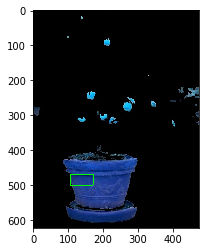

In [3]:
list=(glob.glob("*.jpg"))
counter=0
for i in list:
    
    counter=count_oranges(i,counter)
counter=0